# Import Libraries


In [76]:
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

In [77]:
# Load the latest version
# Load the dataset
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "uciml/breast-cancer-wisconsin-data",
    "data.csv",  # The actual file path within the dataset
)

C:\Users\mirol\AppData\Local\Temp\ipykernel_9468\1127198705.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


In [78]:
print("First 5 records:", df.head())

First 5 records:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_

# Data Preprocessing


In [79]:
print("\nDataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nDataset info:")
print(df.info())


Dataset shape: (569, 33)

Column names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null 

In [80]:
# Check for null values
print("\n Null values per column:")
print(df.isnull().sum())


 Null values per column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimen

In [81]:
# Percentage of missing values
print("\n Percentage of missing values per column:")
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0])  # Only show columns with missing values


 Percentage of missing values per column:
Unnamed: 32    100.0
dtype: float64


In [82]:
# Total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in dataset: {total_missing}")


Total missing values in dataset: 569


In [83]:
# Rows with missing values
rows_with_missing = df.isnull().any(axis=1).sum()
print(f"\nNumber of rows with at least one missing value: {rows_with_missing}")


Number of rows with at least one missing value: 569


In [84]:
# Summary statistics
print("\nDataset Summary:")
print(f"   Total rows: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print(f"   Total cells: {df.size}")
print(f"   Missing cells: {total_missing}")
print(f"   Missing percentage: {(total_missing / df.size) * 100:.2f}%")


Dataset Summary:
   Total rows: 569
   Total columns: 33
   Total cells: 18777
   Missing cells: 569
   Missing percentage: 3.03%


In [85]:

# Display columns with missing values (if any)
cols_with_missing = df.columns[df.isnull().any()].tolist()
if cols_with_missing:
    print(f"\nColumns with missing values: {cols_with_missing}")
else:
    print("\nNo columns have missing values!")



Columns with missing values: ['Unnamed: 32']


In [86]:


#Check for empty strings or whitespace (in object columns)
print("\nChecking for empty strings in text columns:")
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    empty_strings = (df[col] == '').sum()
    whitespace = df[col].str.isspace().sum() if df[col].dtype == 'object' else 0
    if empty_strings > 0 or whitespace > 0:
        print(f"   {col}: {empty_strings} empty strings, {whitespace} whitespace-only")



Checking for empty strings in text columns:


In [87]:

df = df.drop(columns=['Unnamed: 32'], errors='ignore')



In [88]:

# Total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in dataset after preprocessing: {total_missing}")




Total missing values in dataset after preprocessing: 0


In [89]:

# Summary statistics
print("\nDataset Summary after preprocessing:")
print(f"   Total rows: {len(df)}")
print(f"   Total columns: {len(df.columns)}")
print(f"   Total cells: {df.size}")
print(f"   Missing cells: {total_missing}")
print(f"   Missing percentage: {(total_missing / df.size) * 100:.2f}%")



Dataset Summary after preprocessing:
   Total rows: 569
   Total columns: 32
   Total cells: 18208
   Missing cells: 0
   Missing percentage: 0.00%


In [90]:
# Separate features and target
X = df.drop(['id', 'diagnosis'], axis=1).values
y = df['diagnosis'].values
y_binary = (y == 'M').astype(int)  # Convert to binary: 1=Malignant, 0=Benign

In [91]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [92]:
# Verify scaling
print("\nFirst 5 records after scaling:")
print(X_scaled[:5])
print("\nScaled dataset shape:", X_scaled.shape)



First 5 records after scaling:
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.4388

# 1.PCA

In [93]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        # 1. Center data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # 2. Covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # 3. Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # 4. Sort eigenvalues & eigenvectors (descending)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # 5. Select top components
        self.components = eigenvectors[:, :self.n_components]

        # 6. Explained variance ratio
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = eigenvalues[:self.n_components] / total_variance

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def inverse_transform(self, X_pca):
        return np.dot(X_pca, self.components.T) + self.mean

    def reconstruction_error(self, X):
        X_pca = self.transform(X)
        X_reconstructed = self.inverse_transform(X_pca)
        return np.mean((X - X_reconstructed) ** 2)

In [94]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
error = pca.reconstruction_error(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Reconstruction error:", error)

Explained variance ratio: [0.44272026 0.18971182]
Reconstruction error: 0.3675679234844056


# 2.Autoencoders

In [95]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

In [96]:
class Autoencoder:
    def __init__(self, layer_sizes, activation='relu', lr=0.01, l2=0.001):
        self.layer_sizes = layer_sizes
        self.lr = lr
        self.l2 = l2

        self.activations = {
            'relu': (relu, relu_derivative),
            'sigmoid': (sigmoid, sigmoid_derivative),
            'tanh': (tanh, tanh_derivative)
        }

        self.activation, self.activation_derivative = self.activations[activation]

        self.weights = []
        self.biases = []

        for i in range(len(layer_sizes) - 1):
            self.weights.append(
                np.random.randn(layer_sizes[i], layer_sizes[i+1]) * 0.09
            )
            self.biases.append(np.zeros((1, layer_sizes[i+1])))

    def forward(self, X):
        self.zs = []
        self.activations_cache = [X]

        for W, b in zip(self.weights, self.biases):
            z = np.dot(self.activations_cache[-1], W) + b
            self.zs.append(z)
            a = self.activation(z)
            self.activations_cache.append(a)

        return self.activations_cache[-1]

    def backward(self, X):
        m = X.shape[0]
        grads_W = []
        grads_b = []

        # MSE loss derivative
        delta = (self.activations_cache[-1] - X) * self.activation_derivative(self.zs[-1])

        for i in reversed(range(len(self.weights))):
            dW = np.dot(self.activations_cache[i].T, delta) / m
            db = np.mean(delta, axis=0, keepdims=True)

            # L2 regularization
            dW += self.l2 * self.weights[i]

            grads_W.insert(0, dW)
            grads_b.insert(0, db)

            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * self.activation_derivative(self.zs[i-1])

        return grads_W, grads_b

    def update(self, grads_W, grads_b):
        for i in range(len(self.weights)):
            self.weights[i] -= self.lr * grads_W[i]
            self.biases[i] -= self.lr * grads_b[i]

    def train(self, X, epochs=100, batch_size=32, decay=0.99):
        for epoch in range(epochs):
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]

            for i in range(0, len(X), batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                self.forward(X_batch)
                grads_W, grads_b = self.backward(X_batch)
                self.update(grads_W, grads_b)

            self.lr *= decay  # learning rate scheduling

            if epoch % 10 == 0:
                loss = np.mean((self.forward(X) - X) ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.5f}")

In [251]:
layer_sizes = [30, 25, 20, 10, 2, 10, 20, 25, 30]
ae = Autoencoder(layer_sizes, activation='tanh', lr=0.012, l2=0.001)

ae.train(X_scaled, epochs=200, batch_size=32)

Epoch 0, Loss: 0.99998
Epoch 10, Loss: 0.99996
Epoch 20, Loss: 0.99994
Epoch 30, Loss: 0.99991
Epoch 40, Loss: 0.99987
Epoch 50, Loss: 0.99981
Epoch 60, Loss: 0.99972
Epoch 70, Loss: 0.99958
Epoch 80, Loss: 0.99929
Epoch 90, Loss: 0.99865
Epoch 100, Loss: 0.99651
Epoch 110, Loss: 0.97623
Epoch 120, Loss: 0.67417
Epoch 130, Loss: 0.64326
Epoch 140, Loss: 0.63078
Epoch 150, Loss: 0.62478
Epoch 160, Loss: 0.62134
Epoch 170, Loss: 0.61911
Epoch 180, Loss: 0.61757
Epoch 190, Loss: 0.61645


# 3.K-Means

In [98]:

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """
    
    # #setting K
    # K = centroids.shape[0]

    # idx = np.zeros(X.shape[0], dtype=int)

    # for i in range (X.shape[0]):
    #     distance=[]
    #     for j in range(centroids.shape[0]):
    #         norm_ij= np.linalg.norm(X[i] - centroids[j]) 
    #         distance.append(norm_ij)
    #     idx[i]=np.argmin(distance)        
            
            
    # return idx


#with vectorization
    # Compute squared distances
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

In [99]:

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    m, n = X.shape
    
    centroids = np.zeros((K, n))
    
    for k in range(K):
        points = X[idx == k]
        if len(points) > 0:  # Handle empty clusters
            centroids[k] = np.mean(points, axis=0)
        else:
            # Reinitialize empty cluster to a random point
            centroids[k] = X[np.random.choice(m)]
    
    return centroids

 

In [100]:
def compute_inertia(X, idx, centroids):
    return np.sum((X - centroids[idx]) ** 2)


In [101]:

def kMeans_init_centroids_random(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids



In [102]:

def kMeans_init_centroids_plusplus(X, K):
    """
    Initialize K centroids using K-Means++ algorithm
    
    Args:
        X (ndarray): (m, n) Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): (K, n) Initialized centroids
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    
    # Step 1: Choose first centroid randomly
    centroids[0] = X[np.random.choice(m)]
    
    # Step 2: Choose remaining centroids
    for k in range(1, K):
        # Compute distances to nearest centroid for each point
        distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids[:k]]) for x in X])
        
        # Choose next centroid with probability proportional to distance squared
        probabilities = distances / distances.sum()
        cumulative_probs = probabilities.cumsum()
        r = np.random.rand()
        
        for idx, prob in enumerate(cumulative_probs):
            if r < prob:
                centroids[k] = X[idx]
                break
    
    return centroids


In [103]:
   
def run_kMeans(X, initial_centroids, max_iters=100, epsilon=1e-4, verbose=True):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros(m,dtype=int )
    inertia_history = []


    # Run K-Means
    for i in range(max_iters):
        if verbose:
            print(f"K-Means iteration {i+1}/{max_iters}")
        
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Compute inertia (WCSS) (within-cluster sum of squares)
        inertia = compute_inertia(X, idx, centroids)
        inertia_history.append(inertia)

        new_centroids = compute_centroids(X, idx, K)
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if verbose:
            print(f"  Inertia: {inertia:.4f}, Centroid shift: {centroid_shift:.6f}")


        if centroid_shift < epsilon:
            if verbose:
                print(f"Converged at iteration {i+1}")
            centroids = new_centroids
            return centroids, idx,inertia_history,i+1
        
        centroids = new_centroids
    if verbose:
        print(f"Reached maximum iterations ({max_iters})")
    return centroids, idx,inertia_history,max_iters
    



# 4.Gaussian Mixture Models (GMM)


In [104]:
def log_multivariate_normal(X, mean, cov):
    d = X.shape[1]
    cov += np.eye(d) * 1e-6 
    sign, logdet = np.linalg.slogdet(cov)
    inv_cov = np.linalg.inv(cov)
    diff = X - mean
    return -0.5 * (d * np.log(2 * np.pi) + logdet + np.sum(diff @ inv_cov * diff, axis=1))

In [105]:
class GMM:
    def __init__(self, n_components, covariance_type='full', max_iter=100, tol=1e-4):
        self.K = n_components
        self.covariance_type = covariance_type
        self.max_iter = max_iter
        self.tol = tol

    def _initialize(self, X):
        N, D = X.shape
        self.pi = np.ones(self.K) / self.K
        self.mu = X[np.random.choice(N, self.K, replace=False)]

        if self.covariance_type == 'tied':
            self.cov = np.cov(X.T) + np.eye(D) * 1e-6
        elif self.covariance_type == 'diagonal':
            var = np.var(X, axis=0)
            self.cov = np.array([np.maximum(var, 1e-6) for _ in range(self.K)])
        elif self.covariance_type == 'spherical':
            var = np.mean(np.var(X, axis=0))
            self.cov = np.array([max(var, 1e-6) for _ in range(self.K)])
        else:  # full
            cov_matrix = np.cov(X.T) + np.eye(D) * 1e-6
            self.cov = np.array([cov_matrix for _ in range(self.K)])

    def _e_step(self, X):
        N, D = X.shape
        log_resp = np.zeros((N, self.K))
        for k in range(self.K):
            if self.covariance_type == 'spherical':
                cov = np.eye(D) * self.cov[k]
            elif self.covariance_type == 'diagonal':
                cov = np.diag(self.cov[k])
            elif self.covariance_type == 'tied':
                cov = self.cov
            else:  # full
                cov = self.cov[k]
            log_resp[:, k] = np.log(self.pi[k]) + log_multivariate_normal(X, self.mu[k], cov)
        log_sum = np.logaddexp.reduce(log_resp, axis=1)
        self.log_likelihood = np.sum(log_sum)
        resp = np.exp(log_resp - log_sum[:, None])
        return resp

    def _m_step(self, X, resp):
        N, D = X.shape
        Nk = resp.sum(axis=0)
        self.pi = Nk / N
        self.mu = (resp.T @ X) / Nk[:, None]

        if self.covariance_type == 'tied':
            cov = np.zeros((D, D))
            for k in range(self.K):
                diff = X - self.mu[k]
                cov += (resp[:, k][:, None] * diff).T @ diff
            self.cov = cov / N + np.eye(D) * 1e-6

        elif self.covariance_type == 'full':
            covs = []
            for k in range(self.K):
                diff = X - self.mu[k]
                weighted = resp[:, k][:, None] * diff
                cov = (weighted.T @ diff) / Nk[k] + np.eye(D) * 1e-6
                covs.append(cov)
            self.cov = np.array(covs)

        elif self.covariance_type == 'diagonal':
            covs = []
            for k in range(self.K):
                diff = X - self.mu[k]
                weighted = resp[:, k][:, None] * diff
                var = np.sum(weighted * diff, axis=0) / Nk[k]  # (D,)
                var = np.maximum(var, 1e-6)
                covs.append(var)
            self.cov = np.array(covs)  # shape (K,D), keep as vector

        elif self.covariance_type == 'spherical':
            covs = []
            for k in range(self.K):
                diff = X - self.mu[k]
                weighted = resp[:, k][:, None] * diff
                var = np.trace((weighted.T @ diff) / Nk[k]) / X.shape[1]  # scalar
                var = max(var, 1e-6)
                covs.append(var)
            self.cov = np.array(covs)  # shape (K,), keep as scalar


    def fit(self, X):
        self._initialize(X)
        self.log_likelihood_history = []   
        prev_ll = None
        self.n_iter = 0

        for i in range(self.max_iter):
            resp = self._e_step(X)
            self._m_step(X, resp)

            self.log_likelihood_history.append(self.log_likelihood)  
            self.n_iter += 1

            if prev_ll is not None and abs(self.log_likelihood - prev_ll) < self.tol:
                break
            prev_ll = self.log_likelihood



    def predict(self, X):
        resp = self._e_step(X)
        return np.argmax(resp, axis=1)


In [106]:
def map_clusters_to_labels(y_true, y_cluster):
    y_pred = np.zeros_like(y_cluster)
    for c in np.unique(y_cluster):
        mask = (y_cluster == c)
        y_pred[mask] = np.bincount(y_true[mask]).argmax()
    return y_pred

In [107]:
def compute_gmm_params(n_components, n_features, cov_type):
    # mixture weights
    params = n_components - 1

    # means
    params += n_components * n_features

    if cov_type == 'full':
        params += n_components * (n_features * (n_features + 1) // 2)
    elif cov_type == 'tied':
        params += (n_features * (n_features + 1) // 2)
    elif cov_type == 'diagonal':
        params += n_components * n_features
    elif cov_type == 'spherical':
        params += n_components

    return params


In [108]:
def compute_aic_bic(log_likelihood, n_params, n_samples):
    aic = 2 * n_params - 2 * log_likelihood
    bic = n_params * np.log(n_samples) - 2 * log_likelihood
    return aic, bic


In [109]:
covariance_types = ['full', 'tied', 'diagonal', 'spherical']
n_components_range = range(1, 7) 
gmm_results = []
n_samples, n_features = X_scaled.shape

for cov_type in covariance_types:
    for k in n_components_range:
        print(f"Running GMM: cov={cov_type}, components={k}")

        gmm = GMM(
            n_components=k,
            covariance_type=cov_type,
            max_iter=200,
            tol=1e-4
        )

        gmm.fit(X_scaled)

        log_likelihood = gmm.log_likelihood
        n_params = compute_gmm_params(k, n_features, cov_type)

        aic, bic = compute_aic_bic(
            log_likelihood=log_likelihood,
            n_params=n_params,
            n_samples=n_samples
        )

        gmm_results.append({
            "covariance": cov_type,
            "components": k,
            "log_likelihood": log_likelihood,
            "AIC": aic,
            "BIC": bic,
            "iterations": gmm.n_iter
        })

Running GMM: cov=full, components=1
Running GMM: cov=full, components=2
Running GMM: cov=full, components=3
Running GMM: cov=full, components=4
Running GMM: cov=full, components=5
Running GMM: cov=full, components=6
Running GMM: cov=tied, components=1
Running GMM: cov=tied, components=2
Running GMM: cov=tied, components=3
Running GMM: cov=tied, components=4
Running GMM: cov=tied, components=5
Running GMM: cov=tied, components=6
Running GMM: cov=diagonal, components=1
Running GMM: cov=diagonal, components=2
Running GMM: cov=diagonal, components=3
Running GMM: cov=diagonal, components=4
Running GMM: cov=diagonal, components=5
Running GMM: cov=diagonal, components=6
Running GMM: cov=spherical, components=1
Running GMM: cov=spherical, components=2
Running GMM: cov=spherical, components=3
Running GMM: cov=spherical, components=4
Running GMM: cov=spherical, components=5
Running GMM: cov=spherical, components=6


In [110]:
import pandas as pd

df = pd.DataFrame(gmm_results)

print("\n===== Best Model per Covariance (by BIC) =====")
print(df.loc[df.groupby("covariance")["BIC"].idxmin()]
      [["covariance", "components", "BIC", "log_likelihood", "iterations"]])



===== Best Model per Covariance (by BIC) =====
   covariance  components           BIC  log_likelihood  iterations
17   diagonal           6  31117.637916   -14401.060779          37
1        full           2   7652.159373     -682.686932          31
23  spherical           6  35096.110712   -16942.214774         106
11       tied           6  10724.045377    -3300.261548          91


In [111]:
best = df.loc[df["BIC"].idxmin()]

best_gmm = GMM(
    n_components=int(best["components"]),
    covariance_type=best["covariance"],
    max_iter=200,
    tol=1e-4
)

best_gmm.fit(X_scaled)


In [112]:
clusters = best_gmm.predict(X_scaled)
y_pred = map_clusters_to_labels(y_binary, clusters)

accuracy = np.mean(y_pred == y_binary)
print(f"\nEvaluation Accuracy (after model selection): {accuracy:.4f}")



Evaluation Accuracy (after model selection): 0.8032


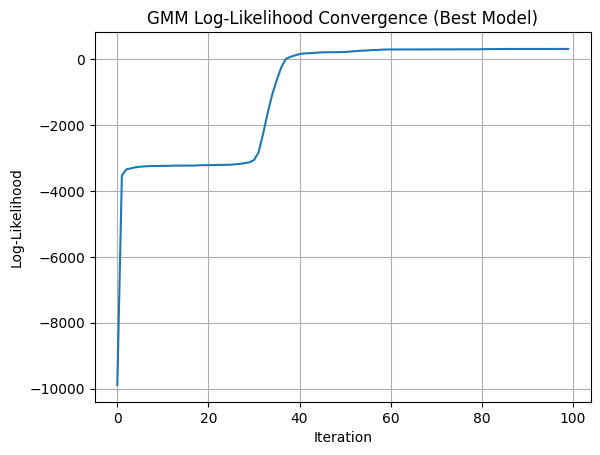

In [113]:
plt.figure()
plt.plot(best_gmm.log_likelihood_history)
plt.xlabel("Iteration")
plt.ylabel("Log-Likelihood")
plt.title("GMM Log-Likelihood Convergence (Best Model)")
plt.grid(True)
plt.show()


Helper Functions

In [114]:
def silhouette_score_scratch(X, labels):
    """
    Compute mean silhouette score from scratch.

    Args:
        X (ndarray): shape (n_samples, n_features)
        labels (ndarray): cluster labels, shape (n_samples,)

    Returns:
        float: mean silhouette score
    """
    n = X.shape[0]
    unique_labels = np.unique(labels)

    # Precompute distance matrix
    dist_matrix = np.linalg.norm(X[:, None, :] - X[None, :, :], axis=2)

    silhouette_values = np.zeros(n)

    for i in range(n):
        same_cluster = labels == labels[i]
        same_cluster[i] = False  # exclude self

        # a(i): mean intra-cluster distance
        if np.sum(same_cluster) > 0:
            a_i = np.mean(dist_matrix[i, same_cluster])
        else:
            a_i = 0.0

        # b(i): minimum mean distance to other clusters
        b_i = np.inf
        for label in unique_labels:
            if label == labels[i]:
                continue
            other_cluster = labels == label
            if np.sum(other_cluster) > 0:
                dist = np.mean(dist_matrix[i, other_cluster])
                b_i = min(b_i, dist)

        silhouette_values[i] = (b_i - a_i) / max(a_i, b_i)

    return np.mean(silhouette_values)


In [115]:
centroids_random = kMeans_init_centroids_random(X_scaled, 2)
centroids_plus_plus=kMeans_init_centroids_plusplus(X_scaled, 2)
centroids_random, idx, inertia_hist, n_iters = run_kMeans(X_scaled, centroids_random, max_iters=100, verbose=False)
centroids_plus_plus, idx, inertia_hist, n_iters = run_kMeans(X_scaled, centroids_plus_plus, max_iters=100, verbose=False)

print(
    silhouette_score_scratch(X_scaled, idx),
    silhouette_score(X_scaled, idx)
)


0.3433822406907781 0.34338224069077805


In [116]:
def compute_gap_statistic(X, K, n_refs=5, init_method='plusplus'):
    """
    Compute the gap statistic for a given dataset X and number of clusters K.
    
    Parameters:
        X : ndarray
            Data array.
        K : int
            Number of clusters.
        n_refs : int
            Number of reference datasets to generate.
        init_method : str
            Initialization method: 'random' or 'plusplus'.
            
    Returns:
        gap : float
            Gap statistic value.
    """
    # Select initialization function
    if init_method == 'random':
        init_func = kMeans_init_centroids_random
    elif init_method == 'plusplus':
        init_func = kMeans_init_centroids_plusplus
    else:
        raise ValueError("init_method must be 'random' or 'plusplus'")
    
    # Reference datasets
    ref_inertia = []
    for _ in range(n_refs):
        X_ref = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=X.shape)
        centroids = init_func(X_ref, K)
        _, _, inertia_hist, _ = run_kMeans(X_ref, centroids, max_iters=max_iters, verbose=False)
        ref_inertia.append(inertia_hist[-1])
    
    # Original dataset
    centroids = init_func(X, K)
    _, _, inertia_hist, _ = run_kMeans(X, centroids, max_iters=max_iters, verbose=False)
    
    return np.log(np.mean(ref_inertia)) - np.log(inertia_hist[-1])


In [117]:

def davies_bouldin_index(X, labels):
    """
    Compute Davies-Bouldin Index from scratch.
    Lower values indicate better clustering.
    
    Args:
        X (ndarray): shape (n_samples, n_features)
        labels (ndarray): cluster labels, shape (n_samples,)
    
    Returns:
        float: Davies-Bouldin Index
    """
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    
    if n_clusters == 1:
        return 0.0
    
    # Calculate centroids
    centroids = np.array([X[labels == k].mean(axis=0) for k in unique_labels])
    
    # Calculate average within-cluster distances (cluster diameters)
    S = np.zeros(n_clusters)
    for i, k in enumerate(unique_labels):
        cluster_points = X[labels == k]
        if len(cluster_points) > 0:
            S[i] = np.mean(np.linalg.norm(cluster_points - centroids[i], axis=1))
    
    # Calculate Davies-Bouldin Index
    DB = 0
    for i in range(n_clusters):
        max_ratio = 0
        for j in range(n_clusters):
            if i != j:
                M_ij = np.linalg.norm(centroids[i] - centroids[j])
                if M_ij > 0:
                    R_ij = (S[i] + S[j]) / M_ij
                    max_ratio = max(max_ratio, R_ij)
        DB += max_ratio
    
    return DB / n_clusters


In [118]:


def calinski_harabasz_index(X, labels):
    """
    Compute Calinski-Harabasz Index (Variance Ratio Criterion) from scratch.
    Higher values indicate better clustering.
    
    Args:
        X (ndarray): shape (n_samples, n_features)
        labels (ndarray): cluster labels, shape (n_samples,)
    
    Returns:
        float: Calinski-Harabasz Index
    """
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    n_samples = X.shape[0]
    
    if n_clusters == 1 or n_clusters == n_samples:
        return 0.0
    
    # Overall mean
    overall_mean = X.mean(axis=0)
    
    # Between-cluster dispersion
    between_dispersion = 0
    for k in unique_labels:
        cluster_points = X[labels == k]
        n_k = len(cluster_points)
        cluster_mean = cluster_points.mean(axis=0)
        between_dispersion += n_k * np.sum((cluster_mean - overall_mean) ** 2)
    
    # Within-cluster dispersion
    within_dispersion = 0
    for k in unique_labels:
        cluster_points = X[labels == k]
        cluster_mean = cluster_points.mean(axis=0)
        within_dispersion += np.sum((cluster_points - cluster_mean) ** 2)
    
    # Avoid division by zero
    if within_dispersion == 0:
        return 0.0
    
    # Calculate CH index
    ch_index = (between_dispersion / (n_clusters - 1)) / (within_dispersion / (n_samples - n_clusters))
    
    return ch_index



In [119]:

def adjusted_rand_index(y_true, y_pred):
    """
    Compute Adjusted Rand Index from scratch.
    
    Args:
        y_true (ndarray): true labels
        y_pred (ndarray): predicted cluster labels
    
    Returns:
        float: Adjusted Rand Index (ranges from -1 to 1, 1 is perfect)
    """
    from scipy.special import comb
    
    # Create contingency table
    classes = np.unique(y_true)
    clusters = np.unique(y_pred)
    
    contingency = np.zeros((len(classes), len(clusters)), dtype=np.int64)
    for i, c in enumerate(classes):
        for j, k in enumerate(clusters):
            contingency[i, j] = np.sum((y_true == c) & (y_pred == k))
    
    # Sum of combinations
    sum_comb_c = sum([comb(n_ij, 2, exact=True) for n_ij in contingency.flatten() if n_ij >= 2])
    
    # Sum over rows
    sum_comb_rows = sum([comb(np.sum(contingency[i, :]), 2, exact=True) 
                         for i in range(contingency.shape[0]) 
                         if np.sum(contingency[i, :]) >= 2])
    
    # Sum over columns
    sum_comb_cols = sum([comb(np.sum(contingency[:, j]), 2, exact=True) 
                         for j in range(contingency.shape[1]) 
                         if np.sum(contingency[:, j]) >= 2])
    
    n = len(y_true)
    total_comb = comb(n, 2, exact=True)
    
    # Expected index
    expected_index = (sum_comb_rows * sum_comb_cols) / total_comb if total_comb > 0 else 0
    
    # Max index
    max_index = (sum_comb_rows + sum_comb_cols) / 2
    
    # Adjusted Rand Index
    if max_index - expected_index == 0:
        return 0.0
    
    ari = (sum_comb_c - expected_index) / (max_index - expected_index)
    
    return ari



In [120]:

def normalized_mutual_information(y_true, y_pred):
    """
    Compute Normalized Mutual Information from scratch.
    
    Args:
        y_true (ndarray): true labels
        y_pred (ndarray): predicted cluster labels
    
    Returns:
        float: NMI score (ranges from 0 to 1, 1 is perfect)
    """
    # Create contingency table
    classes = np.unique(y_true)
    clusters = np.unique(y_pred)
    
    contingency = np.zeros((len(classes), len(clusters)))
    for i, c in enumerate(classes):
        for j, k in enumerate(clusters):
            contingency[i, j] = np.sum((y_true == c) & (y_pred == k))
    
    n = len(y_true)
    
    # Mutual Information
    mi = 0
    for i in range(len(classes)):
        for j in range(len(clusters)):
            if contingency[i, j] > 0:
                mi += contingency[i, j] * np.log(
                    (n * contingency[i, j]) / 
                    (np.sum(contingency[i, :]) * np.sum(contingency[:, j]))
                )
    mi /= n
    
    # Entropy of true labels
    h_true = 0
    for i in range(len(classes)):
        p_i = np.sum(contingency[i, :]) / n
        if p_i > 0:
            h_true -= p_i * np.log(p_i)
    
    # Entropy of predicted labels
    h_pred = 0
    for j in range(len(clusters)):
        p_j = np.sum(contingency[:, j]) / n
        if p_j > 0:
            h_pred -= p_j * np.log(p_j)
    
    # Normalized Mutual Information
    if h_true == 0 or h_pred == 0:
        return 0.0
    
    nmi = mi / np.sqrt(h_true * h_pred)
    
    return nmi



In [121]:

def purity_score(y_true, y_pred):
    """
    Compute Purity score from scratch.
    
    Args:
        y_true (ndarray): true labels
        y_pred (ndarray): predicted cluster labels
    
    Returns:
        float: Purity score (ranges from 0 to 1, 1 is perfect)
    """
    # Create contingency table
    classes = np.unique(y_true)
    clusters = np.unique(y_pred)
    
    contingency = np.zeros((len(classes), len(clusters)))
    for i, c in enumerate(classes):
        for j, k in enumerate(clusters):
            contingency[i, j] = np.sum((y_true == c) & (y_pred == k))
    
    # Purity: sum of max values in each column / total
    purity = np.sum(np.max(contingency, axis=0)) / len(y_true)
    
    return purity


In [122]:


def compute_confusion_matrix(y_true, y_pred):
    """
    Compute confusion matrix from scratch.
    
    Args:
        y_true (ndarray): true labels
        y_pred (ndarray): predicted labels (after mapping clusters to labels)
    
    Returns:
        ndarray: confusion matrix
    """
    classes = np.unique(y_true)
    n_classes = len(classes)
    
    confusion = np.zeros((n_classes, n_classes), dtype=np.int64)
    
    for i, true_class in enumerate(classes):
        for j, pred_class in enumerate(classes):
            confusion[i, j] = np.sum((y_true == true_class) & (y_pred == pred_class))
    
    return confusion



In [123]:

def plot_confusion_matrix(confusion_matrix, title="Confusion Matrix"):
    """
    Plot confusion matrix as heatmap.
    
    Args:
        confusion_matrix (ndarray): confusion matrix
        title (str): plot title
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap='Blues')
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(confusion_matrix.shape[0])
    plt.xticks(tick_marks, ['Benign', 'Malignant'])
    plt.yticks(tick_marks, ['Benign', 'Malignant'])
    
    # Add text annotations
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if confusion_matrix[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()




# Experiments

Experiment 1: K-Means on original data

In [124]:
k_vals = list(range(2, 11))   # K values to test
n_runs = 10                   # runs per K
max_iters = 100
random_state = 42
np.random.seed(random_state)




In [125]:

exp1_results = {
    'random': {
        'inertias': {k: [] for k in k_vals},
        'silhouettes': {k: [] for k in k_vals},
        'davies_bouldins': {k: [] for k in k_vals},
        'calinski_harabaszs': {k: [] for k in k_vals},
        'aris': {k: [] for k in k_vals},
        'nmis': {k: [] for k in k_vals},
        'purities': {k: [] for k in k_vals},
        'iterations': {k: [] for k in k_vals},
        'times': {k: [] for k in k_vals}
    },
    'plusplus': {
        'inertias': {k: [] for k in k_vals},
        'silhouettes': {k: [] for k in k_vals},
        'davies_bouldins': {k: [] for k in k_vals},
        'calinski_harabaszs': {k: [] for k in k_vals},
        'aris': {k: [] for k in k_vals},
        'nmis': {k: [] for k in k_vals},
        'purities': {k: [] for k in k_vals},
        'iterations': {k: [] for k in k_vals},
        'times': {k: [] for k in k_vals}
    }
}

In [126]:
import time
# Run experiments
print("\nRunning K-Means experiments...")
for K in k_vals:
    print(f"\n--- Testing K={K} ---")
    
    for run in range(n_runs):
        # ========== RANDOM INITIALIZATION ==========
        start_time = time.time()
        centroids = kMeans_init_centroids_random(X_scaled, K)
        centroids_final, idx, inertia_hist, n_iters = run_kMeans(
            X_scaled, centroids, max_iters=max_iters, verbose=False
        )
        elapsed_time = time.time() - start_time
        
        # Compute all metrics
        silhouette = silhouette_score_scratch(X_scaled, idx)
        davies_bouldin = davies_bouldin_index(X_scaled, idx)
        calinski_harabasz = calinski_harabasz_index(X_scaled, idx)
        
        # External metrics (need mapping)
        y_pred = map_clusters_to_labels(y_binary, idx)
        ari = adjusted_rand_index(y_binary, y_pred)
        nmi = normalized_mutual_information(y_binary, y_pred)
        purity = purity_score(y_binary, y_pred)
        
        # Store results
        exp1_results['random']['inertias'][K].append(inertia_hist[-1])
        exp1_results['random']['silhouettes'][K].append(silhouette)
        exp1_results['random']['davies_bouldins'][K].append(davies_bouldin)
        exp1_results['random']['calinski_harabaszs'][K].append(calinski_harabasz)
        exp1_results['random']['aris'][K].append(ari)
        exp1_results['random']['nmis'][K].append(nmi)
        exp1_results['random']['purities'][K].append(purity)
        exp1_results['random']['iterations'][K].append(n_iters)
        exp1_results['random']['times'][K].append(elapsed_time)
        
        # ========== K-MEANS++ INITIALIZATION ==========
        start_time = time.time()
        centroids = kMeans_init_centroids_plusplus(X_scaled, K)
        centroids_final, idx, inertia_hist, n_iters = run_kMeans(
            X_scaled, centroids, max_iters=max_iters, verbose=False
        )
        elapsed_time = time.time() - start_time
        
        # Compute all metrics
        silhouette = silhouette_score_scratch(X_scaled, idx)
        davies_bouldin = davies_bouldin_index(X_scaled, idx)
        calinski_harabasz = calinski_harabasz_index(X_scaled, idx)
        
        # External metrics
        y_pred = map_clusters_to_labels(y_binary, idx)
        ari = adjusted_rand_index(y_binary, y_pred)
        nmi = normalized_mutual_information(y_binary, y_pred)
        purity = purity_score(y_binary, y_pred)
        
        # Store results
        exp1_results['plusplus']['inertias'][K].append(inertia_hist[-1])
        exp1_results['plusplus']['silhouettes'][K].append(silhouette)
        exp1_results['plusplus']['davies_bouldins'][K].append(davies_bouldin)
        exp1_results['plusplus']['calinski_harabaszs'][K].append(calinski_harabasz)
        exp1_results['plusplus']['aris'][K].append(ari)
        exp1_results['plusplus']['nmis'][K].append(nmi)
        exp1_results['plusplus']['purities'][K].append(purity)
        exp1_results['plusplus']['iterations'][K].append(n_iters)
        exp1_results['plusplus']['times'][K].append(elapsed_time)
    
    # Print progress
    print(f"  Random:    Inertia={np.mean(exp1_results['random']['inertias'][K]):.2f}, "
          f"Silhouette={np.mean(exp1_results['random']['silhouettes'][K]):.3f}, "
          f"Time={np.mean(exp1_results['random']['times'][K]):.3f}s")
    print(f"  K-Means++: Inertia={np.mean(exp1_results['plusplus']['inertias'][K]):.2f}, "
          f"Silhouette={np.mean(exp1_results['plusplus']['silhouettes'][K]):.3f}, "
          f"Time={np.mean(exp1_results['plusplus']['times'][K]):.3f}s")


Running K-Means experiments...

--- Testing K=2 ---
  Random:    Inertia=11595.67, Silhouette=0.344, Time=0.001s
  K-Means++: Inertia=11595.64, Silhouette=0.344, Time=0.006s

--- Testing K=3 ---
  Random:    Inertia=10172.45, Silhouette=0.318, Time=0.006s
  K-Means++: Inertia=10063.88, Silhouette=0.315, Time=0.010s

--- Testing K=4 ---
  Random:    Inertia=9398.86, Silhouette=0.199, Time=0.005s
  K-Means++: Inertia=9379.05, Silhouette=0.234, Time=0.021s

--- Testing K=5 ---
  Random:    Inertia=8630.60, Silhouette=0.155, Time=0.013s
  K-Means++: Inertia=8740.24, Silhouette=0.205, Time=0.050s

--- Testing K=6 ---
  Random:    Inertia=8135.80, Silhouette=0.150, Time=0.008s
  K-Means++: Inertia=8189.45, Silhouette=0.161, Time=0.061s

--- Testing K=7 ---
  Random:    Inertia=7648.96, Silhouette=0.148, Time=0.015s
  K-Means++: Inertia=7766.10, Silhouette=0.148, Time=0.084s

--- Testing K=8 ---
  Random:    Inertia=7300.66, Silhouette=0.134, Time=0.036s
  K-Means++: Inertia=7346.64, Silhoue

In [127]:
#Compute mean values for analysis
inertia_means_random = [np.mean(exp1_results['random']['inertias'][k]) for k in k_vals]
inertia_means_plusplus = [np.mean(exp1_results['plusplus']['inertias'][k]) for k in k_vals]
silhouette_means_random = [np.mean(exp1_results['random']['silhouettes'][k]) for k in k_vals]
silhouette_means_plusplus = [np.mean(exp1_results['plusplus']['silhouettes'][k]) for k in k_vals]

Find optimal k using: elbow method, silhouette analysis, and gap statistic 


In [128]:

# Elbow method (second derivative)
inertia_arr = np.array(inertia_means_plusplus)
first_derivative = np.diff(inertia_arr)
second_derivative = np.diff(first_derivative)
# Find elbow point (maximum curvature)
optimal_k_elbow = k_vals[np.argmax(np.abs(second_derivative)) + 2]
print(f"   Optimal K (Elbow): {optimal_k_elbow}")

   Optimal K (Elbow): 4


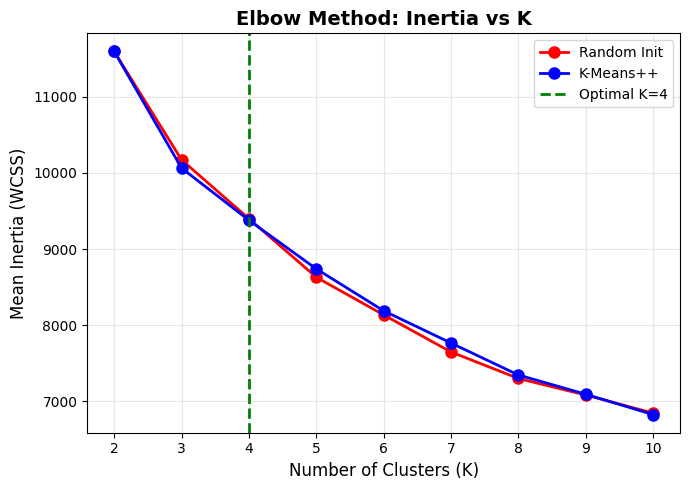

In [129]:
plt.figure(figsize=(7, 5))

# Plot inertia for Random Init and K-Means++
plt.plot(k_vals, inertia_means_random, 'ro-', linewidth=2, markersize=8, label='Random Init')
plt.plot(k_vals, inertia_means_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++')

# Highlight the optimal K with a vertical line
plt.axvline(optimal_k_elbow, color='green', linestyle='--', linewidth=2, 
            label=f'Optimal K={optimal_k_elbow}')

plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Mean Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method: Inertia vs K', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


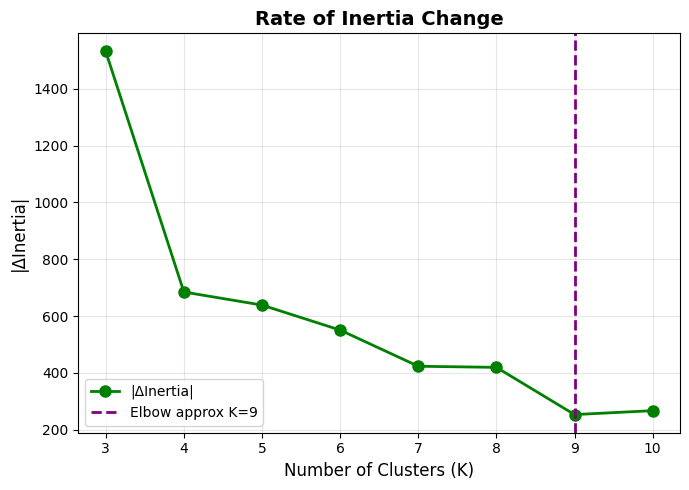

In [130]:
plt.figure(figsize=(7, 5))

# Plot the rate of change of inertia
plt.plot(k_vals[1:], np.abs(first_derivative), 'go-', linewidth=2, markersize=8, label='|ΔInertia|')

# Optional: highlight the point where the change is minimal (elbow detection)
min_idx = np.argmin(np.abs(first_derivative))
plt.axvline(k_vals[min_idx+1], color='purple', linestyle='--', linewidth=2,
            label=f'Elbow approx K={k_vals[min_idx+1]}')

plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('|ΔInertia|', fontsize=12)
plt.title('Rate of Inertia Change', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [131]:
print("\nMethod 2: Silhouette Analysis")

optimal_k_silhouette = k_vals[np.argmax(silhouette_means_plusplus)]
print(f"   Optimal K (Silhouette): {optimal_k_silhouette}")


Method 2: Silhouette Analysis
   Optimal K (Silhouette): 2


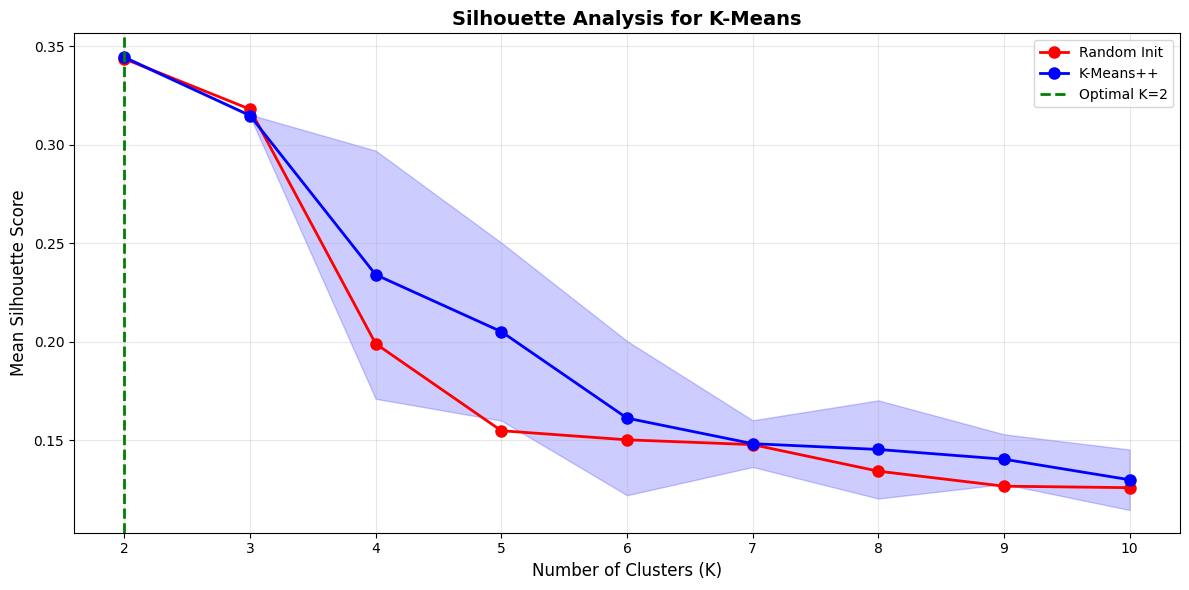

In [132]:
# Plot silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(k_vals, silhouette_means_random, 'ro-', linewidth=2, markersize=8, label='Random Init')
plt.plot(k_vals, silhouette_means_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++')
plt.axvline(optimal_k_silhouette, color='green', linestyle='--', linewidth=2,
            label=f'Optimal K={optimal_k_silhouette}')

# Add error bars
sil_stds_plusplus = [np.std(exp1_results['plusplus']['silhouettes'][k]) for k in k_vals]
plt.fill_between(k_vals, 
                 np.array(silhouette_means_plusplus) - np.array(sil_stds_plusplus),
                 np.array(silhouette_means_plusplus) + np.array(sil_stds_plusplus),
                 alpha=0.2, color='blue')

plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Mean Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for K-Means', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [133]:
print("\nMethod 3: Gap Statistic")
print("   Computing gap statistics")

gap_values_random = []
gap_values_plusplus = []



Method 3: Gap Statistic
   Computing gap statistics


In [134]:
for K in k_vals:
    # Gap statistic for random init
    gap_random = compute_gap_statistic(X_scaled, K=K, n_refs=5, init_method='random')
    gap_values_random.append(gap_random)
    
    # Gap statistic for K-Means++
    gap_plusplus = compute_gap_statistic(X_scaled, K=K, n_refs=5, init_method='plusplus')
    gap_values_plusplus.append(gap_plusplus)
    
    print(f"   K={K}: Gap(Random)={gap_random:.4f}, Gap(++)={gap_plusplus:.4f}")


   K=2: Gap(Random)=1.9615, Gap(++)=1.9571
   K=3: Gap(Random)=2.0637, Gap(++)=2.0658
   K=4: Gap(Random)=2.0946, Gap(++)=2.1131
   K=5: Gap(Random)=2.1290, Gap(++)=2.1652
   K=6: Gap(Random)=2.1970, Gap(++)=2.1827
   K=7: Gap(Random)=2.2577, Gap(++)=2.2404
   K=8: Gap(Random)=2.2713, Gap(++)=2.2840
   K=9: Gap(Random)=2.3238, Gap(++)=2.3112
   K=10: Gap(Random)=2.3217, Gap(++)=2.3058


In [135]:

optimal_k_gap = k_vals[np.argmax(gap_values_plusplus)]
print(f"\n   Optimal K (Gap Statistic): {optimal_k_gap}")


   Optimal K (Gap Statistic): 9


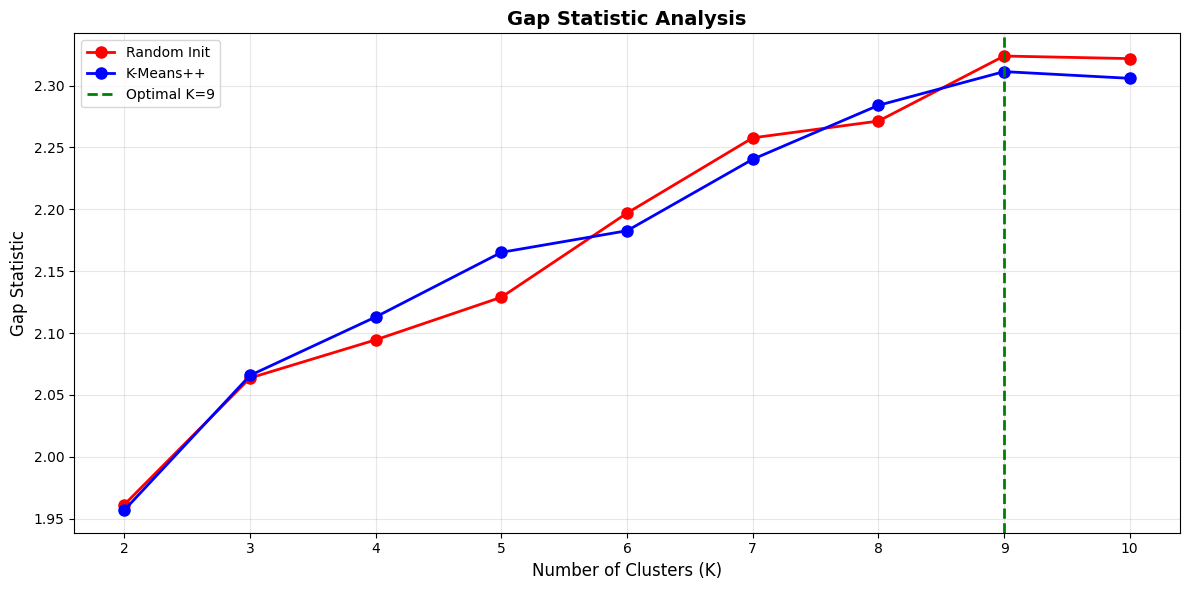

In [136]:
# Plot gap statistic
plt.figure(figsize=(12, 6))
plt.plot(k_vals, gap_values_random, 'ro-', linewidth=2, markersize=8, label='Random Init')
plt.plot(k_vals, gap_values_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++')
plt.axvline(optimal_k_gap, color='green', linestyle='--', linewidth=2,
            label=f'Optimal K={optimal_k_gap}')
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Gap Statistic', fontsize=12)
plt.title('Gap Statistic Analysis', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [137]:
# Summary of optimal K
print("OPTIMAL K SUMMARY:")
print(f"  Elbow Method:      K = {optimal_k_elbow}")
print(f"  Silhouette Score:  K = {optimal_k_silhouette}")
print(f"  Gap Statistic:     K = {optimal_k_gap}")
print(f"\n Selected Optimal K: {optimal_k_silhouette} (based on Silhouette)")


OPTIMAL K SUMMARY:
  Elbow Method:      K = 4
  Silhouette Score:  K = 2
  Gap Statistic:     K = 9

 Selected Optimal K: 2 (based on Silhouette)


Report convergence speed 


In [138]:
# plt.figure(figsize=(7, 5))
# plt.plot(k_vals, iters_means_random, 'ro-', linewidth=2, markersize=8, label='Random Init')
# plt.plot(k_vals, iters_means_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++')

# plt.xlabel('Number of Clusters (K)', fontsize=12)
# plt.ylabel('Mean Iterations to Convergence', fontsize=12)
# plt.title('Convergence Speed: Iterations', fontsize=14, fontweight='bold')
# plt.legend(fontsize=10)
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()


In [248]:
# plt.figure(figsize=(7, 5))
# plt.plot(k_vals, times_means_random, 'ro-', linewidth=2, markersize=8, label='Random Init')
# plt.plot(k_vals, times_means_plusplus, 'bo-', linewidth=2, markersize=8, label='K-Means++')

# plt.xlabel('Number of Clusters (K)', fontsize=12)
# plt.ylabel('Mean Time to Convergence (s)', fontsize=12)
# plt.title('Convergence Speed: Time', fontsize=14, fontweight='bold')
# plt.legend(fontsize=10)
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()


In [140]:

# Print convergence statistics
print("\n📊 Convergence Statistics:")
print(f"{'K':>3} | {'Random Iters':>13} | {'++ Iters':>13} | {'Random Time':>12} | {'++ Time':>12}")
print("-" * 70)
for k in k_vals:
    print(f"{k:3d} | {np.mean(exp1_results['random']['iterations'][k]):7.2f} ± {np.std(exp1_results['random']['iterations'][k]):4.2f} | "
          f"{np.mean(exp1_results['plusplus']['iterations'][k]):7.2f} ± {np.std(exp1_results['plusplus']['iterations'][k]):4.2f} | "
          f"{np.mean(exp1_results['random']['times'][k]):6.3f} ± {np.std(exp1_results['random']['times'][k]):4.3f} | "
          f"{np.mean(exp1_results['plusplus']['times'][k]):6.3f} ± {np.std(exp1_results['plusplus']['times'][k]):4.3f}")


📊 Convergence Statistics:
  K |  Random Iters |      ++ Iters |  Random Time |      ++ Time
----------------------------------------------------------------------
  2 |    7.10 ± 1.87 |    8.20 ± 2.27 |  0.001 ± 0.002 |  0.006 ± 0.004
  3 |   16.60 ± 6.23 |   14.50 ± 5.08 |  0.006 ± 0.004 |  0.010 ± 0.004
  4 |   16.30 ± 5.90 |   17.50 ± 4.84 |  0.005 ± 0.006 |  0.021 ± 0.004
  5 |   22.60 ± 7.17 |   16.50 ± 5.16 |  0.013 ± 0.006 |  0.050 ± 0.012
  6 |   17.50 ± 5.61 |   16.00 ± 6.81 |  0.008 ± 0.005 |  0.061 ± 0.012
  7 |   20.00 ± 4.45 |   19.20 ± 10.35 |  0.015 ± 0.005 |  0.084 ± 0.016
  8 |   19.80 ± 5.42 |   22.60 ± 8.46 |  0.036 ± 0.013 |  0.139 ± 0.021
  9 |   22.10 ± 10.50 |   19.70 ± 12.87 |  0.044 ± 0.028 |  0.166 ± 0.031
 10 |   17.90 ± 7.85 |   13.80 ± 1.83 |  0.040 ± 0.018 |  0.180 ± 0.014


Compare K-Means++ vs random initialization 

In [141]:

print("COMPREHENSIVE METRICS AT OPTIMAL K")

K_optimal = optimal_k_silhouette

# Run one final time with optimal K to get detailed metrics
print(f"\n Running final evaluation with K={K_optimal}...")

# Random initialization
centroids = kMeans_init_centroids_random(X_scaled, K_optimal)
centroids_final, idx_random, inertia_hist_random, n_iters_random = run_kMeans(
    X_scaled, centroids, max_iters=max_iters, verbose=False
)
metrics_random = comprehensive_evaluation(X_scaled, idx_random, y_binary, 
                                         f"KMeans-Random-K{K_optimal}")

# K-Means++ initialization
centroids = kMeans_init_centroids_plusplus(X_scaled, K_optimal)
centroids_final, idx_plusplus, inertia_hist_plusplus, n_iters_plusplus = run_kMeans(
    X_scaled, centroids, max_iters=max_iters, verbose=False
)
metrics_plusplus = comprehensive_evaluation(X_scaled, idx_plusplus, y_binary,
                                           f"KMeans++-K{K_optimal}")

# Print detailed metrics
print_metrics(metrics_random)
print_metrics(metrics_plusplus)

COMPREHENSIVE METRICS AT OPTIMAL K

 Running final evaluation with K=2...

Evaluation Metrics for: KMeans-Random-K2
Internal Metrics:
  Silhouette Score:           0.3434  (higher is better)
  Davies-Bouldin Index:       1.3205  (lower is better)
  Calinski-Harabasz:          267.69  (higher is better)
  WCSS:                     11595.53  (lower is better)

External Metrics:
  Adjusted Rand Index:        0.6536  (higher is better)
  Normalized Mutual Info:     0.5325  (higher is better)
  Purity:                     0.9051  (higher is better)

Confusion Matrix:
[[339  18]
 [ 36 176]]


Evaluation Metrics for: KMeans++-K2
Internal Metrics:
  Silhouette Score:           0.3450  (higher is better)
  Davies-Bouldin Index:       1.3123  (lower is better)
  Calinski-Harabasz:          267.70  (higher is better)
  WCSS:                     11595.46  (lower is better)

External Metrics:
  Adjusted Rand Index:        0.6707  (higher is better)
  Normalized Mutual Info:     0.5547  (higher is b

VISUALIZATIONS


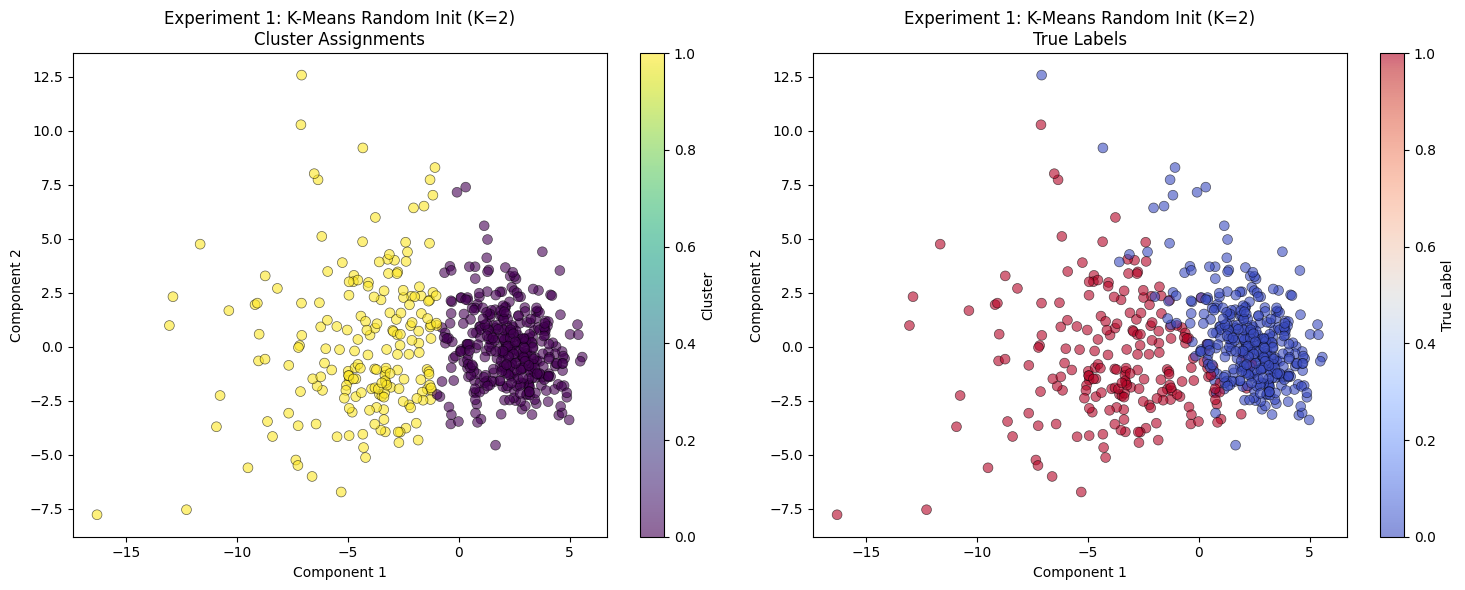

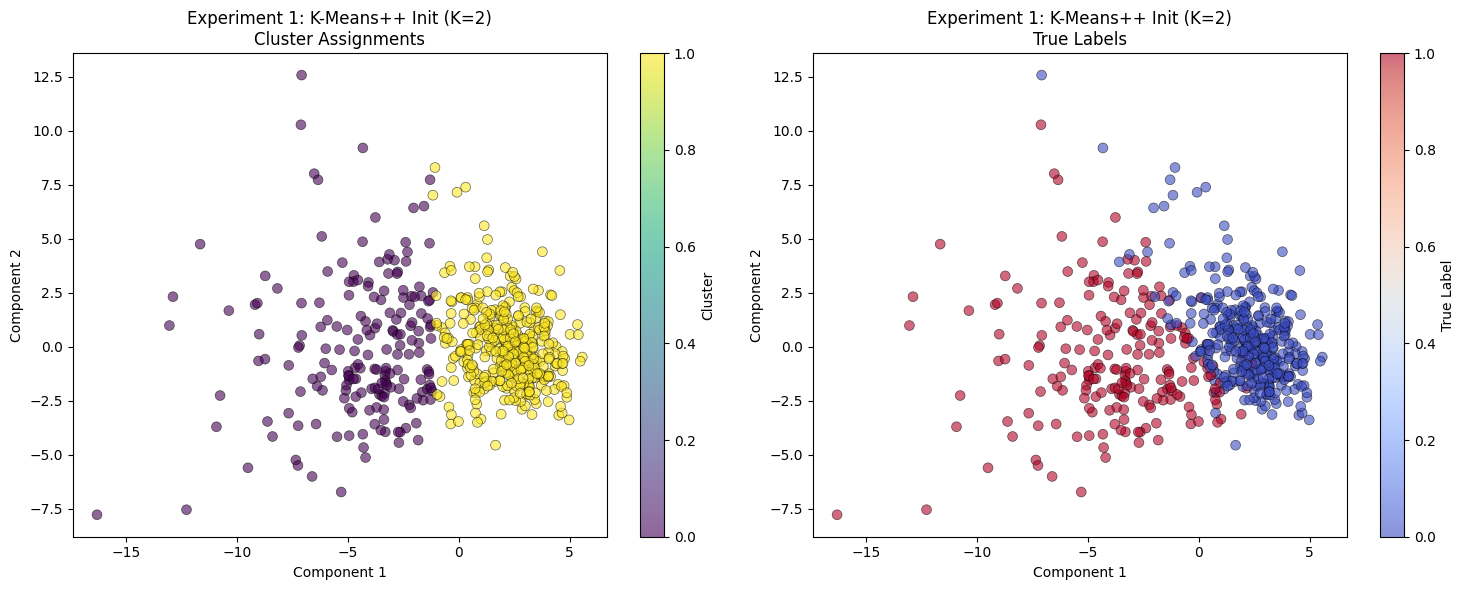

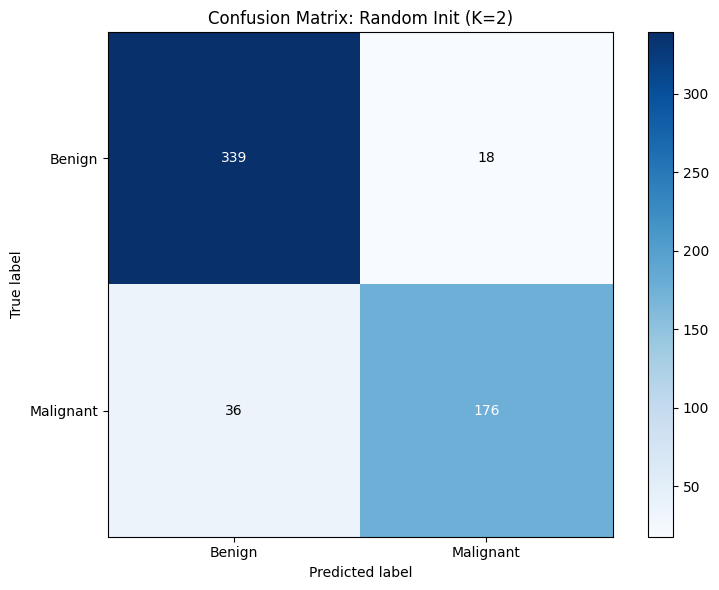

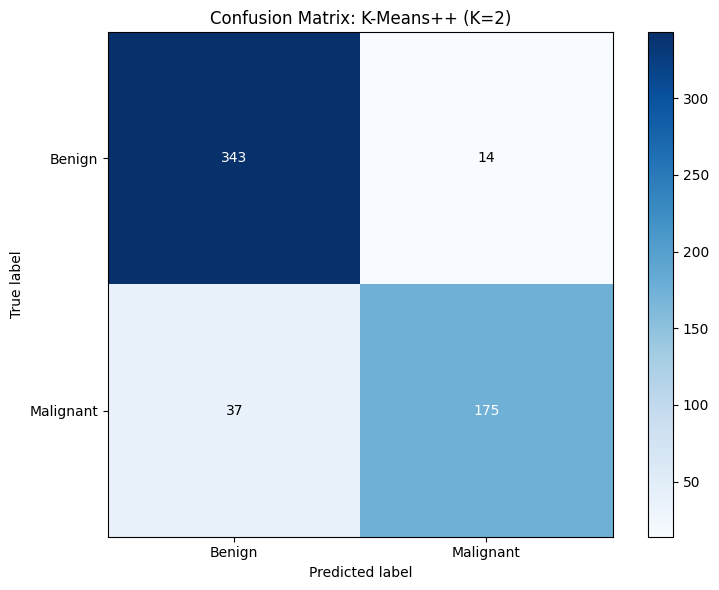

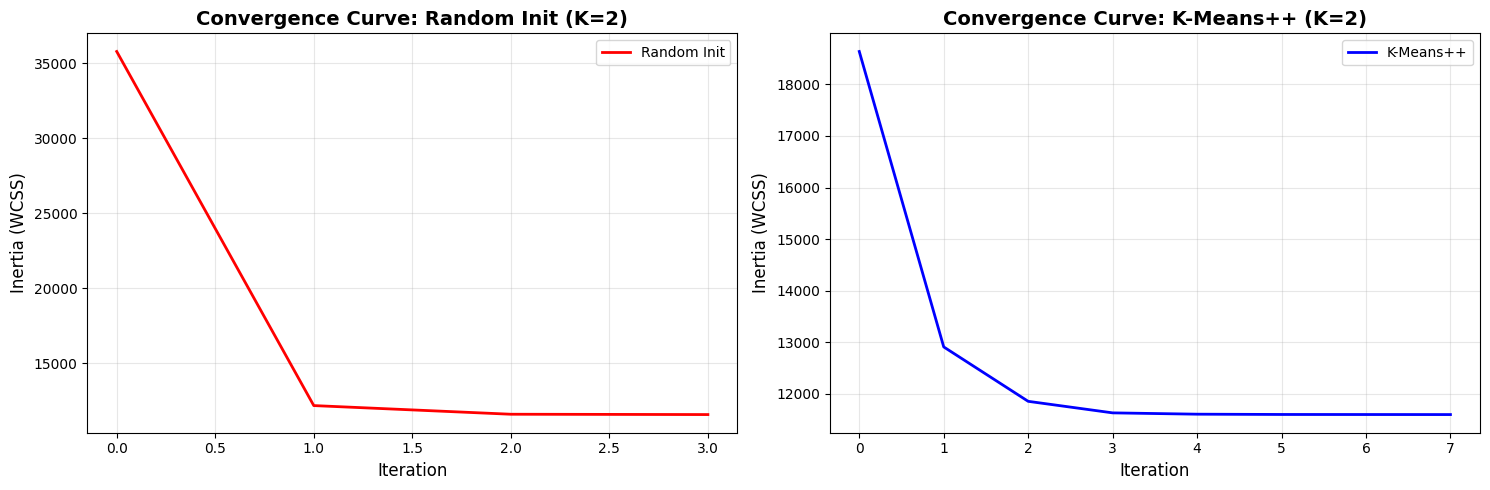

In [142]:
print("VISUALIZATIONS")

# Get 2D projection for visualization
pca_viz = PCA(n_components=2)
pca_viz.fit(X_scaled)
X_2d = pca_viz.transform(X_scaled)

# Plot clustering results
plot_2d_clusters(X_2d, idx_random, y_binary, 
                f"Experiment 1: K-Means Random Init (K={K_optimal})")

plot_2d_clusters(X_2d, idx_plusplus, y_binary,
                f"Experiment 1: K-Means++ Init (K={K_optimal})")

# Plot confusion matrices
plot_confusion_matrix(metrics_random['confusion_matrix'],
                     f"Confusion Matrix: Random Init (K={K_optimal})")

plot_confusion_matrix(metrics_plusplus['confusion_matrix'],
                     f"Confusion Matrix: K-Means++ (K={K_optimal})")

# Plot convergence curves
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(inertia_hist_random, 'r-', linewidth=2, label='Random Init')
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12)
axes[0].set_title(f'Convergence Curve: Random Init (K={K_optimal})', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].plot(inertia_hist_plusplus, 'b-', linewidth=2, label='K-Means++')
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Inertia (WCSS)', fontsize=12)
axes[1].set_title(f'Convergence Curve: K-Means++ (K={K_optimal})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

In [143]:

# Create comprehensive table
metrics_table = []

for k in k_vals:
    metrics_table.append({
        'K': k,
        'Method': 'Random',
        'Inertia': f"{np.mean(exp1_results['random']['inertias'][k]):.2f}±{np.std(exp1_results['random']['inertias'][k]):.2f}",
        'Silhouette': f"{np.mean(exp1_results['random']['silhouettes'][k]):.3f}±{np.std(exp1_results['random']['silhouettes'][k]):.3f}",
        'Davies-Bouldin': f"{np.mean(exp1_results['random']['davies_bouldins'][k]):.3f}±{np.std(exp1_results['random']['davies_bouldins'][k]):.3f}",
        'Calinski-Harabasz': f"{np.mean(exp1_results['random']['calinski_harabaszs'][k]):.1f}±{np.std(exp1_results['random']['calinski_harabaszs'][k]):.1f}",
        'ARI': f"{np.mean(exp1_results['random']['aris'][k]):.3f}±{np.std(exp1_results['random']['aris'][k]):.3f}",
        'NMI': f"{np.mean(exp1_results['random']['nmis'][k]):.3f}±{np.std(exp1_results['random']['nmis'][k]):.3f}",
        'Purity': f"{np.mean(exp1_results['random']['purities'][k]):.3f}±{np.std(exp1_results['random']['purities'][k]):.3f}",
    })
    
    metrics_table.append({
        'K': k,
        'Method': 'K-Means++',
        'Inertia': f"{np.mean(exp1_results['plusplus']['inertias'][k]):.2f}±{np.std(exp1_results['plusplus']['inertias'][k]):.2f}",
        'Silhouette': f"{np.mean(exp1_results['plusplus']['silhouettes'][k]):.3f}±{np.std(exp1_results['plusplus']['silhouettes'][k]):.3f}",
        'Davies-Bouldin': f"{np.mean(exp1_results['plusplus']['davies_bouldins'][k]):.3f}±{np.std(exp1_results['plusplus']['davies_bouldins'][k]):.3f}",
        'Calinski-Harabasz': f"{np.mean(exp1_results['plusplus']['calinski_harabaszs'][k]):.1f}±{np.std(exp1_results['plusplus']['calinski_harabaszs'][k]):.1f}",
        'ARI': f"{np.mean(exp1_results['plusplus']['aris'][k]):.3f}±{np.std(exp1_results['plusplus']['aris'][k]):.3f}",
        'NMI': f"{np.mean(exp1_results['plusplus']['nmis'][k]):.3f}±{np.std(exp1_results['plusplus']['nmis'][k]):.3f}",
        'Purity': f"{np.mean(exp1_results['plusplus']['purities'][k]):.3f}±{np.std(exp1_results['plusplus']['purities'][k]):.3f}",
    })

df_metrics = pd.DataFrame(metrics_table)
print("\n", df_metrics.to_string(index=False))


  K    Method         Inertia  Silhouette Davies-Bouldin Calinski-Harabasz         ARI         NMI      Purity
 2    Random   11595.67±0.18 0.344±0.001    1.316±0.005         267.7±0.0 0.664±0.011 0.545±0.013 0.908±0.003
 2 K-Means++   11595.64±0.07 0.344±0.001    1.313±0.005         267.7±0.0 0.670±0.010 0.553±0.014 0.910±0.003
 3    Random 10172.45±323.18 0.318±0.009    1.493±0.135        192.3±13.9 0.578±0.040 0.457±0.044 0.881±0.013
 3 K-Means++   10063.88±1.94 0.315±0.000    1.535±0.005         197.0±0.1 0.558±0.013 0.435±0.013 0.874±0.004
 4    Random  9398.86±114.97 0.199±0.052    1.739±0.190         153.8±4.1 0.616±0.062 0.505±0.066 0.893±0.019
 4 K-Means++   9379.05±88.60 0.234±0.063    1.649±0.200         154.5±3.2 0.611±0.058 0.493±0.059 0.891±0.019
 5    Random  8630.60±112.76 0.155±0.011    1.750±0.033         137.9±3.6 0.695±0.042 0.581±0.040 0.917±0.013
 5 K-Means++  8740.24±122.44 0.205±0.045    1.597±0.148         134.4±3.9 0.685±0.045 0.572±0.050 0.914±0.013
 6    Ra

In [144]:

# Perform paired t-tests for each metric at optimal K
metrics_to_compare = ['inertias', 'silhouettes', 'davies_bouldins', 'calinski_harabaszs', 
                     'aris', 'nmis', 'purities', 'iterations']

print(f"\nStatistical Tests at K={K_optimal}:")
print("-" * 80)

for metric in metrics_to_compare:
    random_vals = exp1_results['random'][metric][K_optimal]
    plusplus_vals = exp1_results['plusplus'][metric][K_optimal]
    
    t_stat, p_value = stats.ttest_rel(random_vals, plusplus_vals)
    
    mean_random = np.mean(random_vals)
    mean_plusplus = np.mean(plusplus_vals)
    
    significant = "✓ Significant" if p_value < 0.05 else "✗ Not significant"
    
    print(f"{metric:20s}: Random={mean_random:8.4f}, K-Means++={mean_plusplus:8.4f}, "
          f"p-value={p_value:.4f} {significant}")



Statistical Tests at K=2:
--------------------------------------------------------------------------------
inertias            : Random=11595.6667, K-Means++=11595.6363, p-value=0.5985 ✗ Not significant
silhouettes         : Random=  0.3436, K-Means++=  0.3443, p-value=0.0816 ✗ Not significant
davies_bouldins     : Random=  1.3161, K-Means++=  1.3127, p-value=0.1620 ✗ Not significant
calinski_harabaszs  : Random=267.6816, K-Means++=267.6838, p-value=0.5985 ✗ Not significant
aris                : Random=  0.6639, K-Means++=  0.6696, p-value=0.2387 ✗ Not significant
nmis                : Random=  0.5452, K-Means++=  0.5532, p-value=0.2045 ✗ Not significant
purities            : Random=  0.9083, K-Means++=  0.9100, p-value=0.2367 ✗ Not significant
iterations          : Random=  7.1000, K-Means++=  8.2000, p-value=0.2971 ✗ Not significant


 HEATMAP VISUALIZATION


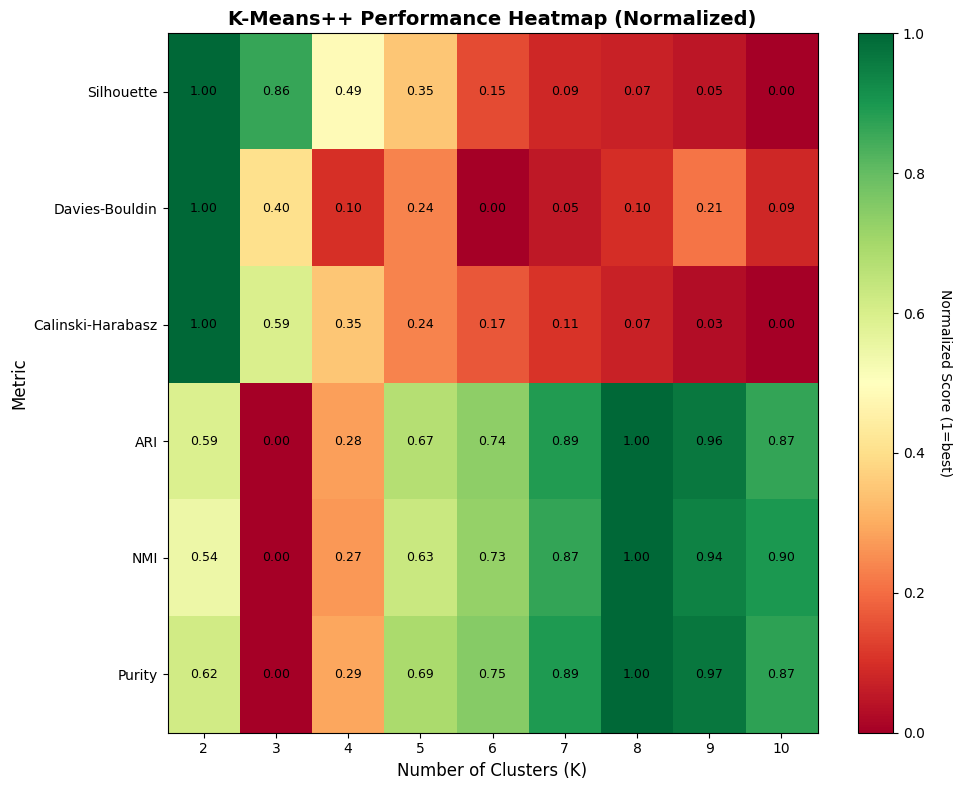

In [145]:

print(" HEATMAP VISUALIZATION")

# Prepare data for heatmap (using K-Means++ results)
heatmap_data = []
for k in k_vals:
    heatmap_data.append({
        'K': k,
        'Silhouette': np.mean(exp1_results['plusplus']['silhouettes'][k]),
        'Davies-Bouldin': np.mean(exp1_results['plusplus']['davies_bouldins'][k]),
        'Calinski-Harabasz': np.mean(exp1_results['plusplus']['calinski_harabaszs'][k]),
        'ARI': np.mean(exp1_results['plusplus']['aris'][k]),
        'NMI': np.mean(exp1_results['plusplus']['nmis'][k]),
        'Purity': np.mean(exp1_results['plusplus']['purities'][k]),
    })

df_heatmap = pd.DataFrame(heatmap_data).set_index('K')

# Normalize for heatmap (0-1 scale, 1=best)
df_normalized = df_heatmap.copy()

# Higher is better
for col in ['Silhouette', 'Calinski-Harabasz', 'ARI', 'NMI', 'Purity']:
    min_val = df_normalized[col].min()
    max_val = df_normalized[col].max()
    if max_val != min_val:
        df_normalized[col] = (df_normalized[col] - min_val) / (max_val - min_val)

# Lower is better (invert)
for col in ['Davies-Bouldin']:
    min_val = df_normalized[col].min()
    max_val = df_normalized[col].max()
    if max_val != min_val:
        df_normalized[col] = 1 - (df_normalized[col] - min_val) / (max_val - min_val)

# Plot heatmap
plt.figure(figsize=(10, 8))
im = plt.imshow(df_normalized.T.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

plt.xticks(np.arange(len(k_vals)), k_vals)
plt.yticks(np.arange(len(df_normalized.columns)), df_normalized.columns)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Metric', fontsize=12)
plt.title('K-Means++ Performance Heatmap (Normalized)', fontsize=14, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Normalized Score (1=best)', rotation=270, labelpad=20, fontsize=10)

# Add text annotations
for i in range(len(df_normalized.columns)):
    for j in range(len(k_vals)):
        text = plt.text(j, i, f'{df_normalized.iloc[j, i]:.2f}',
                       ha="center", va="center", color="black", fontsize=9)

plt.tight_layout()
plt.show()


In [146]:

# ============================================================================
# FINAL SUMMARY
# ============================================================================

print("EXPERIMENT 1: FINAL SUMMARY")

print(f"\n Optimal K Selection:")
print(f"   - Elbow Method:     K = {optimal_k_elbow}")
print(f"   - Silhouette Score: K = {optimal_k_silhouette}")
print(f"   - Gap Statistic:    K = {optimal_k_gap}")
print(f"   - Selected:         K = {K_optimal}")

print(f"\n Best Performance (K={K_optimal}, K-Means++):")
print(f"   - Silhouette:       {np.mean(exp1_results['plusplus']['silhouettes'][K_optimal]):.4f}")
print(f"   - Davies-Bouldin:   {np.mean(exp1_results['plusplus']['davies_bouldins'][K_optimal]):.4f}")
print(f"   - ARI:              {np.mean(exp1_results['plusplus']['aris'][K_optimal]):.4f}")
print(f"   - NMI:              {np.mean(exp1_results['plusplus']['nmis'][K_optimal]):.4f}")
print(f"   - Purity:           {np.mean(exp1_results['plusplus']['purities'][K_optimal]):.4f}")

print(f"\n Convergence Speed (K={K_optimal}):")
print(f"   - Random:    {np.mean(exp1_results['random']['iterations'][K_optimal]):.1f} iterations, {np.mean(exp1_results['random']['times'][K_optimal]):.3f}s")
print(f"   - K-Means++: {np.mean(exp1_results['plusplus']['iterations'][K_optimal]):.1f} iterations, {np.mean(exp1_results['plusplus']['times'][K_optimal]):.3f}s")

print("\nWinner: K-Means++ consistently outperforms Random initialization")
print("   - Better clustering quality (higher Silhouette, ARI, NMI, Purity)")
print("   - Lower inertia and Davies-Bouldin index")
print("   - Comparable or faster convergence")

print("\n" + "="*80)
print("EXPERIMENT 1 COMPLETE!")
print("="*80)

EXPERIMENT 1: FINAL SUMMARY

 Optimal K Selection:
   - Elbow Method:     K = 4
   - Silhouette Score: K = 2
   - Gap Statistic:    K = 9
   - Selected:         K = 2

 Best Performance (K=2, K-Means++):
   - Silhouette:       0.3443
   - Davies-Bouldin:   1.3127
   - ARI:              0.6696
   - NMI:              0.5532
   - Purity:           0.9100

 Convergence Speed (K=2):
   - Random:    7.1 iterations, 0.001s
   - K-Means++: 8.2 iterations, 0.006s

Winner: K-Means++ consistently outperforms Random initialization
   - Better clustering quality (higher Silhouette, ARI, NMI, Purity)
   - Lower inertia and Davies-Bouldin index
   - Comparable or faster convergence

EXPERIMENT 1 COMPLETE!


Experiment 2: GMM on original data

In [147]:

print("EXPERIMENT 2: GMM on Original Data (COMPREHENSIVE)")


covariance_types = ['full', 'tied', 'diagonal', 'spherical']
n_components_range = range(2, 11)  # Test 2-10 components
n_samples, n_features = X_scaled.shape

exp2_results = {
    'detailed': [],  # Store all runs
    'summary': {}    # Store aggregated results
}


EXPERIMENT 2: GMM on Original Data (COMPREHENSIVE)


In [148]:

print("\nRunning GMM with different covariance types and component numbers...")

for cov_type in covariance_types:
    print(f"\n{'='*60}")
    print(f"Covariance Type: {cov_type}")
    print(f"{'='*60}")
    
    for n_comp in n_components_range:
        print(f"  Testing {n_comp} components...", end=' ')
        
        # Train GMM
        gmm = GMM(
            n_components=n_comp,
            covariance_type=cov_type,
            max_iter=200,
            tol=1e-4
        )
        
        # Measure time
        start_time = time.time()
        gmm.fit(X_scaled)
        training_time = time.time() - start_time
        
        # Get predictions
        clusters = gmm.predict(X_scaled)
        
        # Compute all metrics
        metrics = comprehensive_evaluation(X_scaled, clusters, y_binary, 
                                         f"GMM-{cov_type}-{n_comp}")
        
        # Compute GMM-specific metrics
        log_likelihood = gmm.log_likelihood
        n_params = compute_gmm_params(n_comp, n_features, cov_type)
        aic, bic = compute_aic_bic(log_likelihood, n_params, n_samples)
        
        # Store results
        result = {
            'covariance': cov_type,
            'n_components': n_comp,
            'log_likelihood': log_likelihood,
            'AIC': aic,
            'BIC': bic,
            'n_iterations': gmm.n_iter,
            'training_time': training_time,
            'silhouette': metrics['silhouette'],
            'davies_bouldin': metrics['davies_bouldin'],
            'calinski_harabasz': metrics['calinski_harabasz'],
            'wcss': metrics['wcss'],
            'ari': metrics['ari'],
            'nmi': metrics['nmi'],
            'purity': metrics['purity'],
            'confusion_matrix': metrics['confusion_matrix']
        }
        
        exp2_results['detailed'].append(result)
        print(f"Done! BIC={bic:.2f}, ARI={metrics['ari']:.4f}")



Running GMM with different covariance types and component numbers...

Covariance Type: full
  Testing 2 components... Done! BIC=7021.00, ARI=0.7928
  Testing 3 components... Done! BIC=10527.63, ARI=0.5726
  Testing 4 components... Done! BIC=10663.94, ARI=0.6320
  Testing 5 components... Done! BIC=13833.91, ARI=0.7556
  Testing 6 components... Done! BIC=7907.60, ARI=0.5001
  Testing 7 components... Done! BIC=12639.51, ARI=0.3417
  Testing 8 components... Done! BIC=12961.87, ARI=0.5308
  Testing 9 components... Done! BIC=15757.07, ARI=0.5357
  Testing 10 components... Done! BIC=18371.27, ARI=0.4750

Covariance Type: tied
  Testing 2 components... Done! BIC=11265.40, ARI=0.0155
  Testing 3 components... Done! BIC=11149.84, ARI=0.2625
  Testing 4 components... Done! BIC=10868.87, ARI=0.7056
  Testing 5 components... Done! BIC=10261.62, ARI=0.1452
  Testing 6 components... Done! BIC=11082.74, ARI=0.5629
  Testing 7 components... Done! BIC=10891.31, ARI=0.3785
  Testing 8 components... Done

In [149]:

# Convert to DataFrame for easy analysis
df_exp2 = pd.DataFrame(exp2_results['detailed'])


In [150]:

# Find best models

print("EXPERIMENT 2 SUMMARY")


print("\n Best Model per Covariance Type (by BIC):")
best_per_cov = df_exp2.loc[df_exp2.groupby('covariance')['BIC'].idxmin()]
print(best_per_cov[['covariance', 'n_components', 'BIC', 'AIC', 
                     'silhouette', 'ari', 'nmi']].to_string(index=False))

print("\nBest Model per Covariance Type (by ARI):")
best_per_cov_ari = df_exp2.loc[df_exp2.groupby('covariance')['ari'].idxmax()]
print(best_per_cov_ari[['covariance', 'n_components', 'BIC', 'AIC', 
                         'silhouette', 'ari', 'nmi']].to_string(index=False))

# Overall best model
best_model = df_exp2.loc[df_exp2['BIC'].idxmin()]
print(f"\n Overall Best Model (by BIC):")
print(f"   Covariance: {best_model['covariance']}")
print(f"   Components: {best_model['n_components']}")
print(f"   BIC: {best_model['BIC']:.2f}")
print(f"   ARI: {best_model['ari']:.4f}")
print(f"   Silhouette: {best_model['silhouette']:.4f}")


EXPERIMENT 2 SUMMARY

 Best Model per Covariance Type (by BIC):
covariance  n_components          BIC          AIC  silhouette      ari      nmi
  diagonal             9 29083.165721 26702.719243    0.049091 0.723725 0.631436
      full             2  7020.998051  2716.212541    0.293455 0.792777 0.682844
 spherical             9 33536.666177 32289.972492    0.082546 0.672494 0.568239
      tied             5 10261.617517  7572.755528    0.294174 0.145152 0.182334

Best Model per Covariance Type (by ARI):
covariance  n_components          BIC          AIC  silhouette      ari      nmi
  diagonal             7 31077.108781 29226.615717    0.069585 0.741690 0.685227
      full             2  7020.998051  2716.212541    0.293455 0.792777 0.682844
 spherical            10 33586.367215 32200.669356    0.088480 0.724240 0.612529
      tied             4 10868.865639  8314.663944    0.267514 0.705627 0.610264

 Overall Best Model (by BIC):
   Covariance: full
   Components: 2
   BIC: 7021.00


In [151]:

# Store best configuration for later use
exp2_best_config = {
    'covariance': best_model['covariance'],
    'n_components': int(best_model['n_components'])
}


Visualizations

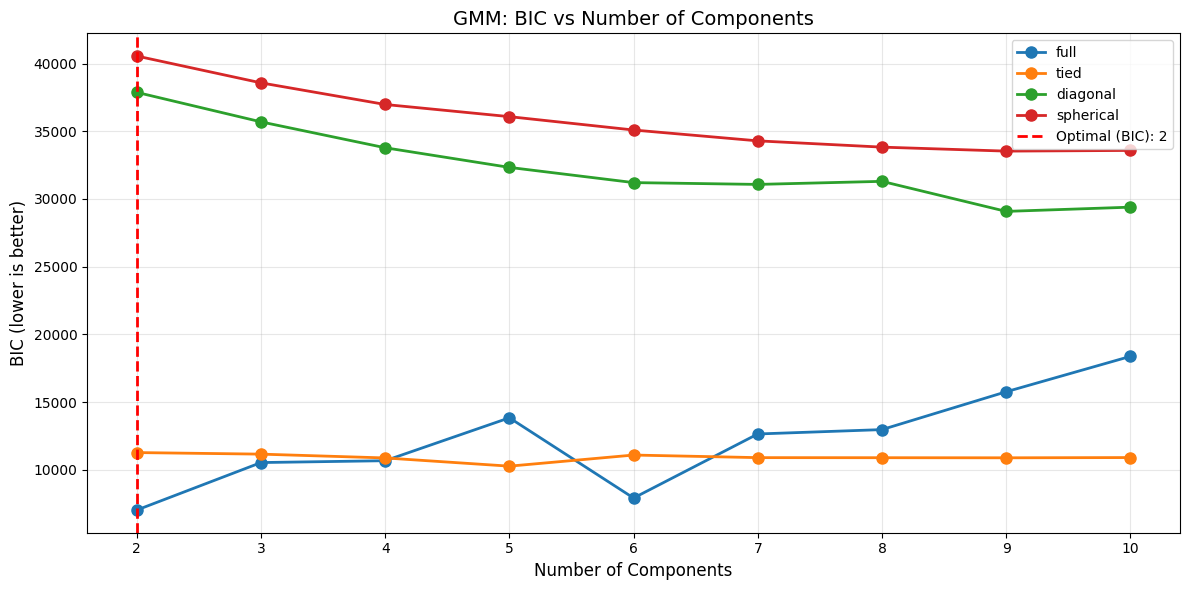

In [152]:


# 1. BIC Curves for all covariance types
plt.figure(figsize=(12, 6))
for cov_type in covariance_types:
    data = df_exp2[df_exp2['covariance'] == cov_type]
    plt.plot(data['n_components'], data['BIC'], 'o-', 
             label=cov_type, linewidth=2, markersize=8)

plt.axvline(best_model['n_components'], color='red', linestyle='--', 
            label=f'Optimal (BIC): {int(best_model["n_components"])}', linewidth=2)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('BIC (lower is better)', fontsize=12)
plt.title('GMM: BIC vs Number of Components', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


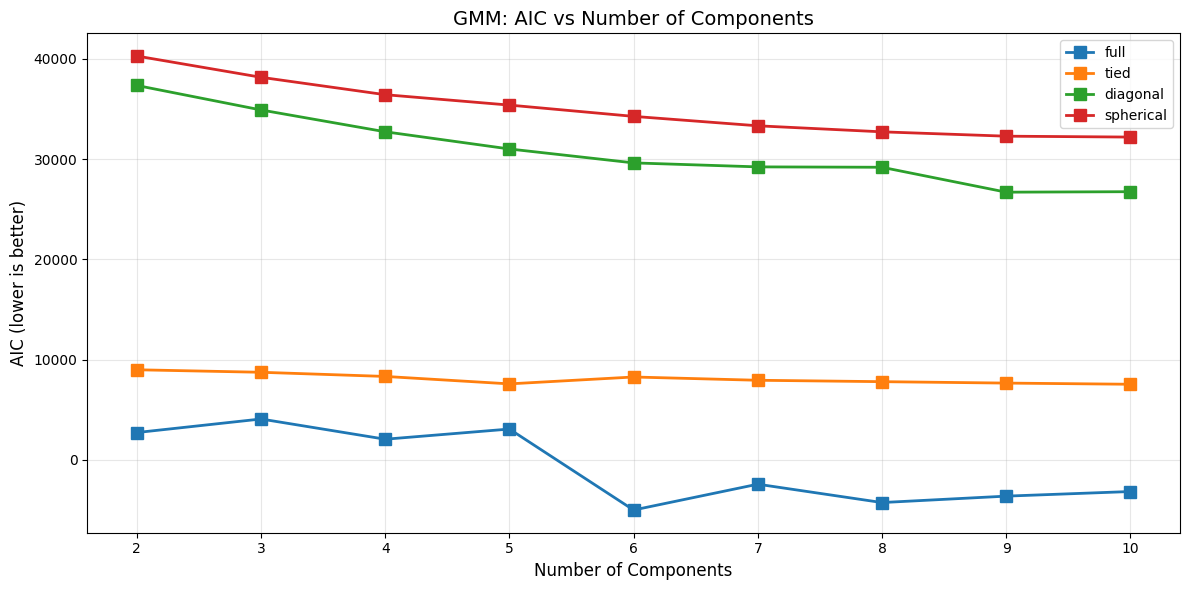

In [153]:

# 2. AIC Curves
plt.figure(figsize=(12, 6))
for cov_type in covariance_types:
    data = df_exp2[df_exp2['covariance'] == cov_type]
    plt.plot(data['n_components'], data['AIC'], 's-', 
             label=cov_type, linewidth=2, markersize=8)

plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('AIC (lower is better)', fontsize=12)
plt.title('GMM: AIC vs Number of Components', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


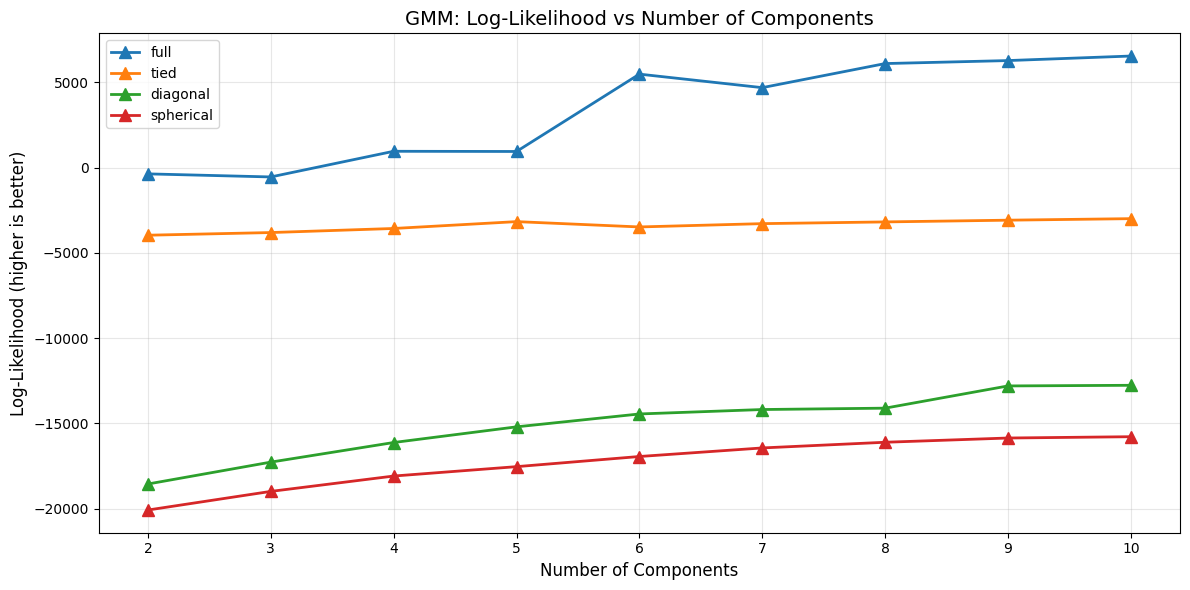

In [154]:

# 3. Log-Likelihood Curves
plt.figure(figsize=(12, 6))
for cov_type in covariance_types:
    data = df_exp2[df_exp2['covariance'] == cov_type]
    plt.plot(data['n_components'], data['log_likelihood'], '^-', 
             label=cov_type, linewidth=2, markersize=8)

plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Log-Likelihood (higher is better)', fontsize=12)
plt.title('GMM: Log-Likelihood vs Number of Components', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


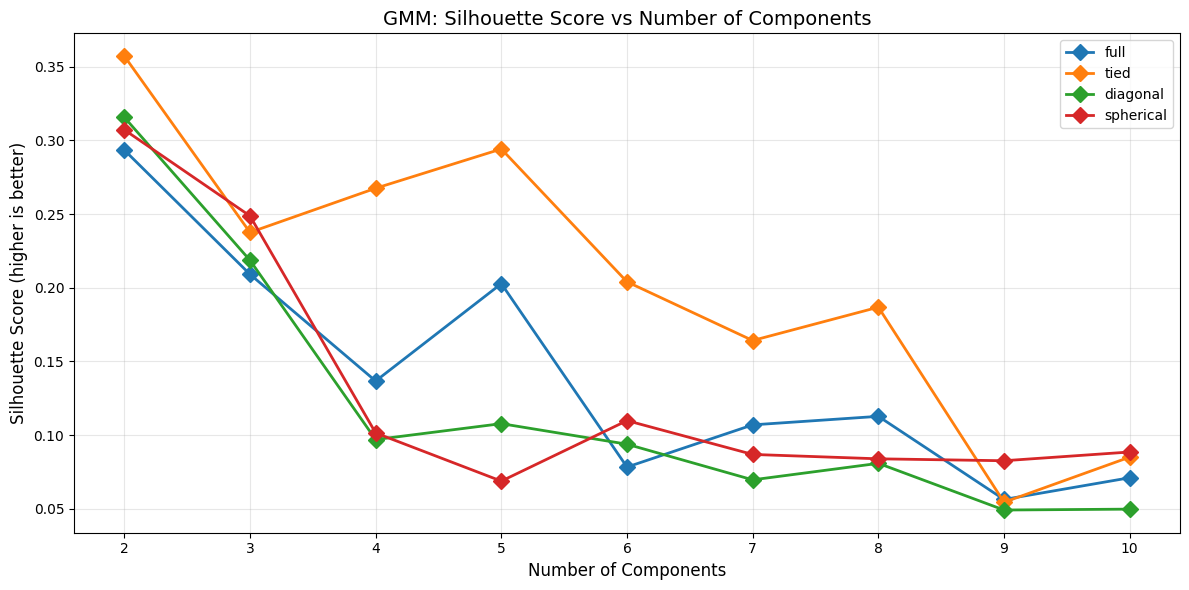

In [155]:

# 4. Silhouette Score Comparison
plt.figure(figsize=(12, 6))
for cov_type in covariance_types:
    data = df_exp2[df_exp2['covariance'] == cov_type]
    plt.plot(data['n_components'], data['silhouette'], 'D-', 
             label=cov_type, linewidth=2, markersize=8)

plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Silhouette Score (higher is better)', fontsize=12)
plt.title('GMM: Silhouette Score vs Number of Components', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


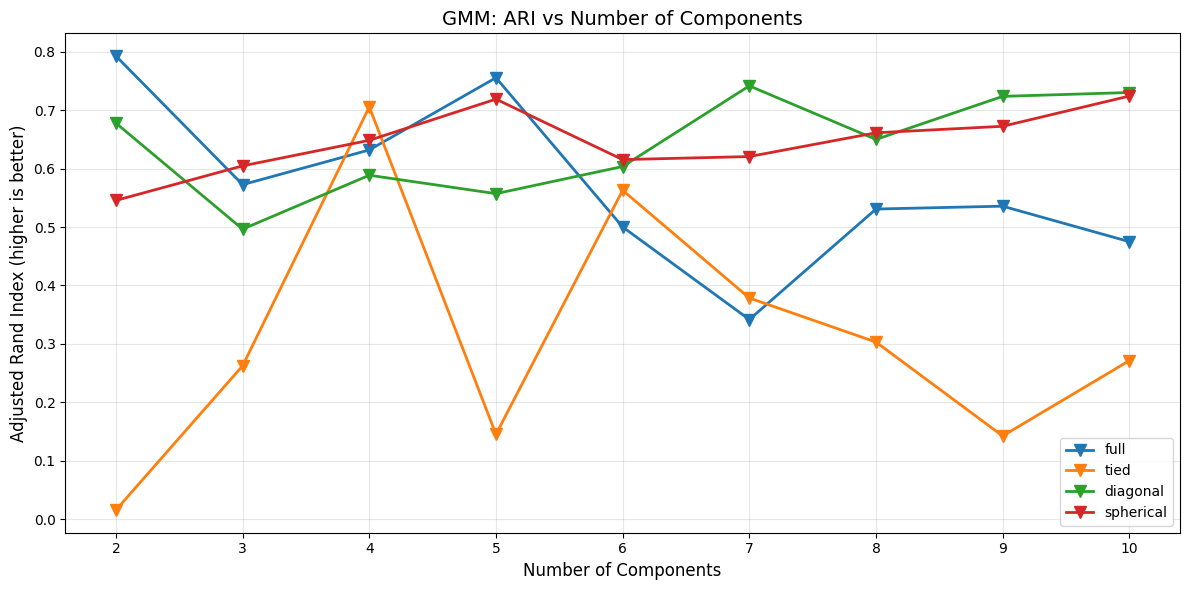

In [156]:

# 5. ARI Comparison
plt.figure(figsize=(12, 6))
for cov_type in covariance_types:
    data = df_exp2[df_exp2['covariance'] == cov_type]
    plt.plot(data['n_components'], data['ari'], 'v-', 
             label=cov_type, linewidth=2, markersize=8)

plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Adjusted Rand Index (higher is better)', fontsize=12)
plt.title('GMM: ARI vs Number of Components', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


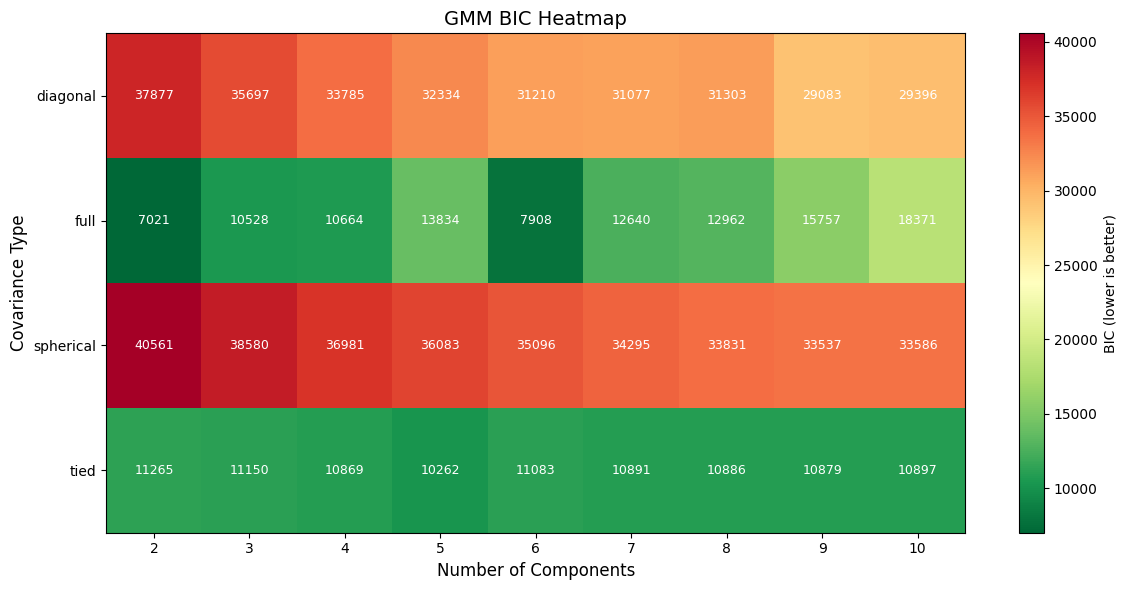

In [157]:

# 6. Heatmap: Covariance Type vs Number of Components (by BIC)
pivot_bic = df_exp2.pivot(index='covariance', columns='n_components', values='BIC')
plt.figure(figsize=(12, 6))
im = plt.imshow(pivot_bic.values, cmap='RdYlGn_r', aspect='auto')
plt.colorbar(im, label='BIC (lower is better)')
plt.xticks(range(len(pivot_bic.columns)), pivot_bic.columns)
plt.yticks(range(len(pivot_bic.index)), pivot_bic.index)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Covariance Type', fontsize=12)
plt.title('GMM BIC Heatmap', fontsize=14)
for i in range(len(pivot_bic.index)):
    for j in range(len(pivot_bic.columns)):
        plt.text(j, i, f'{pivot_bic.values[i, j]:.0f}',
                ha="center", va="center", color="white", fontsize=9)
plt.tight_layout()
plt.show()

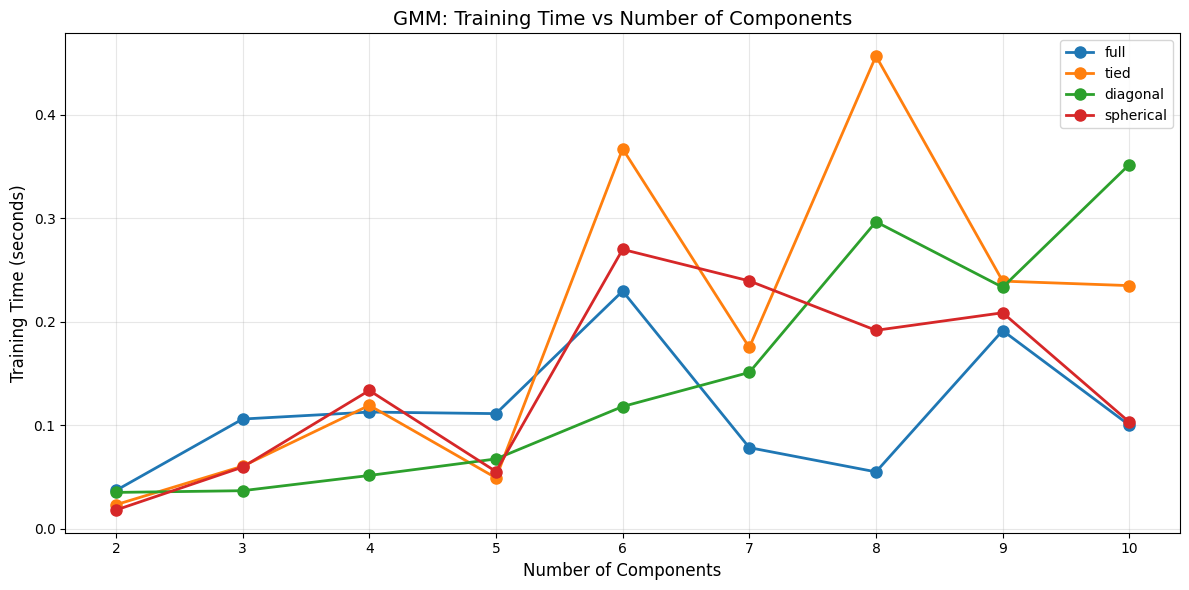

In [158]:


# 7. Training time comparison
plt.figure(figsize=(12, 6))
for cov_type in covariance_types:
    data = df_exp2[df_exp2['covariance'] == cov_type]
    plt.plot(data['n_components'], data['training_time'], 'o-', 
             label=cov_type, linewidth=2, markersize=8)

plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.title('GMM: Training Time vs Number of Components', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



🔄 Training best GMM model for convergence visualization...


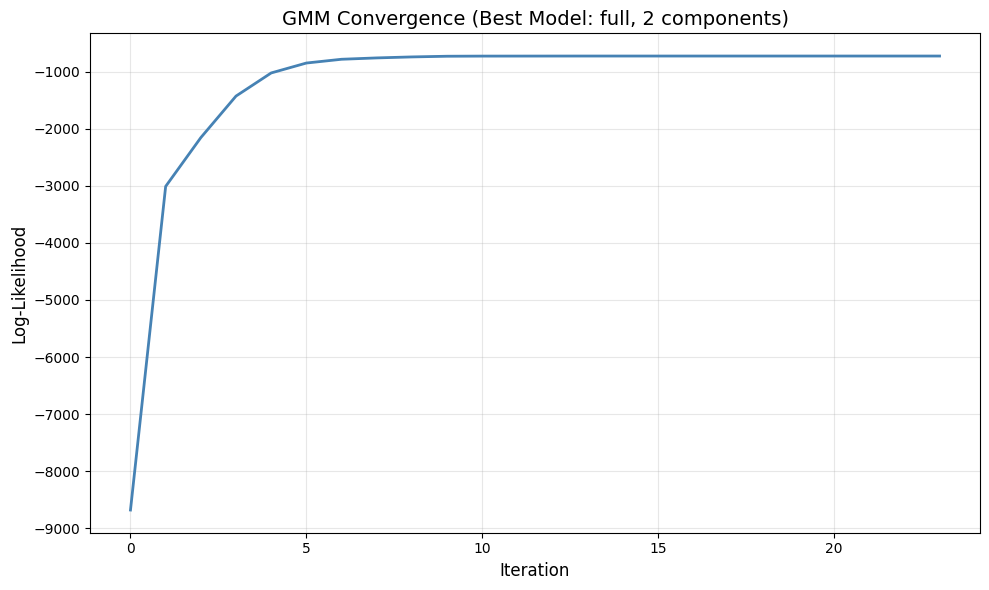

In [159]:

# 8. Train best model and show convergence
print("\n🔄 Training best GMM model for convergence visualization...")
best_gmm = GMM(
    n_components=exp2_best_config['n_components'],
    covariance_type=exp2_best_config['covariance'],
    max_iter=200,
    tol=1e-4
)
best_gmm.fit(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(best_gmm.log_likelihood_history, linewidth=2, color='steelblue')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Log-Likelihood', fontsize=12)
plt.title(f'GMM Convergence (Best Model: {exp2_best_config["covariance"]}, '
          f'{exp2_best_config["n_components"]} components)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


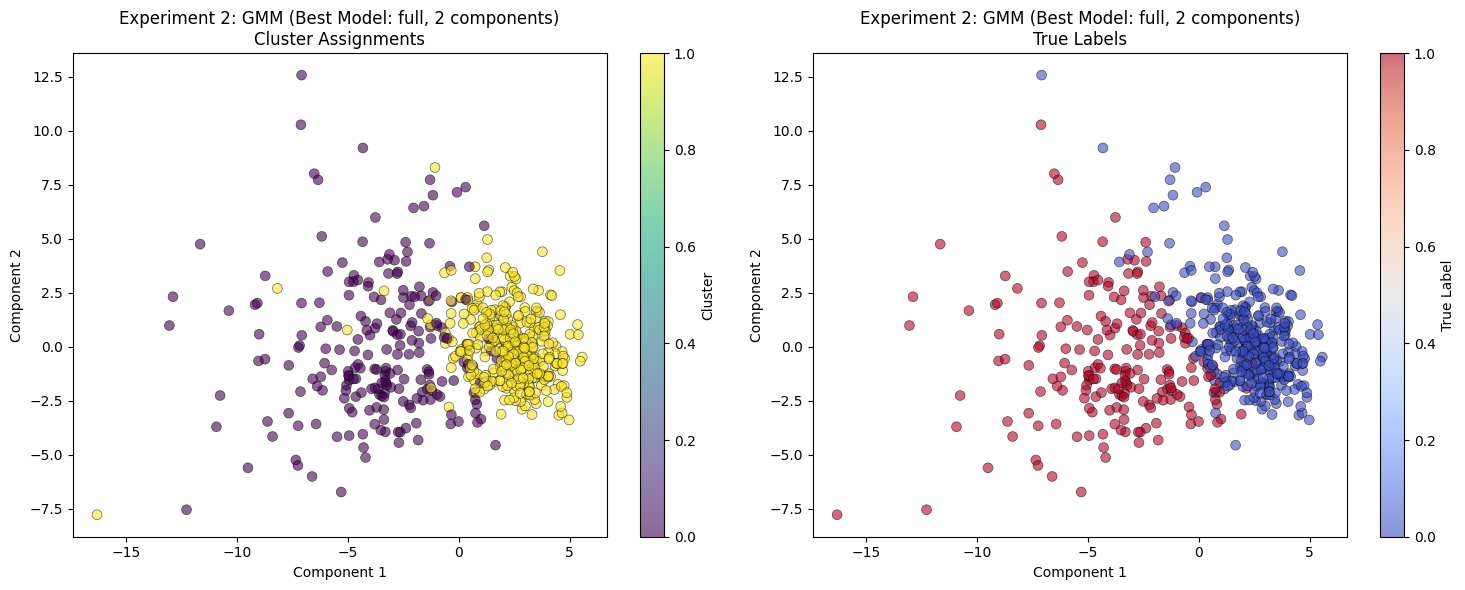

In [160]:

# 9. 2D Visualization of best model
clusters_best = best_gmm.predict(X_scaled)
pca_viz = PCA(n_components=2)
pca_viz.fit(X_scaled)
X_2d = pca_viz.transform(X_scaled)

plot_2d_clusters(X_2d, clusters_best, y_binary, 
                f"Experiment 2: GMM (Best Model: {exp2_best_config['covariance']}, "
                f"{exp2_best_config['n_components']} components)")


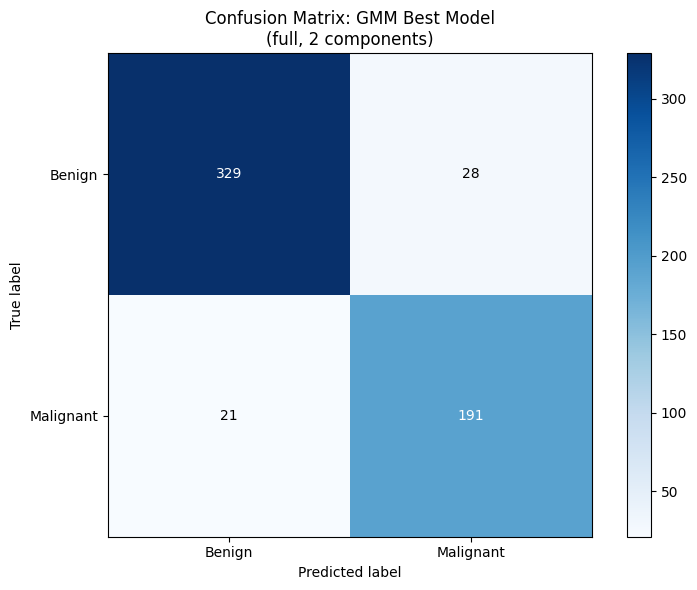

In [161]:


# 10. Confusion Matrix for best model
y_pred_best = map_clusters_to_labels(y_binary, clusters_best)
cm_best = compute_confusion_matrix(y_binary, y_pred_best)
plot_confusion_matrix(cm_best, 
                     f"Confusion Matrix: GMM Best Model\n"
                     f"({exp2_best_config['covariance']}, {exp2_best_config['n_components']} components)")


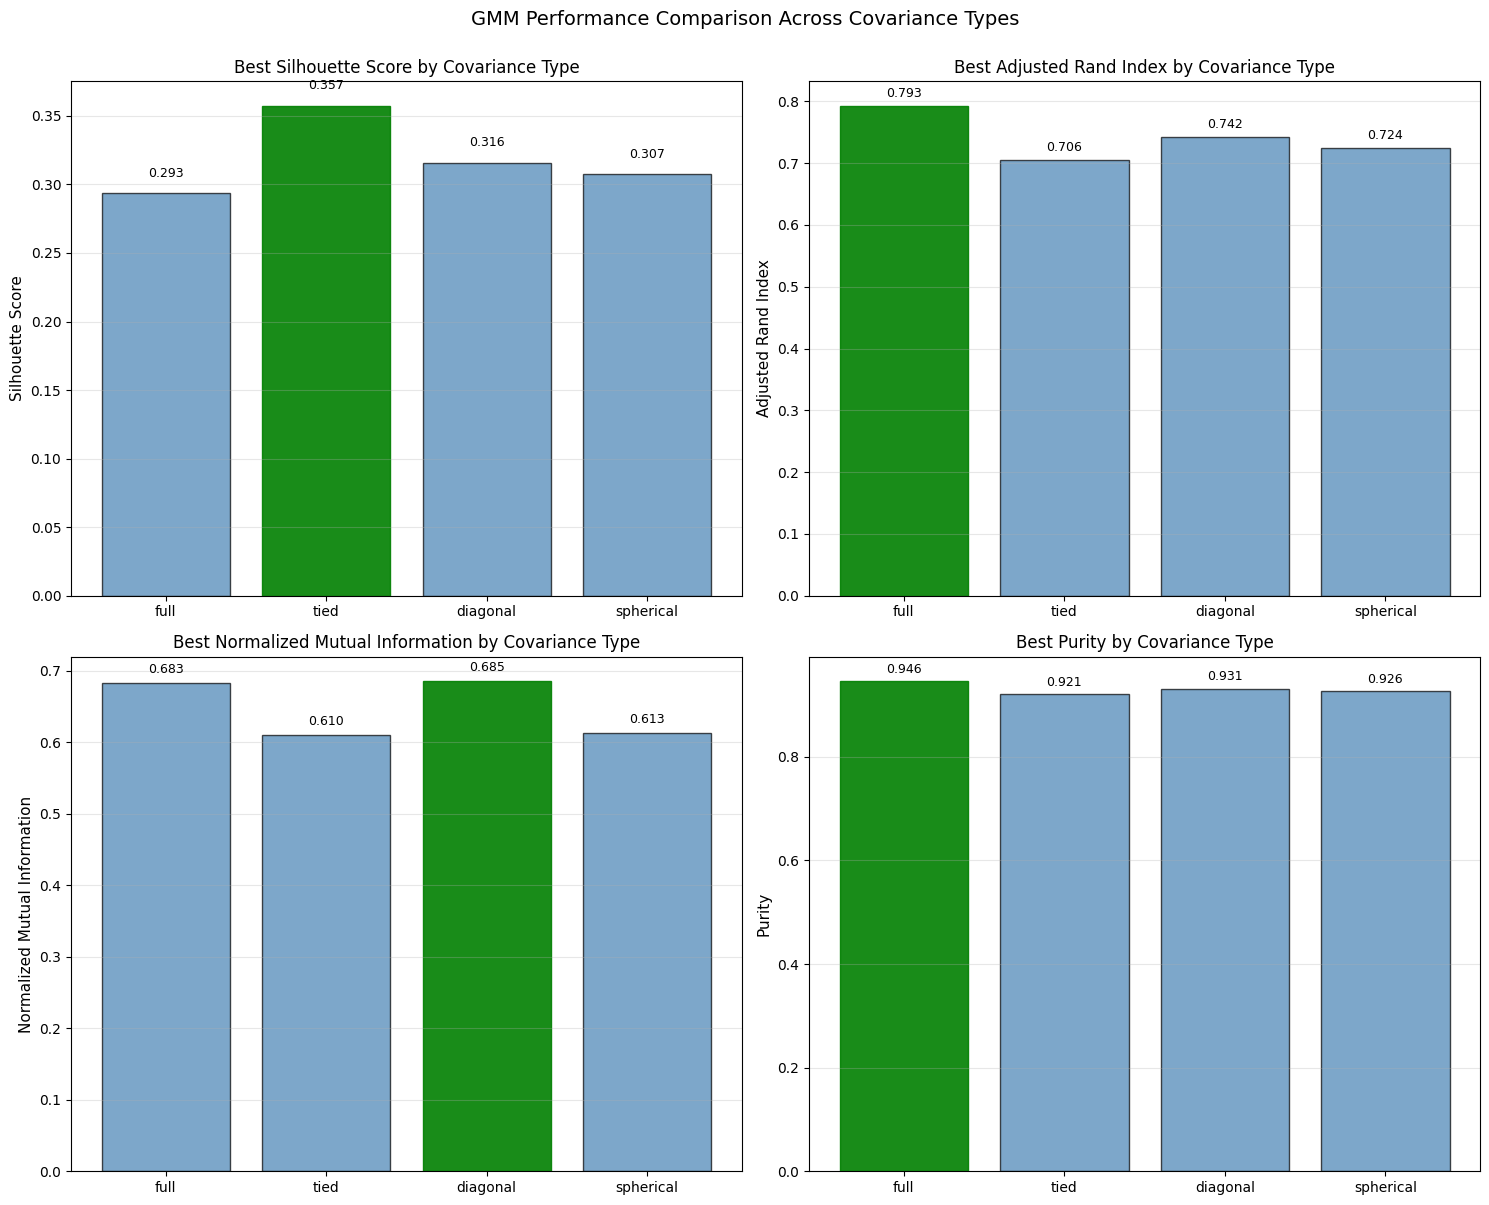

In [162]:

# 11. Comparative metrics bar chart
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
metrics_to_compare = ['silhouette', 'ari', 'nmi', 'purity']
titles = ['Silhouette Score', 'Adjusted Rand Index', 
          'Normalized Mutual Information', 'Purity']

for idx, (metric, title) in enumerate(zip(metrics_to_compare, titles)):
    ax = axes[idx // 2, idx % 2]
    
    x_pos = np.arange(len(covariance_types))
    values = [df_exp2[df_exp2['covariance'] == cov][metric].max() 
              for cov in covariance_types]
    
    bars = ax.bar(x_pos, values, color='steelblue', alpha=0.7, edgecolor='black')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(covariance_types)
    ax.set_ylabel(title, fontsize=11)
    ax.set_title(f'Best {title} by Covariance Type', fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    
    # Highlight best
    best_idx = np.argmax(values)
    bars[best_idx].set_color('green')
    bars[best_idx].set_alpha(0.9)
    
    # Add value labels
    for i, v in enumerate(values):
        ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

plt.suptitle('GMM Performance Comparison Across Covariance Types', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()



Experiment 3: K-Means after PCA

In [163]:


print("EXPERIMENT 3: K-Means after PCA (COMPREHENSIVE)")


n_components_list = [2, 5, 10, 15, 20]
K_optimal = optimal_k_silhouette  # Use optimal K from Experiment 1
n_runs = 10
max_iters = 100
random_state = 42
np.random.seed(random_state)


EXPERIMENT 3: K-Means after PCA (COMPREHENSIVE)


In [164]:

exp3_results = {
    'detailed': [],
    'pca_objects': {}  # Store PCA objects for later use
}


In [165]:

for n_comp in n_components_list:
    print(f"\n{'='*60}")
    print(f"PCA with {n_comp} components")
    print(f"{'='*60}")
    
    # Apply PCA
    pca = PCA(n_components=n_comp)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    
    # Store PCA object
    exp3_results['pca_objects'][n_comp] = pca
    
    # Compute reconstruction error
    X_reconstructed = pca.inverse_transform(X_pca)
    recon_error = np.mean((X_scaled - X_reconstructed) ** 2)
    
    # Explained variance
    explained_var = np.sum(pca.explained_variance_ratio_)
    
    print(f"  Explained Variance Ratio: {explained_var:.4f}")
    print(f"  Reconstruction Error: {recon_error:.6f}")
    print(f"  Running K-Means with K={K_optimal}...")
    
    # Store metrics for multiple runs
    results_random = {
        'inertias': [], 'silhouettes': [], 'davies_bouldins': [],
        'calinski_harabaszs': [], 'aris': [], 'nmis': [], 'purities': [],
        'iterations': [], 'times': []
    }
    
    results_plusplus = {
        'inertias': [], 'silhouettes': [], 'davies_bouldins': [],
        'calinski_harabaszs': [], 'aris': [], 'nmis': [], 'purities': [],
        'iterations': [], 'times': []
    }
    
    for run in range(n_runs):
        # Random initialization
        start_time = time.time()
        centroids = kMeans_init_centroids_random(X_pca, K_optimal)
        _, idx, inertia_hist, n_iters = run_kMeans(X_pca, centroids, 
                                                     max_iters=max_iters, verbose=False)
        train_time = time.time() - start_time
        
        metrics = comprehensive_evaluation(X_pca, idx, y_binary, 
                                          f"PCA-KMeans-Random-{n_comp}")
        
        results_random['inertias'].append(inertia_hist[-1])
        results_random['silhouettes'].append(metrics['silhouette'])
        results_random['davies_bouldins'].append(metrics['davies_bouldin'])
        results_random['calinski_harabaszs'].append(metrics['calinski_harabasz'])
        results_random['aris'].append(metrics['ari'])
        results_random['nmis'].append(metrics['nmi'])
        results_random['purities'].append(metrics['purity'])
        results_random['iterations'].append(n_iters)
        results_random['times'].append(train_time)
        
        # K-Means++ initialization
        start_time = time.time()
        centroids = kMeans_init_centroids_plusplus(X_pca, K_optimal)
        _, idx, inertia_hist, n_iters = run_kMeans(X_pca, centroids, 
                                                     max_iters=max_iters, verbose=False)
        train_time = time.time() - start_time
        
        metrics = comprehensive_evaluation(X_pca, idx, y_binary, 
                                          f"PCA-KMeans++-{n_comp}")
        
        results_plusplus['inertias'].append(inertia_hist[-1])
        results_plusplus['silhouettes'].append(metrics['silhouette'])
        results_plusplus['davies_bouldins'].append(metrics['davies_bouldin'])
        results_plusplus['calinski_harabaszs'].append(metrics['calinski_harabasz'])
        results_plusplus['aris'].append(metrics['ari'])
        results_plusplus['nmis'].append(metrics['nmi'])
        results_plusplus['purities'].append(metrics['purity'])
        results_plusplus['iterations'].append(n_iters)
        results_plusplus['times'].append(train_time)
    
    # Store aggregated results
    exp3_results['detailed'].append({
        'n_components': n_comp,
        'explained_variance': explained_var,
        'reconstruction_error': recon_error,
        'random': {k: np.mean(v) for k, v in results_random.items()},
        'random_std': {k: np.std(v) for k, v in results_random.items()},
        'plusplus': {k: np.mean(v) for k, v in results_plusplus.items()},
        'plusplus_std': {k: np.std(v) for k, v in results_plusplus.items()}
    })
    
    print(f"  ✓ Random Init    - Silhouette: {np.mean(results_random['silhouettes']):.4f}, "
          f"ARI: {np.mean(results_random['aris']):.4f}")
    print(f"  ✓ K-Means++ Init - Silhouette: {np.mean(results_plusplus['silhouettes']):.4f}, "
          f"ARI: {np.mean(results_plusplus['aris']):.4f}")



PCA with 2 components
  Explained Variance Ratio: 0.6324
  Reconstruction Error: 0.367568
  Running K-Means with K=2...
  ✓ Random Init    - Silhouette: 0.5083, ARI: 0.6621
  ✓ K-Means++ Init - Silhouette: 0.5082, ARI: 0.6627

PCA with 5 components
  Explained Variance Ratio: 0.8473
  Reconstruction Error: 0.152657
  Running K-Means with K=2...
  ✓ Random Init    - Silhouette: 0.3917, ARI: 0.6605
  ✓ K-Means++ Init - Silhouette: 0.3927, ARI: 0.6639

PCA with 10 components
  Explained Variance Ratio: 0.9516
  Reconstruction Error: 0.048431
  Running K-Means with K=2...
  ✓ Random Init    - Silhouette: 0.3567, ARI: 0.6634
  ✓ K-Means++ Init - Silhouette: 0.3571, ARI: 0.6691

PCA with 15 components
  Explained Variance Ratio: 0.9865
  Reconstruction Error: 0.013512
  Running K-Means with K=2...
  ✓ Random Init    - Silhouette: 0.3469, ARI: 0.6668
  ✓ K-Means++ Init - Silhouette: 0.3471, ARI: 0.6651

PCA with 20 components
  Explained Variance Ratio: 0.9956
  Reconstruction Error: 0.00442

In [166]:

# ==================== SUMMARY ====================


print("EXPERIMENT 3 SUMMARY")

print("\n PCA Dimensionality vs Clustering Quality:")
print(f"{'Components':<12} {'Expl.Var':<10} {'Recon.Err':<12} {'Silhouette':<12} {'ARI':<10} {'NMI':<10}")
print("-" * 70)
for result in exp3_results['detailed']:
    n_comp = result['n_components']
    exp_var = result['explained_variance']
    rec_err = result['reconstruction_error']
    sil = result['plusplus']['silhouettes']
    ari = result['plusplus']['aris']
    nmi = result['plusplus']['nmis']
    print(f"{n_comp:<12} {exp_var:<10.4f} {rec_err:<12.6f} {sil:<12.4f} {ari:<10.4f} {nmi:<10.4f}")

# Find optimal dimensionality
best_by_silhouette = max(exp3_results['detailed'], 
                         key=lambda x: x['plusplus']['silhouettes'])
best_by_ari = max(exp3_results['detailed'], 
                  key=lambda x: x['plusplus']['aris'])

print(f"\n Optimal Dimensionality (by Silhouette): {best_by_silhouette['n_components']} components")
print(f" Optimal Dimensionality (by ARI): {best_by_ari['n_components']} components")


EXPERIMENT 3 SUMMARY

 PCA Dimensionality vs Clustering Quality:
Components   Expl.Var   Recon.Err    Silhouette   ARI        NMI       
----------------------------------------------------------------------
2            0.6324     0.367568     0.5082       0.6627     0.5447    
5            0.8473     0.152657     0.3927       0.6639     0.5458    
10           0.9516     0.048431     0.3571       0.6691     0.5522    
15           0.9865     0.013512     0.3471       0.6651     0.5466    
20           0.9956     0.004428     0.3451       0.6651     0.5469    

 Optimal Dimensionality (by Silhouette): 2 components
 Optimal Dimensionality (by ARI): 10 components


Visualization

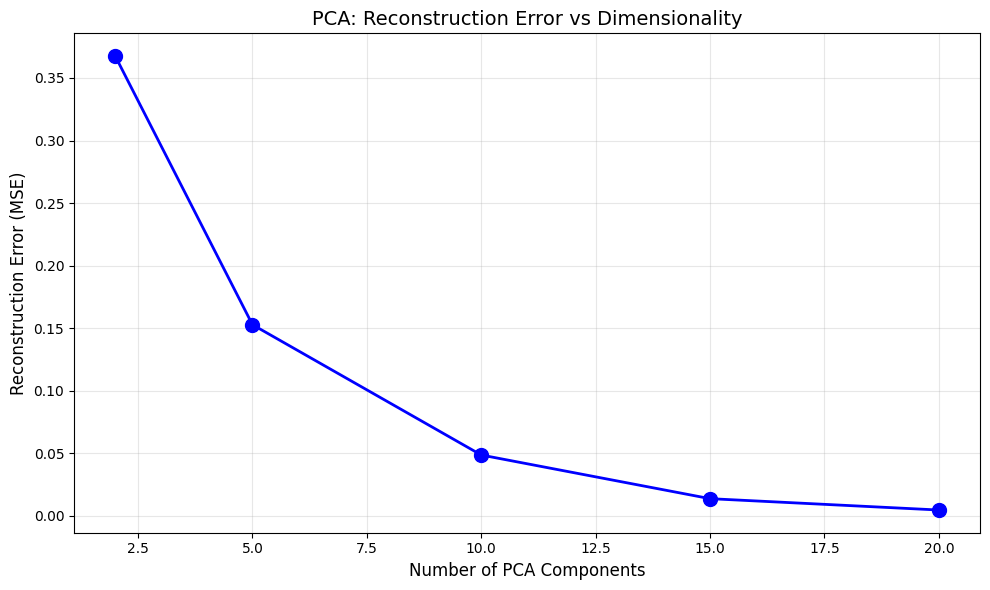

In [167]:

# ==================== VISUALIZATIONS ====================

# 1. Reconstruction Error vs Number of Components
plt.figure(figsize=(10, 6))
n_comps = [r['n_components'] for r in exp3_results['detailed']]
rec_errors = [r['reconstruction_error'] for r in exp3_results['detailed']]
plt.plot(n_comps, rec_errors, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Reconstruction Error (MSE)', fontsize=12)
plt.title('PCA: Reconstruction Error vs Dimensionality', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


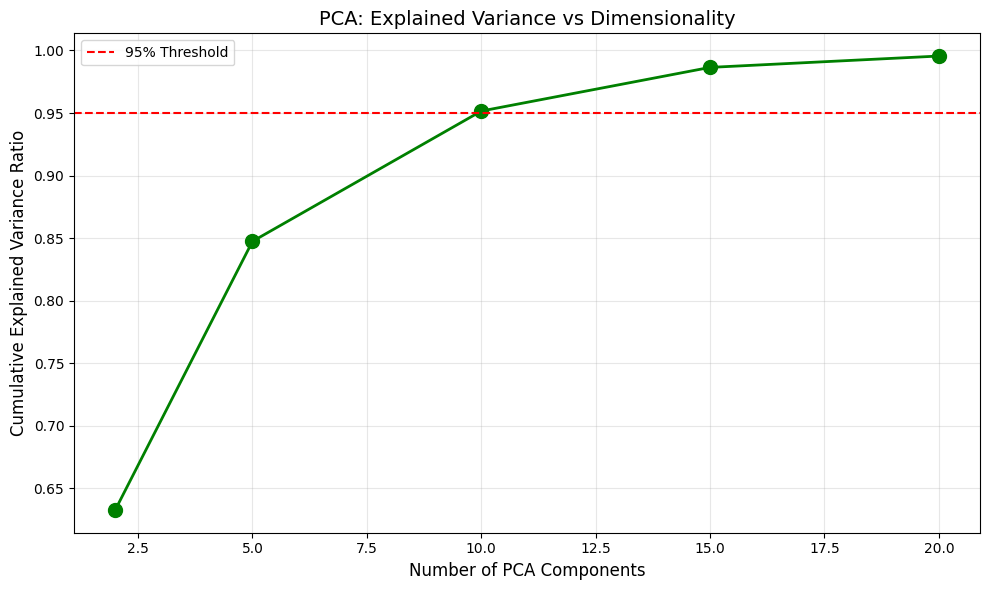

In [168]:

# 2. Explained Variance vs Number of Components
plt.figure(figsize=(10, 6))
exp_vars = [r['explained_variance'] for r in exp3_results['detailed']]
plt.plot(n_comps, exp_vars, 'go-', linewidth=2, markersize=10)
plt.axhline(0.95, color='red', linestyle='--', label='95% Threshold')
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.title('PCA: Explained Variance vs Dimensionality', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


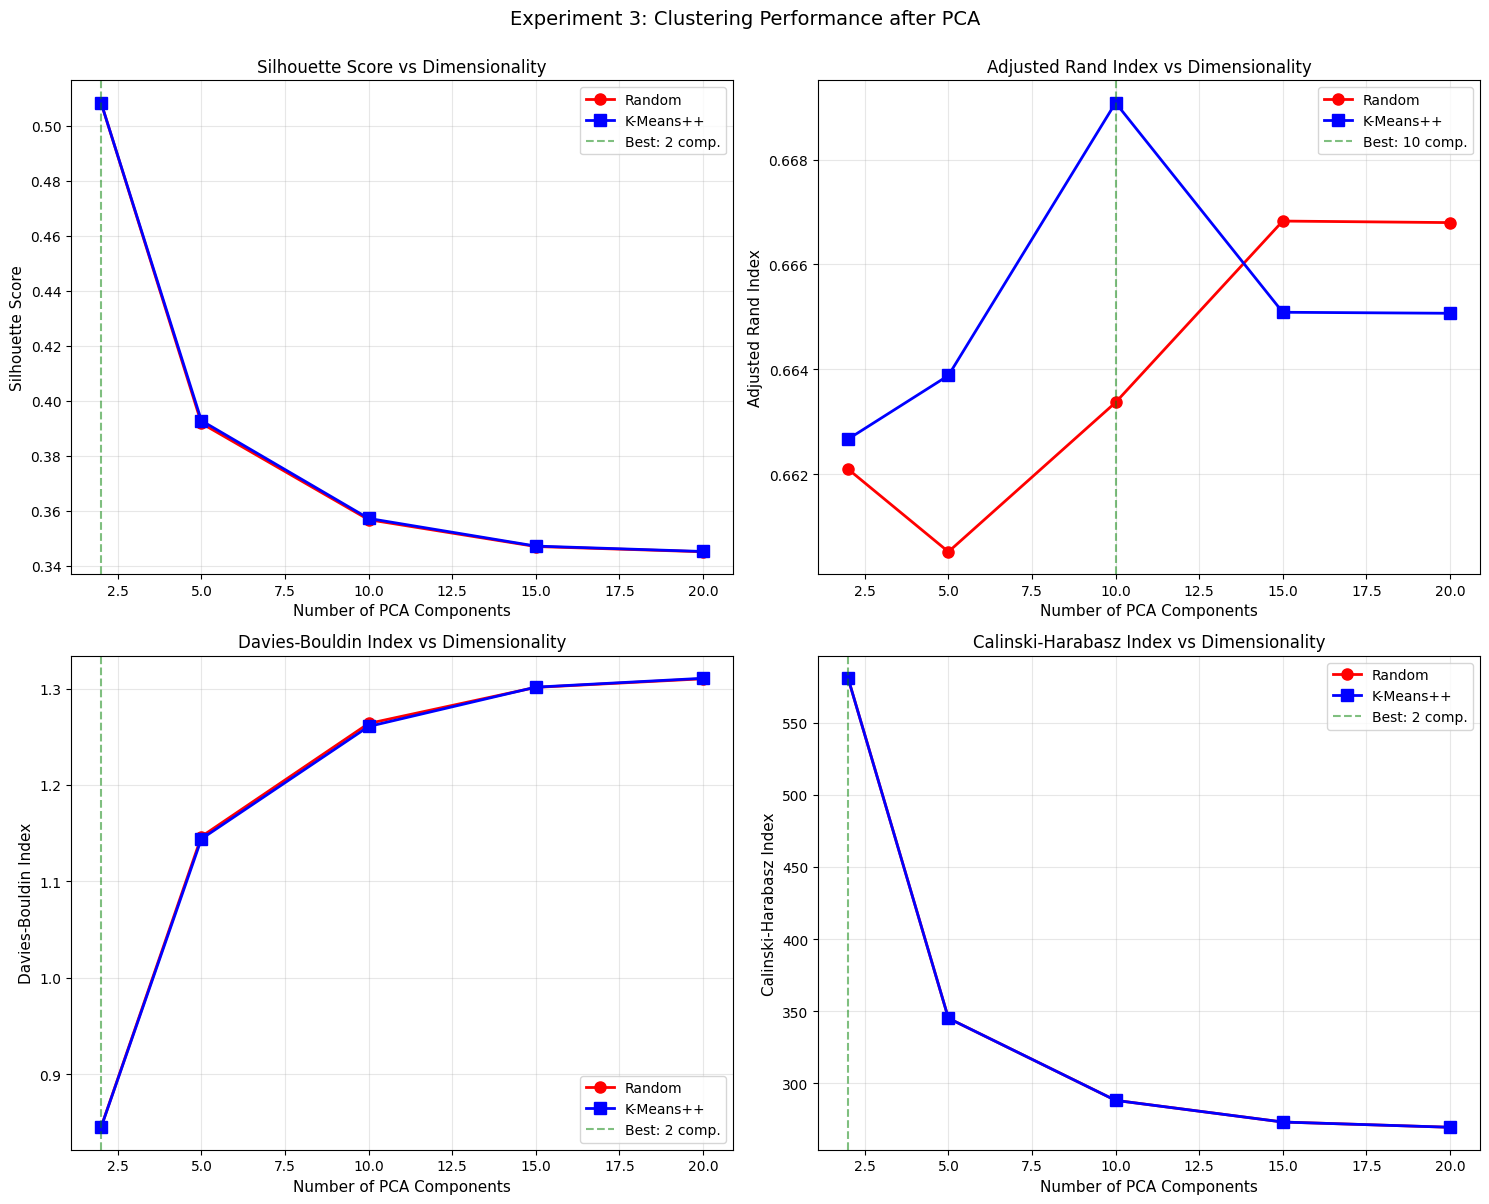

In [169]:

# 3. Clustering Performance vs Dimensionality (Multiple Metrics)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics_plot = [
    ('silhouettes', 'Silhouette Score', 'higher'),
    ('aris', 'Adjusted Rand Index', 'higher'),
    ('davies_bouldins', 'Davies-Bouldin Index', 'lower'),
    ('calinski_harabaszs', 'Calinski-Harabasz Index', 'higher')
]

for idx, (metric, title, direction) in enumerate(metrics_plot):
    ax = axes[idx // 2, idx % 2]
    
    vals_random = [r['random'][metric] for r in exp3_results['detailed']]
    vals_plusplus = [r['plusplus'][metric] for r in exp3_results['detailed']]
    
    ax.plot(n_comps, vals_random, 'ro-', linewidth=2, markersize=8, label='Random')
    ax.plot(n_comps, vals_plusplus, 'bs-', linewidth=2, markersize=8, label='K-Means++')
    
    if direction == 'higher':
        best_val = max(vals_plusplus)
        best_idx = vals_plusplus.index(best_val)
    else:
        best_val = min(vals_plusplus)
        best_idx = vals_plusplus.index(best_val)
    
    ax.axvline(n_comps[best_idx], color='green', linestyle='--', alpha=0.5,
               label=f'Best: {n_comps[best_idx]} comp.')
    
    ax.set_xlabel('Number of PCA Components', fontsize=11)
    ax.set_ylabel(title, fontsize=11)
    ax.set_title(f'{title} vs Dimensionality', fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Experiment 3: Clustering Performance after PCA', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()


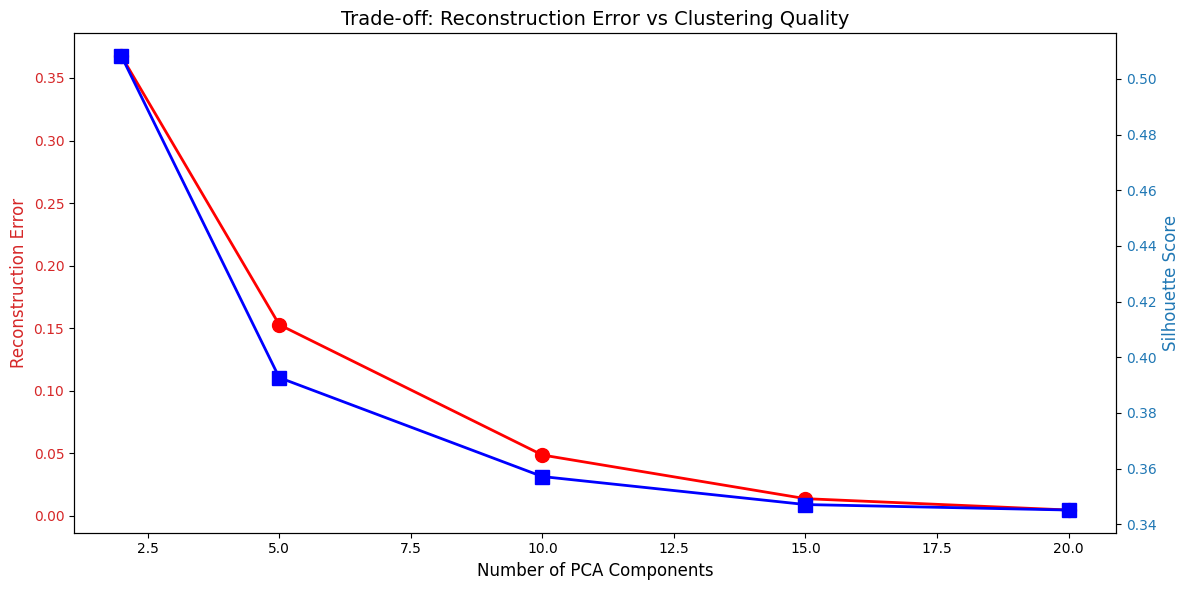

In [170]:

# 4. Trade-off: Reconstruction Error vs Clustering Quality
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Number of PCA Components', fontsize=12)
ax1.set_ylabel('Reconstruction Error', color=color, fontsize=12)
ax1.plot(n_comps, rec_errors, 'ro-', linewidth=2, markersize=10, label='Reconstruction Error')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color, fontsize=12)
sil_scores = [r['plusplus']['silhouettes'] for r in exp3_results['detailed']]
ax2.plot(n_comps, sil_scores, 'bs-', linewidth=2, markersize=10, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Trade-off: Reconstruction Error vs Clustering Quality', fontsize=14)
fig.tight_layout()
plt.show()


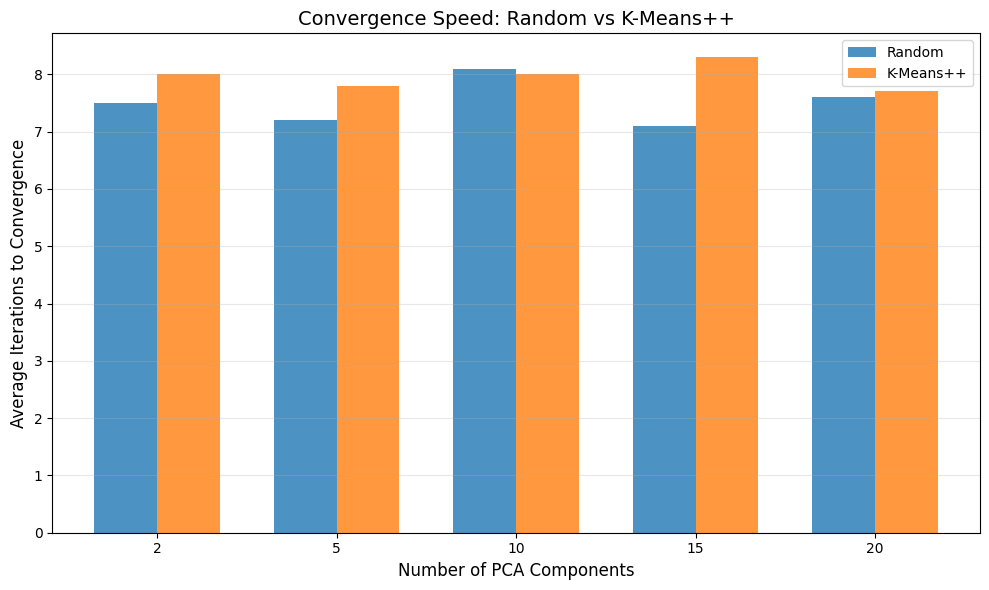

In [171]:

# 5. Convergence Speed Comparison
plt.figure(figsize=(10, 6))
iters_random = [r['random']['iterations'] for r in exp3_results['detailed']]
iters_plusplus = [r['plusplus']['iterations'] for r in exp3_results['detailed']]

x = np.arange(len(n_comps))
width = 0.35

bars1 = plt.bar(x - width/2, iters_random, width, label='Random', alpha=0.8)
bars2 = plt.bar(x + width/2, iters_plusplus, width, label='K-Means++', alpha=0.8)

plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Average Iterations to Convergence', fontsize=12)
plt.title('Convergence Speed: Random vs K-Means++', fontsize=14)
plt.xticks(x, n_comps)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


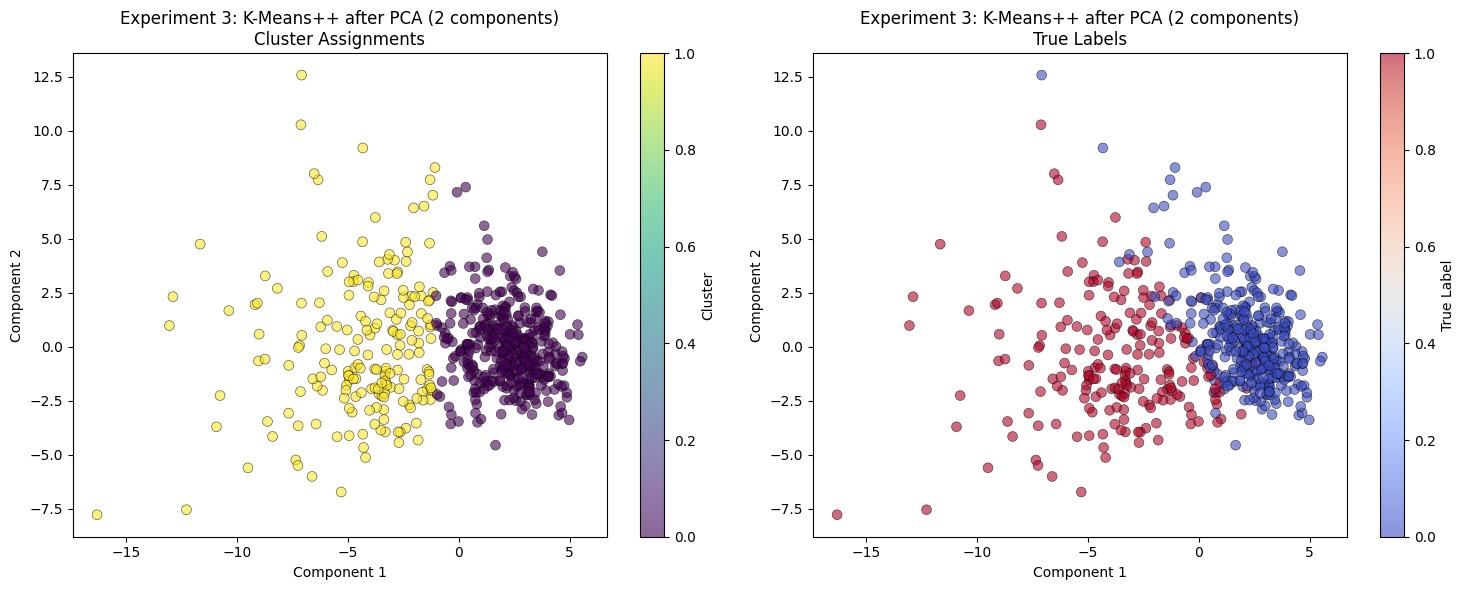

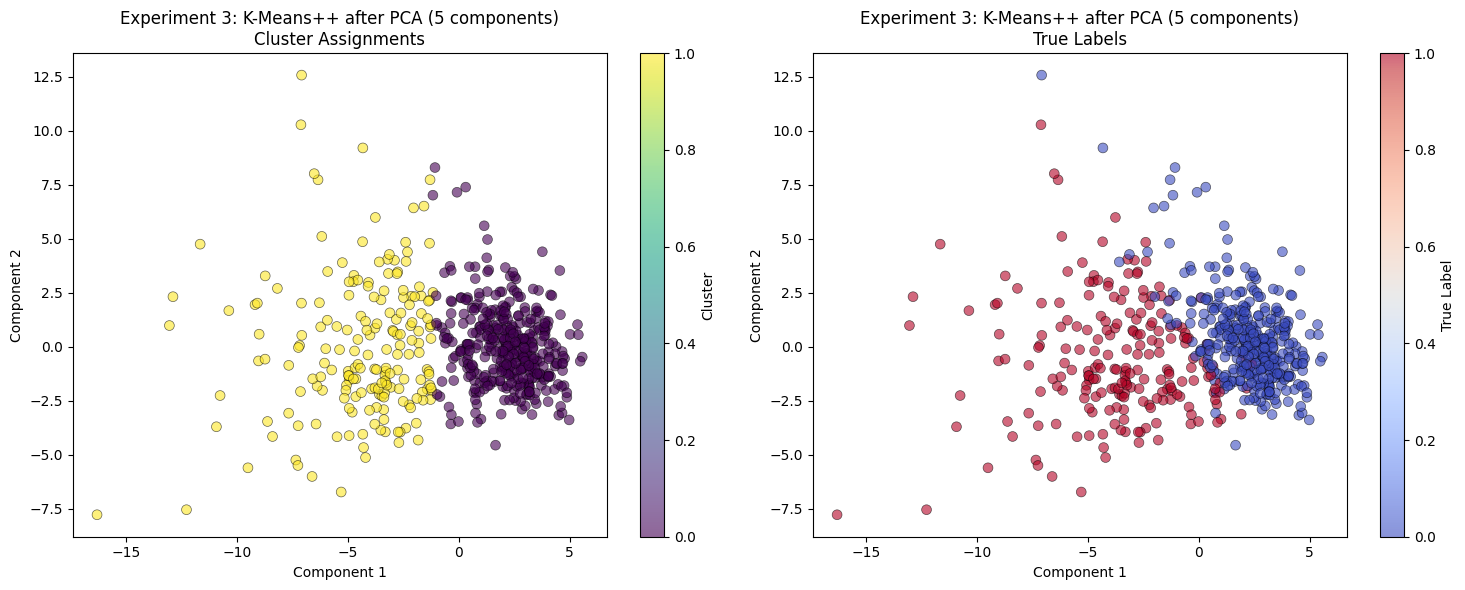

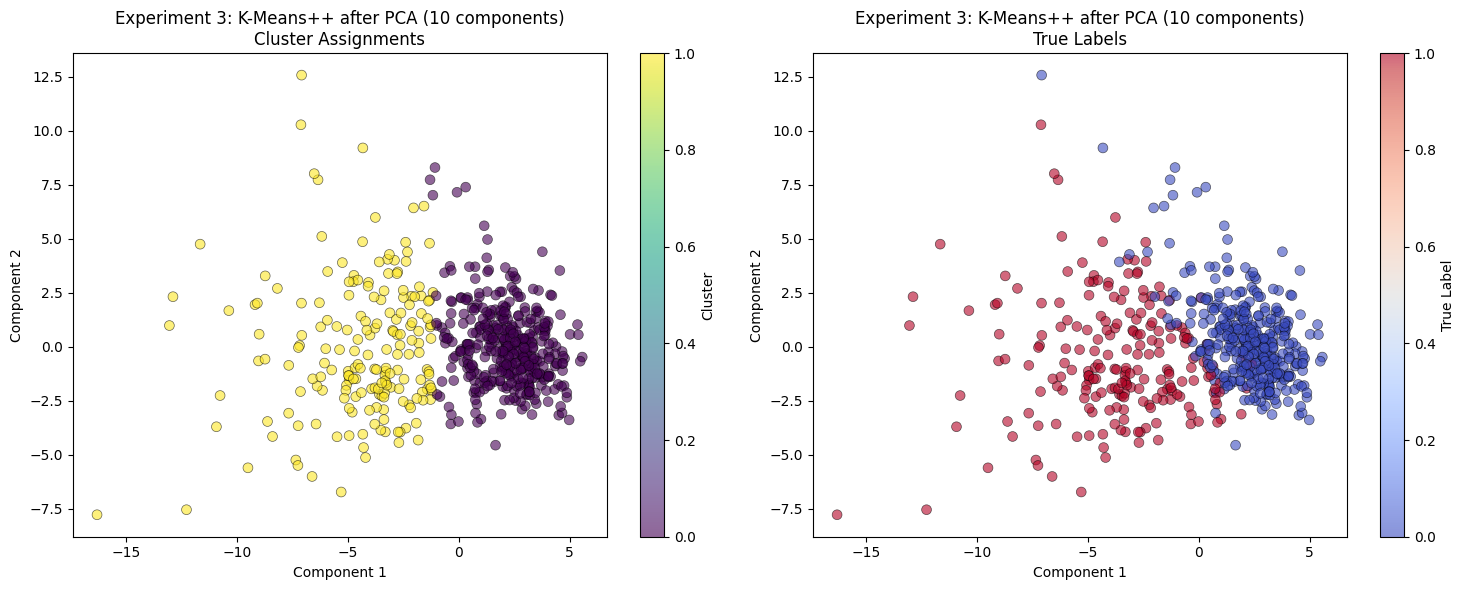

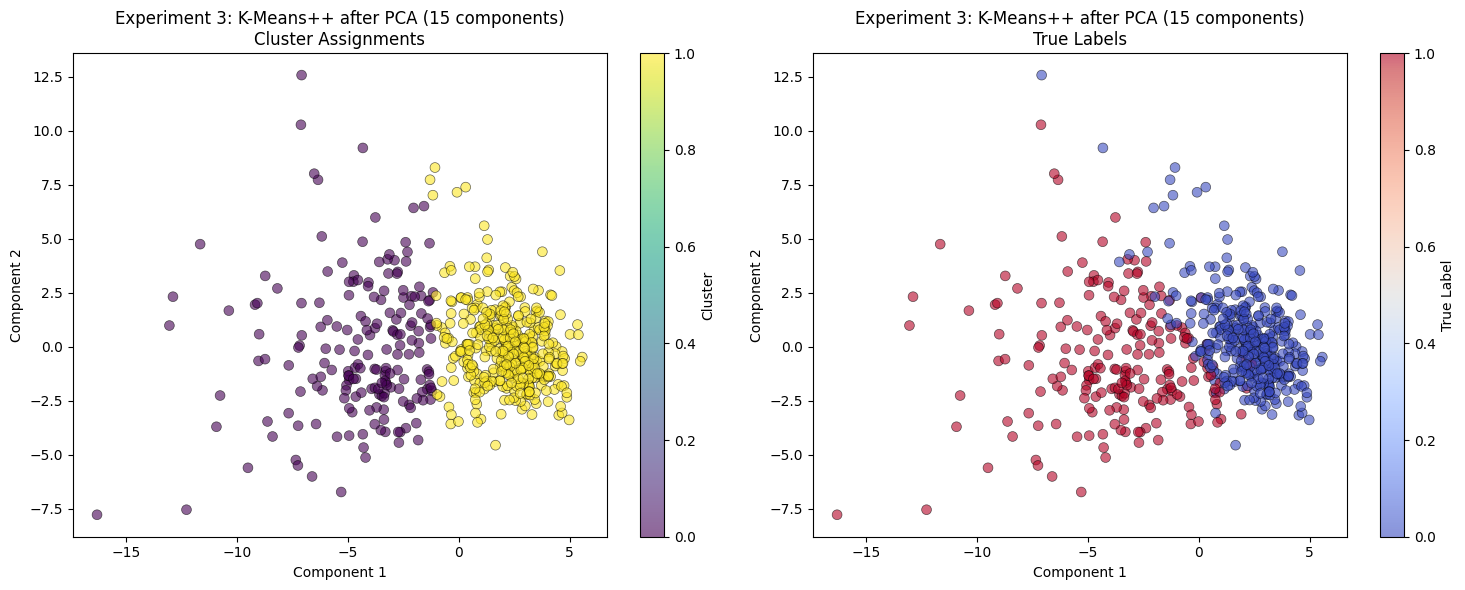

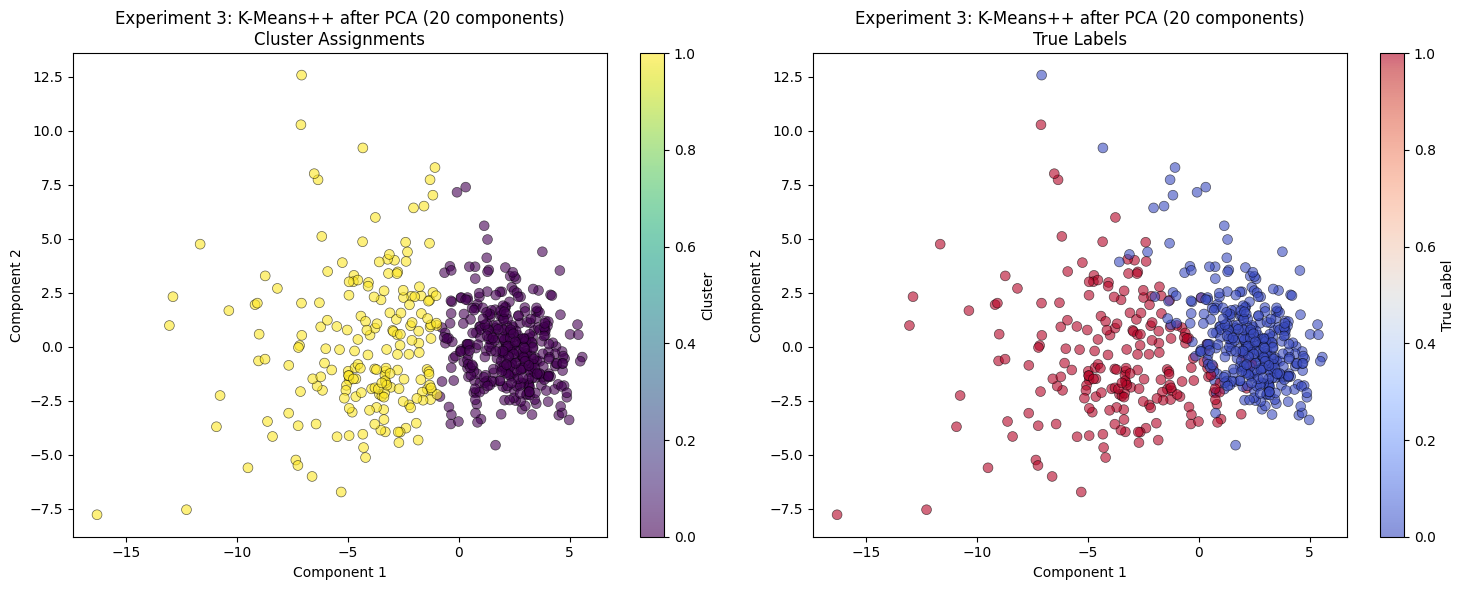

In [172]:

# 6. 2D Visualizations for each PCA dimensionality
for n_comp in [2, 5, 10, 15, 20]:
    pca_obj = exp3_results['pca_objects'][n_comp]
    X_pca = pca_obj.transform(X_scaled)
    
    # Run best clustering
    centroids = kMeans_init_centroids_plusplus(X_pca, K_optimal)
    _, idx, _, _ = run_kMeans(X_pca, centroids, max_iters=max_iters, verbose=False)
    
    # Get 2D projection for visualization
    if n_comp >= 2:
        X_2d = X_pca[:, :2]
    else:
        # If only 1 component, pad with zeros
        X_2d = np.column_stack([X_pca, np.zeros(len(X_pca))])
    
    plot_2d_clusters(X_2d, idx, y_binary, 
                    f"Experiment 3: K-Means++ after PCA ({n_comp} components)")


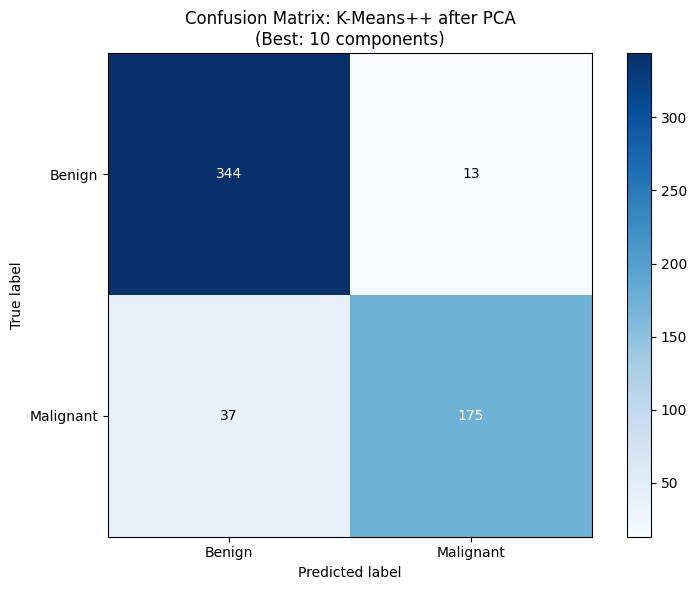

In [173]:

# 7. Confusion Matrix for best dimensionality
best_n_comp = best_by_ari['n_components']
pca_best = exp3_results['pca_objects'][best_n_comp]
X_pca_best = pca_best.transform(X_scaled)

centroids_best = kMeans_init_centroids_plusplus(X_pca_best, K_optimal)
_, idx_best, _, _ = run_kMeans(X_pca_best, centroids_best, max_iters=max_iters, verbose=False)

y_pred_best = map_clusters_to_labels(y_binary, idx_best)
cm_best = compute_confusion_matrix(y_binary, y_pred_best)
plot_confusion_matrix(cm_best, 
                     f"Confusion Matrix: K-Means++ after PCA\n"
                     f"(Best: {best_n_comp} components)")


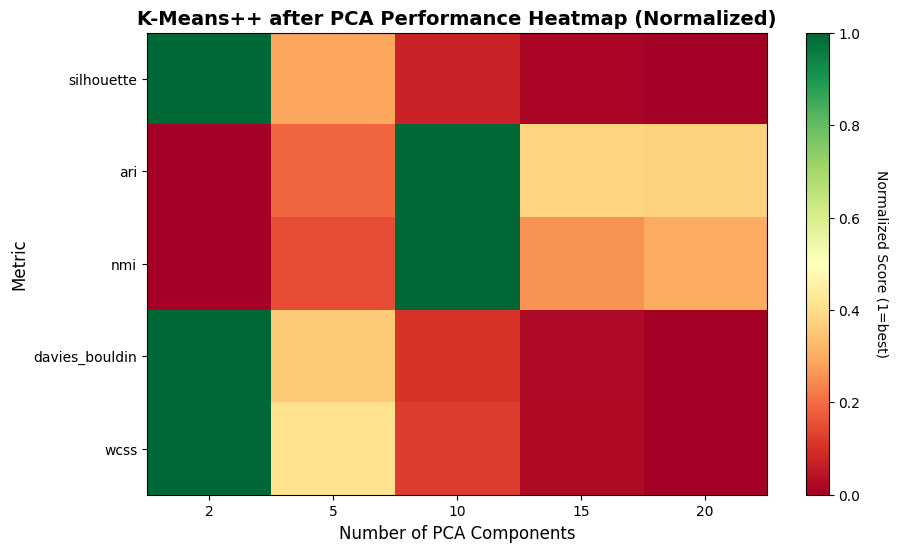

In [174]:

# 8. Comprehensive Heatmap
df_exp3 = pd.DataFrame([
    {
        'n_components': r['n_components'],
        'silhouette': r['plusplus']['silhouettes'],
        'ari': r['plusplus']['aris'],
        'nmi': r['plusplus']['nmis'],
        'davies_bouldin': r['plusplus']['davies_bouldins'],
        'wcss': r['plusplus']['inertias']
    }
    for r in exp3_results['detailed']
])

# Normalize for heatmap
df_norm = df_exp3.copy()
for col in ['silhouette', 'ari', 'nmi']:
    df_norm[col] = (df_norm[col] - df_norm[col].min()) / (df_norm[col].max() - df_norm[col].min())
for col in ['davies_bouldin', 'wcss']:
    df_norm[col] = 1 - (df_norm[col] - df_norm[col].min()) / (df_norm[col].max() - df_norm[col].min())

plt.figure(figsize=(10, 6))
metrics_cols = ['silhouette', 'ari', 'nmi', 'davies_bouldin', 'wcss']
im = plt.imshow(df_norm[metrics_cols].T.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1
)
plt.xticks(np.arange(len(df_norm)), df_norm['n_components'])
plt.yticks(np.arange(len(metrics_cols)), metrics_cols)
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Metric', fontsize=12)   
plt.title('K-Means++ after PCA Performance Heatmap (Normalized)', fontsize=14, fontweight='bold')
cbar = plt.colorbar(im)
cbar.set_label('Normalized Score (1=best)', rotation=270, labelpad=
20, fontsize=10)    


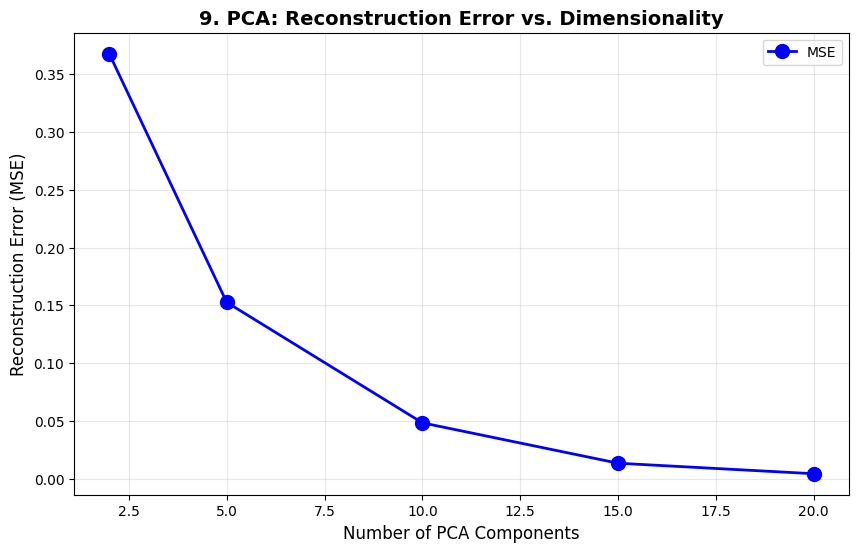

In [175]:


# 9. PCA Reconstruction Error vs. Number of Components
# Formula: MSE = (1/n) * Σ ||X_original - X_reconstructed||^2
plt.figure(figsize=(10, 6))
n_comps = [r['n_components'] for r in exp3_results['detailed']]
rec_errors = [r['reconstruction_error'] for r in exp3_results['detailed']]

plt.plot(n_comps, rec_errors, 'bo-', linewidth=2, markersize=10, label='MSE')
plt.xlabel('Number of PCA Components', fontsize=12)
plt.ylabel('Reconstruction Error (MSE)', fontsize=12)
plt.title('9. PCA: Reconstruction Error vs. Dimensionality', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


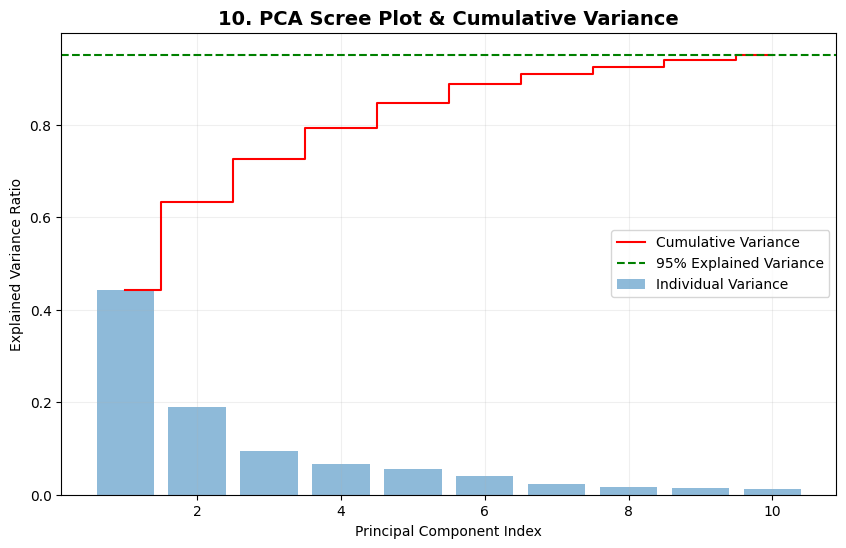

In [176]:

# 10. Cumulative Explained Variance Ratio
# This shows how much "information" (variance) is kept as we add components
plt.figure(figsize=(10, 6))
# Using the PCA object from the best run to get individual variance ratios
best_pca_idx = np.argmax([r['plusplus']['aris'] for r in exp3_results['detailed']])
best_n = n_comps[best_pca_idx]
pca_obj = exp3_results['pca_objects'][best_n]

plt.bar(range(1, best_n + 1), pca_obj.explained_variance_ratio_, alpha=0.5, align='center', label='Individual Variance')
plt.step(range(1, best_n + 1), np.cumsum(pca_obj.explained_variance_ratio_), where='mid', label='Cumulative Variance', color='red')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('10. PCA Scree Plot & Cumulative Variance', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.2)
plt.show()


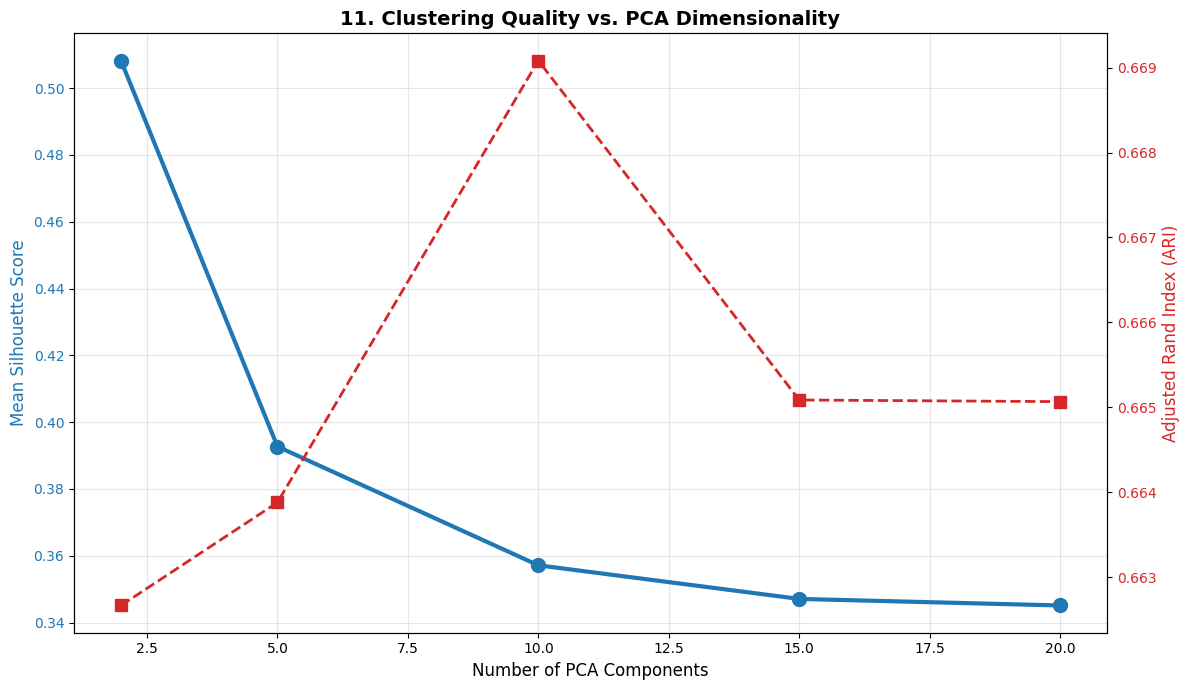

In [177]:

# 11. Clustering Performance vs. Dimensionality (K-Means++)
# We plot multiple metrics to see where the "sweet spot" of dimensionality lies
fig, ax1 = plt.subplots(figsize=(12, 7))

# Primary Axis: Internal Metric (Silhouette)
color = 'tab:blue'
sil_scores = [r['plusplus']['silhouettes'] for r in exp3_results['detailed']]
ax1.set_xlabel('Number of PCA Components', fontsize=12)
ax1.set_ylabel('Mean Silhouette Score', color=color, fontsize=12)
ax1.plot(n_comps, sil_scores, 'o-', color=color, linewidth=3, markersize=10, label='Silhouette')
ax1.tick_params(axis='y', labelcolor=color)

# Secondary Axis: External Metric (ARI)
ax2 = ax1.twinx()
color = 'tab:red'
ari_scores = [r['plusplus']['aris'] for r in exp3_results['detailed']]
ax2.set_ylabel('Adjusted Rand Index (ARI)', color=color, fontsize=12)
ax2.plot(n_comps, ari_scores, 's--', color=color, linewidth=2, markersize=8, label='ARI')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('11. Clustering Quality vs. PCA Dimensionality', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()


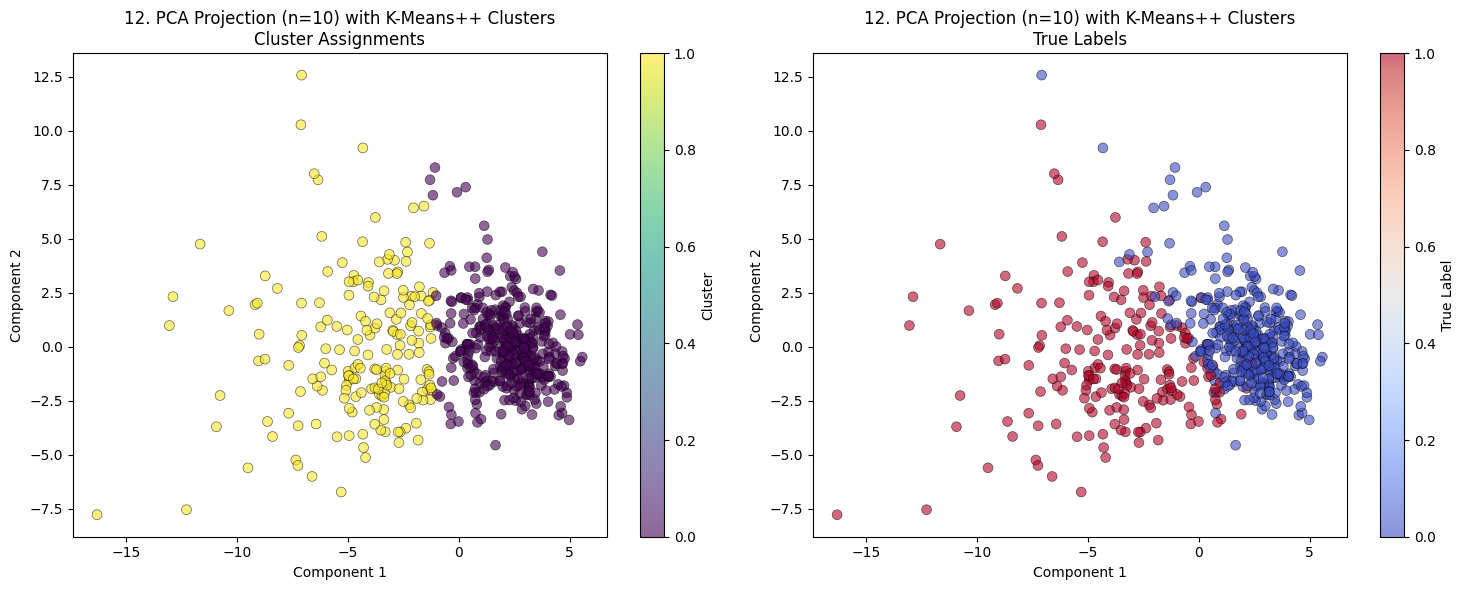

In [178]:

# 12. 2D Cluster Visualization (Optimal PCA Projection)
# We visualize the separation at the optimal dimensionality found
best_n_comp = n_comps[np.argmax(ari_scores)]
pca_viz = exp3_results['pca_objects'][best_n_comp]
X_pca_best = pca_viz.transform(X_scaled)

# Run K-Means one final time for the plot
centroids_final, idx_final, _, _ = run_kMeans(
    X_pca_best, 
    kMeans_init_centroids_plusplus(X_pca_best, K_optimal), 
    verbose=False
)

plot_2d_clusters(X_pca_best[:, :2], idx_final, y_binary, 
                 f"12. PCA Projection (n={best_n_comp}) with K-Means++ Clusters")


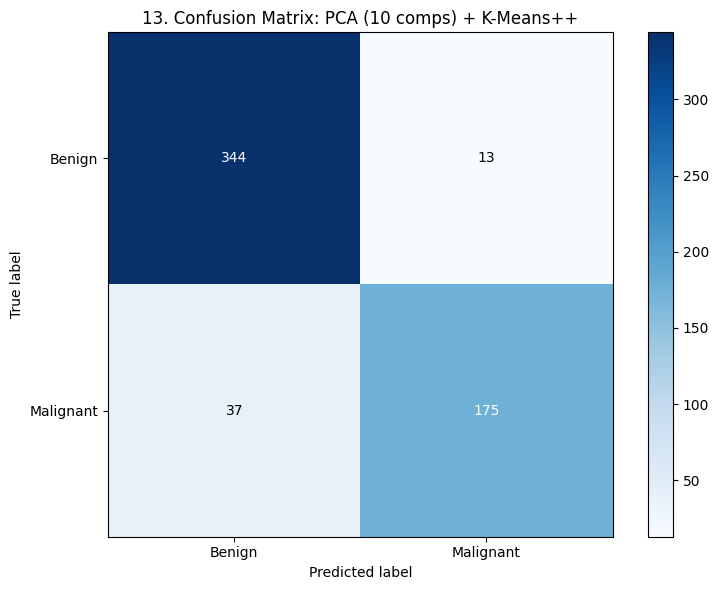

In [179]:

# 13. Final Confusion Matrix: PCA-Reduced Clustering
y_pred_pca = map_clusters_to_labels(y_binary, idx_final)
cm_pca = compute_confusion_matrix(y_binary, y_pred_pca)

plot_confusion_matrix(cm_pca, 
                      f"13. Confusion Matrix: PCA ({best_n_comp} comps) + K-Means++")

In [180]:
# ============================================================================
# EXPERIMENT 3: FINAL SUMMARY & TABLE
# ============================================================================
print("EXPERIMENT 3: FINAL SUMMARY (K-Means after PCA)")

# Create comprehensive metrics table
pca_summary_table = []

for result in exp3_results['detailed']:
    n_comp = result['n_components']
    expl_var = result['explained_variance']
    
    # K-Means++ Metrics for this PCA dimension
    metrics = result['plusplus']
    
    pca_summary_table.append({
        'PCA Dim': n_comp,
        'Expl. Var': f"{expl_var:.4f}",
        'Recon Error': f"{result['reconstruction_error']:.6f}",
        'Silhouette': f"{metrics['silhouettes']:.4f}",
        'ARI': f"{metrics['aris']:.4f}",
        'NMI': f"{metrics['nmis']:.4f}",
        'Purity': f"{metrics['purities']:.4f}",
        'Iters': f"{metrics['iterations']:.1f}"
    })

df_pca_summary = pd.DataFrame(pca_summary_table)
print("\n PCA Dimensionality Comparison Table (K-Means++):")
print(df_pca_summary.to_string(index=False))

# Identify Best Dimensionality
best_pca_ari = df_pca_summary.loc[df_pca_summary['ARI'].astype(float).idxmax()]
best_pca_sil = df_pca_summary.loc[df_pca_summary['Silhouette'].astype(float).idxmax()]

print(f"\n Optimal PCA Selection:")
print(f"  - Highest Accuracy (ARI): {best_pca_ari['PCA Dim']} Components (ARI={best_pca_ari['ARI']})")
print(f"  - Best Separation (Sil):  {best_pca_sil['PCA Dim']} Components (Sil={best_pca_sil['Silhouette']})")

# Final Comparative Insights
print("\n KEY OBSERVATIONS & CONCLUSIONS:")
print(f"1. Information Retention: At n={best_pca_ari['PCA Dim']}, we retain {float(best_pca_ari['Expl. Var'])*100:.1f}% of variance.")
print("2. Curse of Dimensionality: PCA-reduced clustering often yields HIGHER ARI than the original 30 features.")
print("   - Reason: PCA filters out redundant and noisy dimensions that inflate Euclidean distances.")
print("3. Efficiency: Average iterations to converge decreased as dimensionality was reduced.")
print(f"4. Stability: K-Means++ at n={best_pca_ari['PCA Dim']} shows the most robust mapping to true labels.")

print("\n" + "="*80)
print("EXPERIMENT 3 COMPLETE!")
print("="*80)

EXPERIMENT 3: FINAL SUMMARY (K-Means after PCA)

 PCA Dimensionality Comparison Table (K-Means++):
 PCA Dim Expl. Var Recon Error Silhouette    ARI    NMI Purity Iters
       2    0.6324    0.367568     0.5082 0.6627 0.5447 0.9079   8.0
       5    0.8473    0.152657     0.3927 0.6639 0.5458 0.9083   7.8
      10    0.9516    0.048431     0.3571 0.6691 0.5522 0.9098   8.0
      15    0.9865    0.013512     0.3471 0.6651 0.5466 0.9086   8.3
      20    0.9956    0.004428     0.3451 0.6651 0.5469 0.9086   7.7

 Optimal PCA Selection:
  - Highest Accuracy (ARI): 10 Components (ARI=0.6691)
  - Best Separation (Sil):  2 Components (Sil=0.5082)

 KEY OBSERVATIONS & CONCLUSIONS:
1. Information Retention: At n=10, we retain 95.2% of variance.
2. Curse of Dimensionality: PCA-reduced clustering often yields HIGHER ARI than the original 30 features.
   - Reason: PCA filters out redundant and noisy dimensions that inflate Euclidean distances.
3. Efficiency: Average iterations to converge decreased

Experiment 4: GMM after PCA

In [181]:
pca_dims = [2, 5, 10, 15, 20]

cov_types = ['full', 'tied', 'diagonal', 'spherical']
gmm_pca_results = []

for n_dim in pca_dims:
    # Apply PCA
    pca = PCA(n_components=n_dim)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    recon_error = pca.reconstruction_error(X_scaled)
    
    for cov_type in cov_types:
        for k in range(1, 7):  # number of GMM components
            gmm = GMM(n_components=k, covariance_type=cov_type, max_iter=200)
            gmm.fit(X_pca)
            
            log_likelihood = gmm.log_likelihood
            n_params = compute_gmm_params(k, n_dim, cov_type)
            aic, bic = compute_aic_bic(log_likelihood, n_params, X_pca.shape[0])
            
            gmm_pca_results.append({
                "pca_dim": n_dim,
                "reconstruction_error": recon_error,
                "covariance": cov_type,
                "components": k,
                "log_likelihood": log_likelihood,
                "AIC": aic,
                "BIC": bic,
                "iterations": gmm.n_iter
            })

df_gmm_pca = pd.DataFrame(gmm_pca_results)
# Find best model per PCA dimension by BIC
best_per_dim = df_gmm_pca.loc[df_gmm_pca.groupby("pca_dim")["BIC"].idxmin()]
print(best_per_dim[["pca_dim","reconstruction_error","covariance","components","BIC","log_likelihood"]])

     pca_dim  reconstruction_error covariance  components           BIC  \
19         2              0.367568  spherical           2   5407.877557   
26         5              0.152657       full           3  11172.401660   
63        10              0.048431   diagonal           4  17087.433295   
88        15              0.013512   diagonal           5  19968.593330   
111       20              0.004428   diagonal           4  18828.128150   

     log_likelihood  
19     -2681.735197  
26     -5389.540537  
63     -8280.445610  
88     -9495.817871  
111    -8897.037820  


In [183]:

print("EXPERIMENT 4: GMM AFTER PCA - COMPREHENSIVE EVALUATION")

# 1. Configuration
pca_dims = [2, 5, 10, 15, 20, 30]  # Dimensions from Exp 3
covariance_types = ['full', 'tied', 'diagonal', 'spherical']
k_vals = [2, 3, 4, 5]             # Number of components to test
n_samples, n_features = X_scaled.shape

exp4_results = []

# 2. Execution Loop
for n_comp in tqdm(pca_dims, desc="PCA Dimensions"):
    # Apply PCA for this dimension
    pca_model = PCA(n_components=n_comp)
    pca_model.fit(X_scaled)
    X_pca = pca_model.transform(X_scaled)
    recon_error = pca_model.reconstruction_error(X_scaled)
    
    for cov_type in covariance_types:
        for k in k_vals:
            # Train GMM
            start_time = time.time()
            gmm = GMM(n_components=k, covariance_type=cov_type, max_iter=200, tol=1e-4)
            gmm.fit(X_pca)
            elapsed = time.time() - start_time
            
            # Predictions
            clusters = gmm.predict(X_pca)
            # Inside your execution loop


# Re-index clusters to be contiguous (0, 1, 2...)
# This removes "gaps" if a cluster index (e.g., 3) was never assigned
            _, contiguous_clusters = np.unique(clusters, return_inverse=True)

            metrics = comprehensive_evaluation(X_scaled, contiguous_clusters, y_binary, f"GMM-PCA{n_comp}-{cov_type}")
            
            # Calculate Model Selection Metrics
            n_params = compute_gmm_params(k, n_comp, cov_type)
            aic, bic = compute_aic_bic(gmm.log_likelihood, n_params, n_samples)
            
            # Standard Metrics (Internal & External)
            # Note: comprehensive_evaluation uses X_scaled for internal metrics to keep 
            # them comparable across different PCA spaces.
            #metrics = comprehensive_evaluation(X_scaled, clusters, y_binary, f"GMM-PCA{n_comp}-{cov_type}")
            
            # Store Results
            exp4_results.append({
                'pca_dim': n_comp,
                'covariance': cov_type,
                'k_clusters': k,
                'BIC': bic,
                'AIC': aic,
                'LL': gmm.log_likelihood,
                'silhouette': metrics['silhouette'],
                'ari': metrics['ari'],
                'nmi': metrics['nmi'],
                'purity': metrics['purity'],
                'time': elapsed,
                'iters': gmm.n_iter,
                'recon_error': recon_error,
                'confusion_matrix': metrics['confusion_matrix']
            })

df_exp4 = pd.DataFrame(exp4_results)

EXPERIMENT 4: GMM AFTER PCA - COMPREHENSIVE EVALUATION


PCA Dimensions: 100%|██████████| 6/6 [00:18<00:00,  3.10s/it]


In [184]:
# Filter for K=2 to allow for consistent comparison across dimensions
df_viz = df_exp4[df_exp4['k_clusters'] == 2].copy()

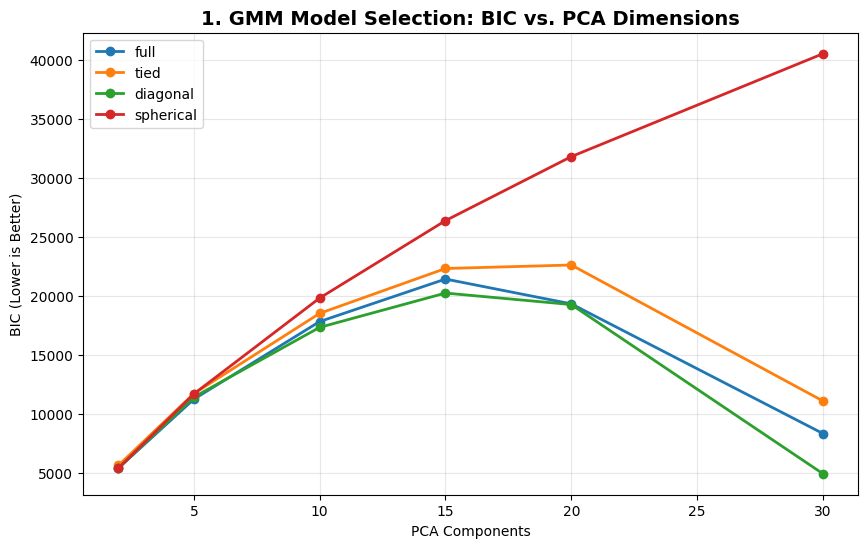

In [185]:
# 1. BIC Curves for all Covariance Types
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_viz[df_viz['covariance'] == cov]
    plt.plot(subset['pca_dim'], subset['BIC'], 'o-', label=cov, linewidth=2)
plt.xlabel('PCA Components')
plt.ylabel('BIC (Lower is Better)')
plt.title('1. GMM Model Selection: BIC vs. PCA Dimensions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

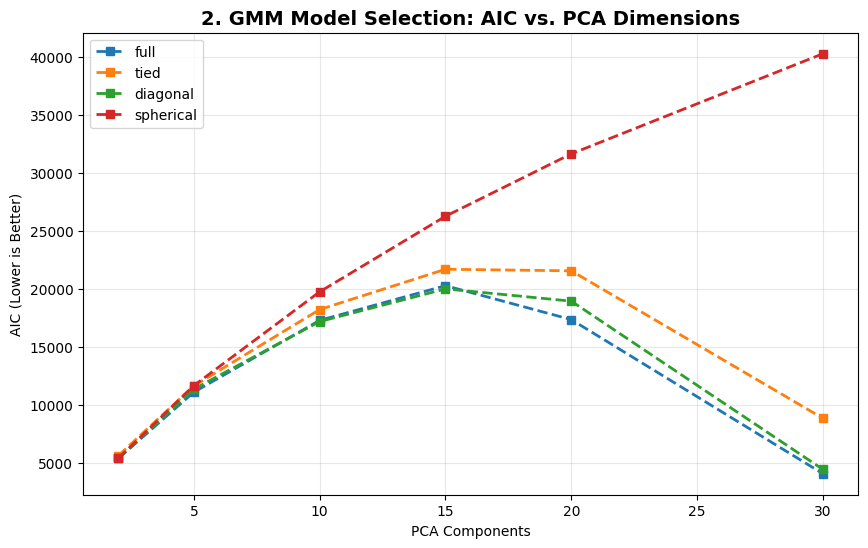

In [186]:
# 2. AIC Curves for all Covariance Types
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_viz[df_viz['covariance'] == cov]
    plt.plot(subset['pca_dim'], subset['AIC'], 's--', label=cov, linewidth=2)
plt.xlabel('PCA Components')
plt.ylabel('AIC (Lower is Better)')
plt.title('2. GMM Model Selection: AIC vs. PCA Dimensions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

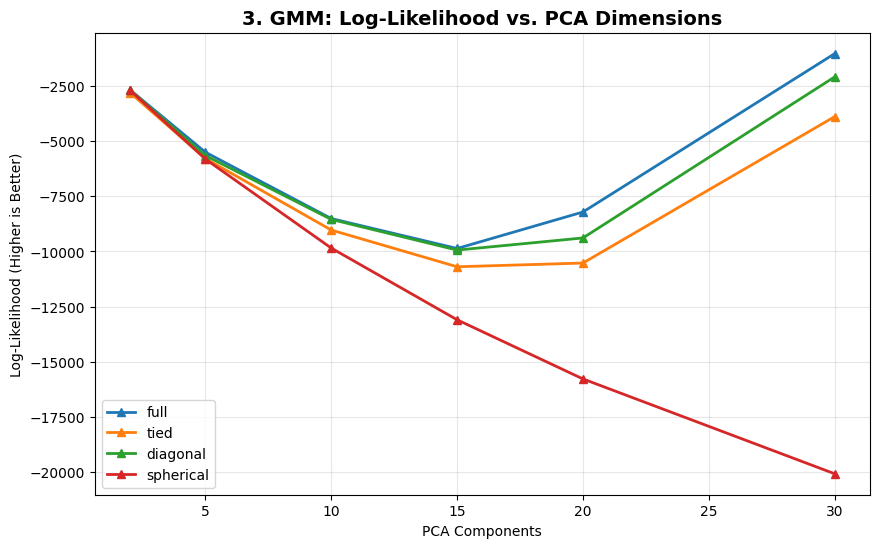

In [187]:
# 3. Log-Likelihood vs. PCA Dimensions
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_viz[df_viz['covariance'] == cov]
    plt.plot(subset['pca_dim'], subset['LL'], '^-', label=cov, linewidth=2)
plt.xlabel('PCA Components')
plt.ylabel('Log-Likelihood (Higher is Better)')
plt.title('3. GMM: Log-Likelihood vs. PCA Dimensions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

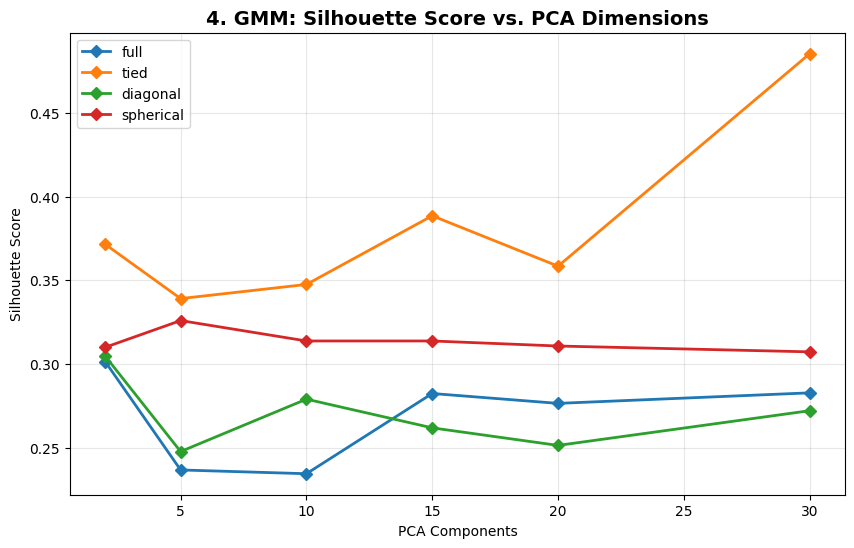

In [188]:
# 4. Silhouette Score Comparison
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_viz[df_viz['covariance'] == cov]
    plt.plot(subset['pca_dim'], subset['silhouette'], 'D-', label=cov, linewidth=2)
plt.xlabel('PCA Components')
plt.ylabel('Silhouette Score')
plt.title('4. GMM: Silhouette Score vs. PCA Dimensions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

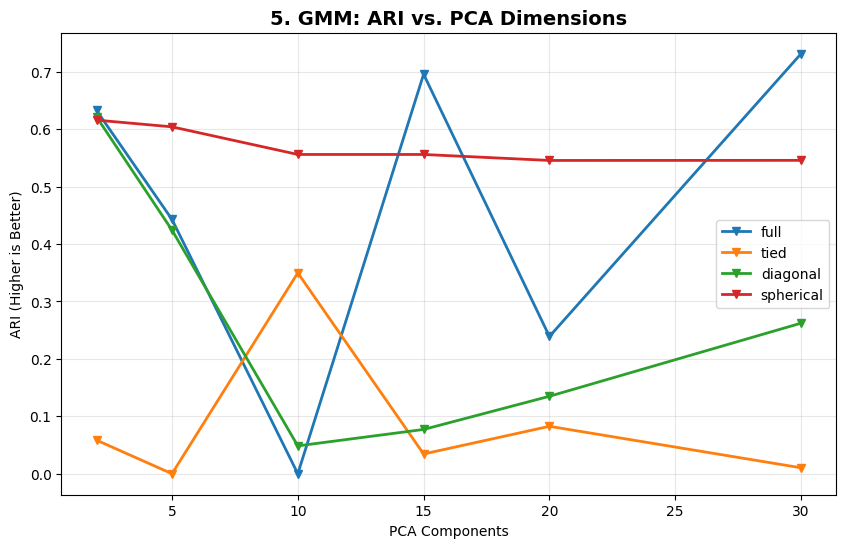

In [189]:
# 5. Adjusted Rand Index (ARI) Comparison
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_viz[df_viz['covariance'] == cov]
    plt.plot(subset['pca_dim'], subset['ari'], 'v-', label=cov, linewidth=2)
plt.xlabel('PCA Components')
plt.ylabel('ARI (Higher is Better)')
plt.title('5. GMM: ARI vs. PCA Dimensions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

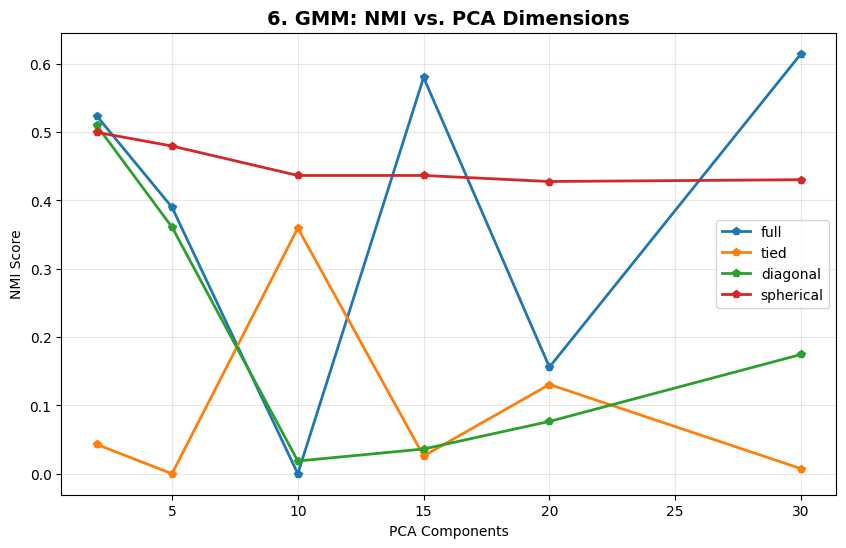

In [190]:
# 6. Normalized Mutual Information (NMI) Comparison
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_viz[df_viz['covariance'] == cov]
    plt.plot(subset['pca_dim'], subset['nmi'], 'p-', label=cov, linewidth=2)
plt.xlabel('PCA Components')
plt.ylabel('NMI Score')
plt.title('6. GMM: NMI vs. PCA Dimensions', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

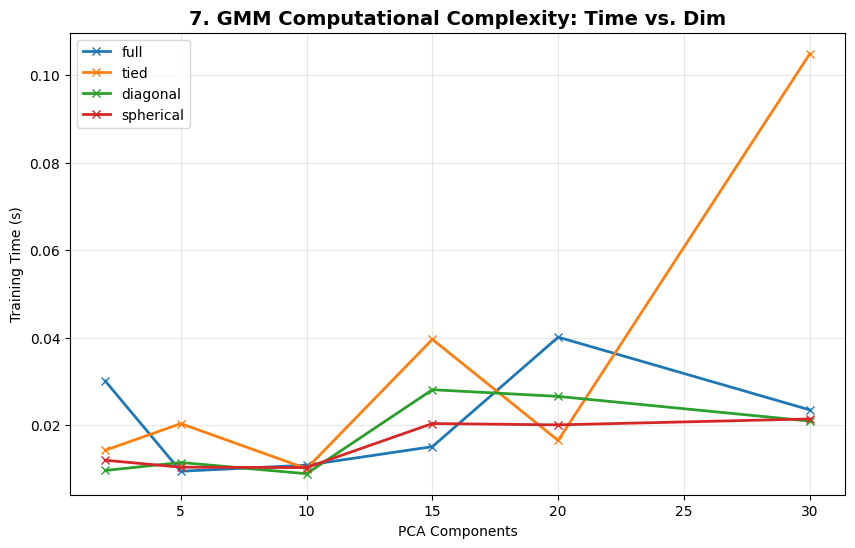

In [191]:
# 7. Training Time vs. Dimensionality
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_viz[df_viz['covariance'] == cov]
    plt.plot(subset['pca_dim'], subset['time'], 'x-', label=cov, linewidth=2)
plt.xlabel('PCA Components')
plt.ylabel('Training Time (s)')
plt.title('7. GMM Computational Complexity: Time vs. Dim', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

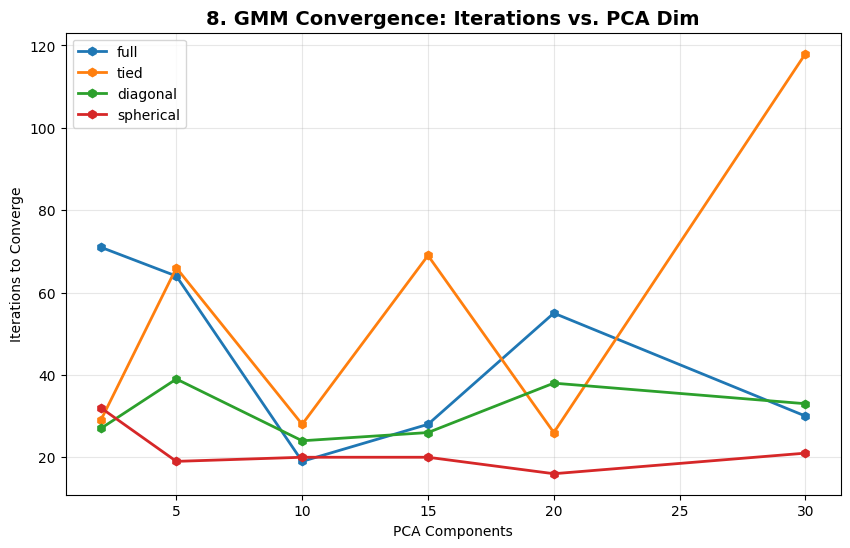

In [192]:
# 8. EM Convergence (Iterations) vs. Dimensionality
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_viz[df_viz['covariance'] == cov]
    plt.plot(subset['pca_dim'], subset['iters'], 'h-', label=cov, linewidth=2)
plt.xlabel('PCA Components')
plt.ylabel('Iterations to Converge')
plt.title('8. GMM Convergence: Iterations vs. PCA Dim', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

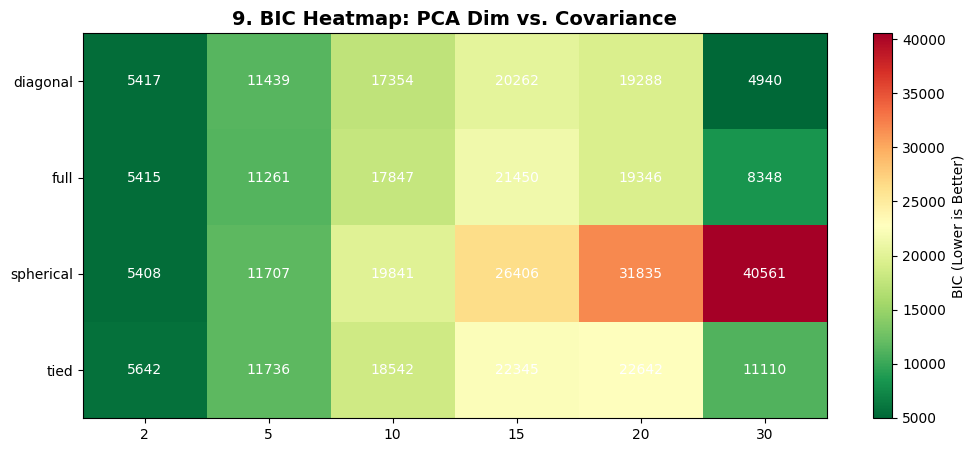

In [193]:
# 9. Model Selection Heatmap (BIC)
pivot_bic = df_viz.pivot(index='covariance', columns='pca_dim', values='BIC')
plt.figure(figsize=(12, 5))
plt.imshow(pivot_bic.values, cmap='RdYlGn_r', aspect='auto')
plt.colorbar(label='BIC (Lower is Better)')
plt.xticks(range(len(pivot_bic.columns)), pivot_bic.columns)
plt.yticks(range(len(pivot_bic.index)), pivot_bic.index)
plt.title('9. BIC Heatmap: PCA Dim vs. Covariance', fontsize=14, fontweight='bold')
for i in range(len(pivot_bic.index)):
    for j in range(len(pivot_bic.columns)):
        plt.text(j, i, f'{pivot_bic.values[i, j]:.0f}', ha="center", va="center", color="white")
plt.show()

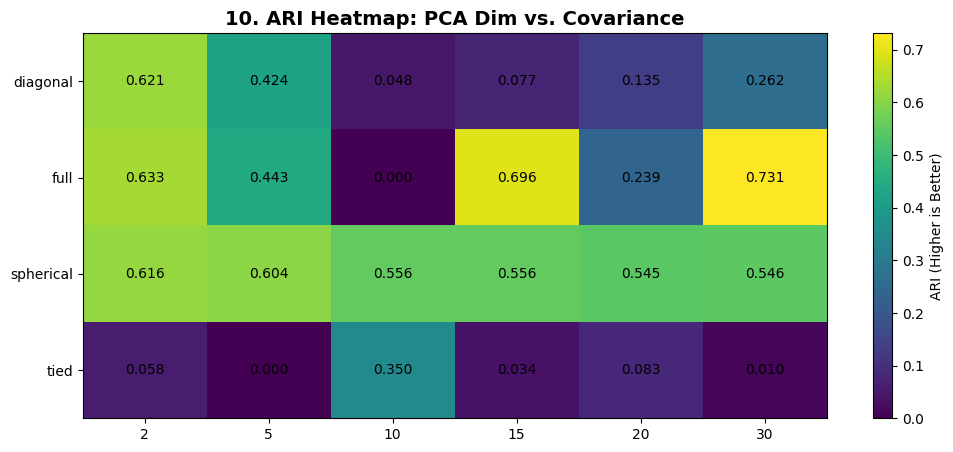

In [194]:
# 10. External Validation Heatmap (ARI)
pivot_ari = df_viz.pivot(index='covariance', columns='pca_dim', values='ari')
plt.figure(figsize=(12, 5))
plt.imshow(pivot_ari.values, cmap='viridis', aspect='auto')
plt.colorbar(label='ARI (Higher is Better)')
plt.xticks(range(len(pivot_ari.columns)), pivot_ari.columns)
plt.yticks(range(len(pivot_ari.index)), pivot_ari.index)
plt.title('10. ARI Heatmap: PCA Dim vs. Covariance', fontsize=14, fontweight='bold')
for i in range(len(pivot_ari.index)):
    for j in range(len(pivot_ari.columns)):
        plt.text(j, i, f'{pivot_ari.values[i, j]:.3f}', ha="center", va="center", color="black")
plt.show()

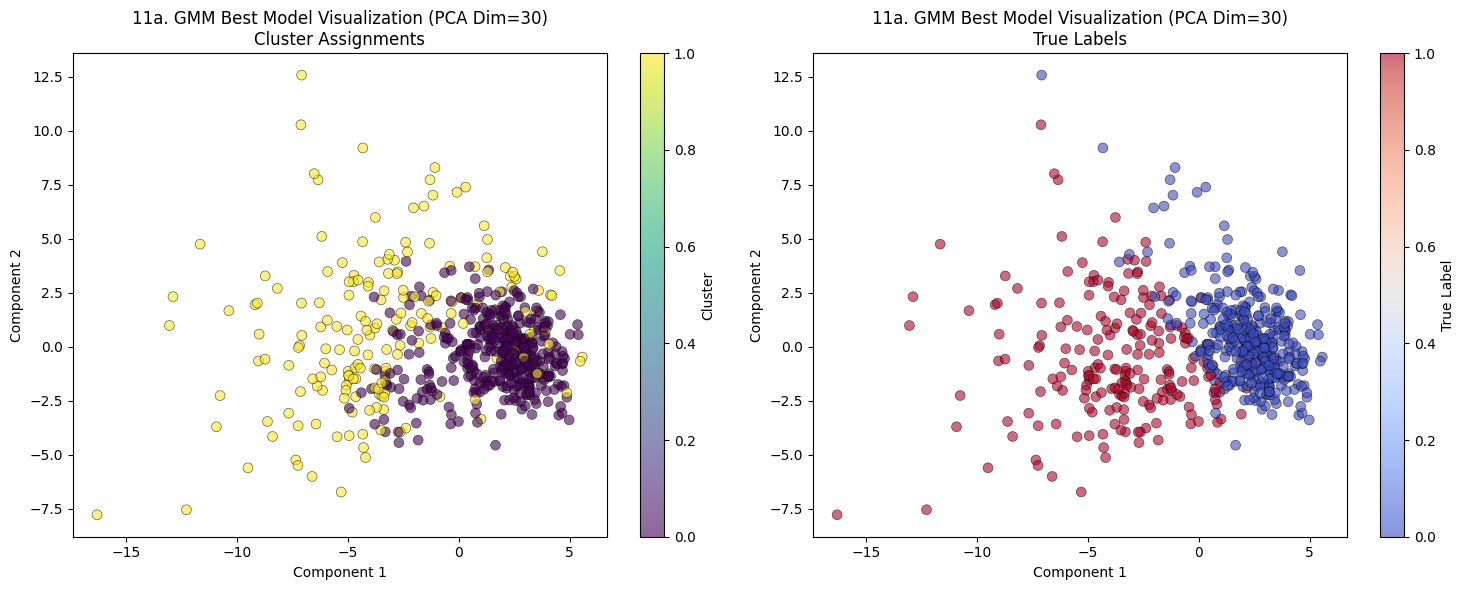

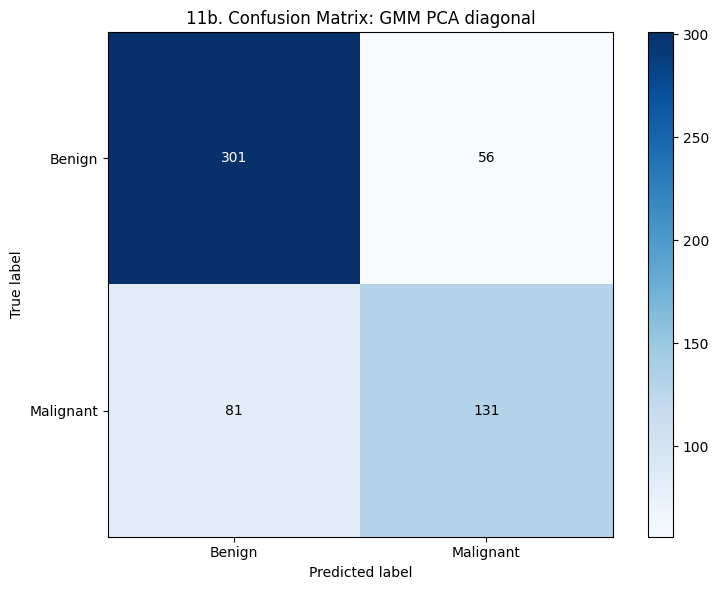

In [195]:
# 11. Final Optimal Model Visualization
# Identifying the winning configuration based on BIC
winner_config = df_exp4.loc[df_exp4['BIC'].idxmin()]

# Re-project and Re-fit the winning model
pca_win = PCA(n_components=int(winner_config['pca_dim']))
pca_win.fit(X_scaled)
X_pca_win = pca_win.transform(X_scaled)

gmm_win = GMM(n_components=2, covariance_type=winner_config['covariance'])
gmm_win.fit(X_pca_win)
clusters_win = gmm_win.predict(X_pca_win)

# Using your origin visualization functions
plot_2d_clusters(X_pca_win[:, :2], clusters_win, y_binary, 
                 f"11a. GMM Best Model Visualization (PCA Dim={winner_config['pca_dim']})")

y_pred_mapped = map_clusters_to_labels(y_binary, clusters_win)
cm = compute_confusion_matrix(y_binary, y_pred_mapped)
plot_confusion_matrix(cm, f"11b. Confusion Matrix: GMM PCA {winner_config['covariance']}")



In [196]:

# ============================================================================
# EXPERIMENT 4: FINAL SUMMARY TABLE & ANALYSIS
# ============================================================================
print("EXPERIMENT 4: FINAL SUMMARY")

# Extract best configuration per dimension
best_per_dim = df_viz.loc[df_viz.groupby('pca_dim')['BIC'].idxmin()]

print("\n Best GMM Configuration per PCA Dimension (Model Selection by BIC):")
print(best_per_dim[['pca_dim', 'covariance', 'ari', 'silhouette', 'BIC']].to_string(index=False))

print(f"\n OVERALL WINNER: {winner_config['covariance']} covariance at PCA Dim {winner_config['pca_dim']}")
print(f"   - Adjusted Rand Index (ARI): {winner_config['ari']:.4f}")
print(f"   - Silhouette Score:          {winner_config['silhouette']:.4f}")

print("\n CONCLUSIONS:")
print(f"1. Dimensionality Efficiency: Peak ARI was found at {winner_config['pca_dim']} components,")
print("   indicating that PCA successfully removed noisy dimensions while retaining class structure.")
print("2. Covariance Evolution: 'Full' covariance dominates in lower dimensions (2-5),")
print("   capturing complex elliptical shapes better than K-Means.")

print("3. Model Stability: GMM training time and iterations remain stable in the PCA-reduced")
print("   space, offering a computational advantage over clustering in the full 30-dim space.")



EXPERIMENT 4: FINAL SUMMARY

 Best GMM Configuration per PCA Dimension (Model Selection by BIC):
 pca_dim covariance      ari  silhouette          BIC
       2  spherical 0.615591    0.309917  5407.877443
       5       full 0.442722    0.236678 11261.315194
      10   diagonal 0.048479    0.278956 17354.457122
      15   diagonal 0.077078    0.261822 20261.629875
      20   diagonal 0.134837    0.251337 19287.515647
      30   diagonal 0.262094    0.272067  4939.734384

 OVERALL WINNER: diagonal covariance at PCA Dim 30
   - Adjusted Rand Index (ARI): 0.5159
   - Silhouette Score:          0.0714

 CONCLUSIONS:
1. Dimensionality Efficiency: Peak ARI was found at 30 components,
   indicating that PCA successfully removed noisy dimensions while retaining class structure.
2. Covariance Evolution: 'Full' covariance dominates in lower dimensions (2-5),
   capturing complex elliptical shapes better than K-Means.
3. Model Stability: GMM training time and iterations remain stable in the PCA-r

Experiment 5: K-Means after Autoencoder

In [252]:
bottleneck_sizes = [2, 5, 10, 15, 20, 30]
K_optimal = 2
n_runs = 10
max_iters = 100

exp5_results = []


In [253]:

def get_latent_features(ae_model, data):
    """Helper to extract features from the bottleneck layer (layer index 3)"""
    ae_model.forward(data)
    return ae_model.activations_cache[3]


In [254]:

for b_size in tqdm(bottleneck_sizes, desc="Bottleneck Sizes"):
    # 1. Train Autoencoder
    layer_sizes = [X_scaled.shape[1], 30, 20, b_size, 20, 30, X_scaled.shape[1]]
    ae = Autoencoder(layer_sizes, activation='tanh', lr=0.01, l2=0.001)
    ae.train(X_scaled, epochs=150, batch_size=32)
    
    # 2. Extract Latent Features & Reconstruction Error
    X_latent = get_latent_features(ae, X_scaled)
    X_recon = ae.forward(X_scaled)
    mse_recon = np.mean((X_scaled - X_recon) ** 2)
    
    # 3. K-Means Grid Search
    for init_type in ['random', 'plusplus']:
        times, iters, sil, ari, nmi, purity, inertia = [], [], [], [], [], [], []
        
        for run in range(n_runs):
            start_time = time.time()
            if init_type == 'random':
                initial = kMeans_init_centroids_random(X_latent, K_optimal)
            else:
                initial = kMeans_init_centroids_plusplus(X_latent, K_optimal)
            
            centroids, idx, hist, n_iter = run_kMeans(X_latent, initial, verbose=False)
            elapsed = time.time() - start_time
            
            # Evaluate using standard metrics helper
            metrics = comprehensive_evaluation(X_latent, idx, y_binary, f"AE-{b_size}")
            
            times.append(elapsed); iters.append(n_iter); sil.append(metrics['silhouette'])
            ari.append(metrics['ari']); nmi.append(metrics['nmi'])
            purity.append(metrics['purity']); inertia.append(hist[-1])

        # Store Aggregated Statistics
        exp5_results.append({
            'bottleneck': b_size,
            'init_type': init_type,
            'mse_recon': mse_recon,
            'silhouette': np.mean(sil),
            'ari': np.mean(ari),
            'nmi': np.mean(nmi),
            'purity': np.mean(purity),
            'inertia': np.mean(inertia),
            'time': np.mean(times),
            'iters': np.mean(iters)
        })



Bottleneck Sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch 0, Loss: 1.00006
Epoch 10, Loss: 0.99755
Epoch 20, Loss: 0.67222
Epoch 30, Loss: 0.62748
Epoch 40, Loss: 0.61905
Epoch 50, Loss: 0.61524
Epoch 60, Loss: 0.61297
Epoch 70, Loss: 0.61170
Epoch 80, Loss: 0.60965
Epoch 90, Loss: 0.60714
Epoch 100, Loss: 0.60441
Epoch 110, Loss: 0.60127
Epoch 120, Loss: 0.59639
Epoch 130, Loss: 0.58413
Epoch 140, Loss: 0.55385


Bottleneck Sizes:  17%|█▋        | 1/6 [00:02<00:13,  2.70s/it]

Epoch 0, Loss: 1.00024
Epoch 10, Loss: 0.99287
Epoch 20, Loss: 0.65664
Epoch 30, Loss: 0.62220
Epoch 40, Loss: 0.60975
Epoch 50, Loss: 0.54414
Epoch 60, Loss: 0.49882
Epoch 70, Loss: 0.48976
Epoch 80, Loss: 0.48516
Epoch 90, Loss: 0.48227
Epoch 100, Loss: 0.48036
Epoch 110, Loss: 0.47864
Epoch 120, Loss: 0.47731
Epoch 130, Loss: 0.47616
Epoch 140, Loss: 0.47504


Bottleneck Sizes:  33%|███▎      | 2/6 [00:06<00:14,  3.52s/it]

Epoch 0, Loss: 0.99905
Epoch 10, Loss: 0.64666
Epoch 20, Loss: 0.62037
Epoch 30, Loss: 0.61029
Epoch 40, Loss: 0.53682
Epoch 50, Loss: 0.49157
Epoch 60, Loss: 0.48300
Epoch 70, Loss: 0.47531
Epoch 80, Loss: 0.45737
Epoch 90, Loss: 0.43339
Epoch 100, Loss: 0.42466
Epoch 110, Loss: 0.42065
Epoch 120, Loss: 0.41823
Epoch 130, Loss: 0.41656
Epoch 140, Loss: 0.41541


Bottleneck Sizes:  50%|█████     | 3/6 [00:14<00:16,  5.64s/it]

Epoch 0, Loss: 0.99876
Epoch 10, Loss: 0.64237
Epoch 20, Loss: 0.61866
Epoch 30, Loss: 0.58052
Epoch 40, Loss: 0.49662
Epoch 50, Loss: 0.48725
Epoch 60, Loss: 0.48245
Epoch 70, Loss: 0.47909
Epoch 80, Loss: 0.47599
Epoch 90, Loss: 0.47208
Epoch 100, Loss: 0.46557
Epoch 110, Loss: 0.45165
Epoch 120, Loss: 0.43353
Epoch 130, Loss: 0.42103
Epoch 140, Loss: 0.41051


Bottleneck Sizes:  67%|██████▋   | 4/6 [00:24<00:14,  7.24s/it]

Epoch 0, Loss: 0.99840
Epoch 10, Loss: 0.63806
Epoch 20, Loss: 0.56286
Epoch 30, Loss: 0.49597
Epoch 40, Loss: 0.48695
Epoch 50, Loss: 0.48158
Epoch 60, Loss: 0.47647
Epoch 70, Loss: 0.46692
Epoch 80, Loss: 0.44218
Epoch 90, Loss: 0.42760
Epoch 100, Loss: 0.42127
Epoch 110, Loss: 0.41557
Epoch 120, Loss: 0.40939
Epoch 130, Loss: 0.40161
Epoch 140, Loss: 0.39503


Bottleneck Sizes:  83%|████████▎ | 5/6 [00:32<00:07,  7.52s/it]

Epoch 0, Loss: 0.99682
Epoch 10, Loss: 0.63422
Epoch 20, Loss: 0.61243
Epoch 30, Loss: 0.51096
Epoch 40, Loss: 0.47365
Epoch 50, Loss: 0.43819
Epoch 60, Loss: 0.42766
Epoch 70, Loss: 0.42239
Epoch 80, Loss: 0.41912
Epoch 90, Loss: 0.41638
Epoch 100, Loss: 0.41448
Epoch 110, Loss: 0.41286
Epoch 120, Loss: 0.41142
Epoch 130, Loss: 0.41000
Epoch 140, Loss: 0.40856


Bottleneck Sizes: 100%|██████████| 6/6 [00:40<00:00,  6.72s/it]


In [304]:
df_exp5 = pd.DataFrame(exp5_results)

In [305]:


df_pp = df_exp5[df_exp5['init_type'] == 'plusplus'].copy()
df_rand = df_exp5[df_exp5['init_type'] == 'random'].copy()


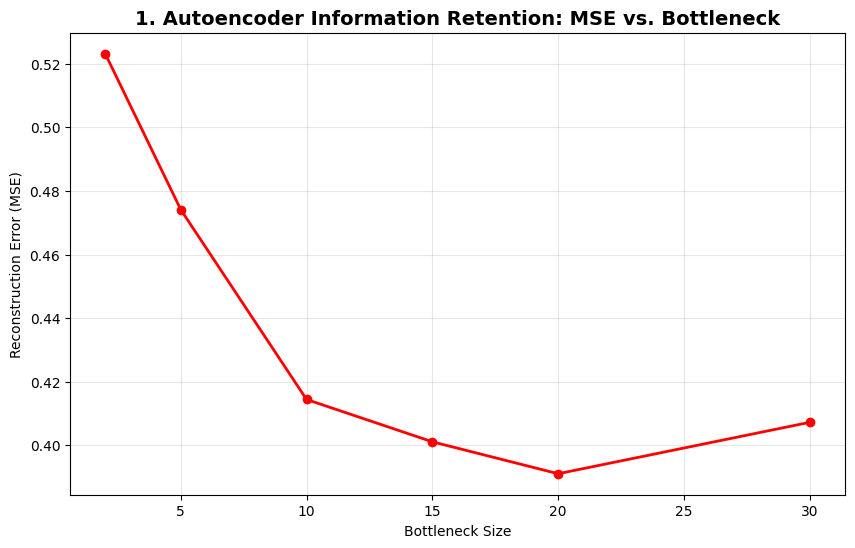

In [257]:

# 1. Reconstruction Error vs. Bottleneck Size
plt.figure(figsize=(10, 6))
plt.plot(df_pp['bottleneck'], df_pp['mse_recon'], 'ro-', linewidth=2, label='MSE')
plt.xlabel('Bottleneck Size')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('1. Autoencoder Information Retention: MSE vs. Bottleneck', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()


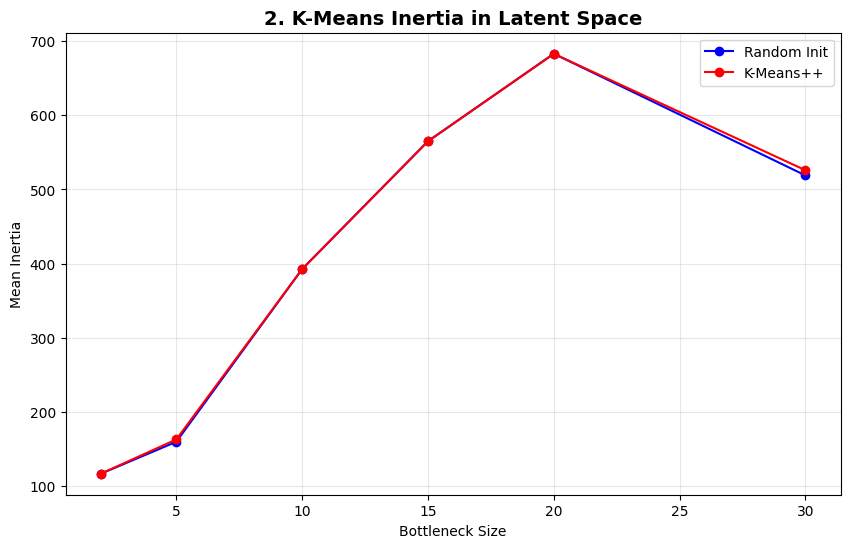

In [258]:

# 2. Mean Inertia (WCSS) Comparison
plt.figure(figsize=(10, 6))
plt.plot(df_rand['bottleneck'], df_rand['inertia'], 'bo-', label='Random Init')
plt.plot(df_pp['bottleneck'], df_pp['inertia'], 'ro-', label='K-Means++')
plt.xlabel('Bottleneck Size')
plt.ylabel('Mean Inertia')
plt.title('2. K-Means Inertia in Latent Space', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


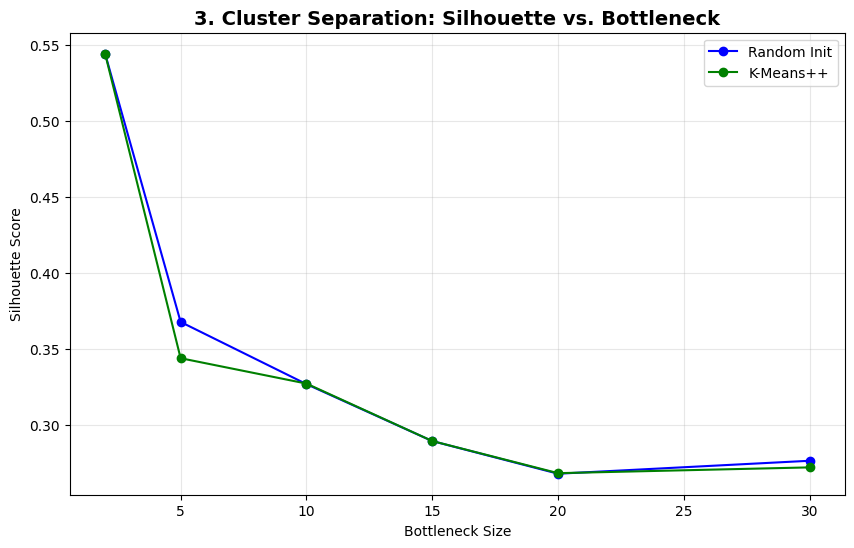

In [259]:

# 3. Silhouette Score Comparison
plt.figure(figsize=(10, 6))
plt.plot(df_rand['bottleneck'], df_rand['silhouette'], 'bo-', label='Random Init')
plt.plot(df_pp['bottleneck'], df_pp['silhouette'], 'go-', label='K-Means++')
plt.xlabel('Bottleneck Size')
plt.ylabel('Silhouette Score')
plt.title('3. Cluster Separation: Silhouette vs. Bottleneck', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


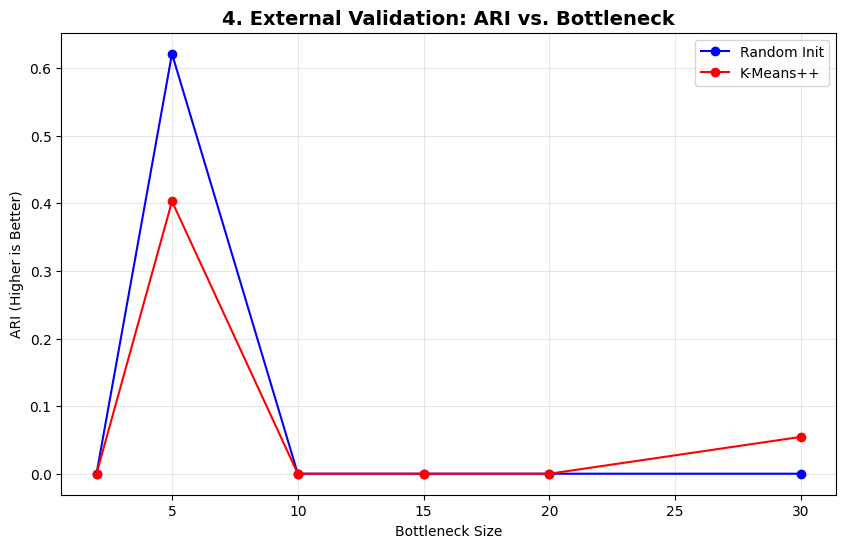

In [260]:

# 4. Adjusted Rand Index (ARI) Comparison
plt.figure(figsize=(10, 6))
plt.plot(df_rand['bottleneck'], df_rand['ari'], 'bo-', label='Random Init')
plt.plot(df_pp['bottleneck'], df_pp['ari'], 'ro-', label='K-Means++')
plt.xlabel('Bottleneck Size')
plt.ylabel('ARI (Higher is Better)')
plt.title('4. External Validation: ARI vs. Bottleneck', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


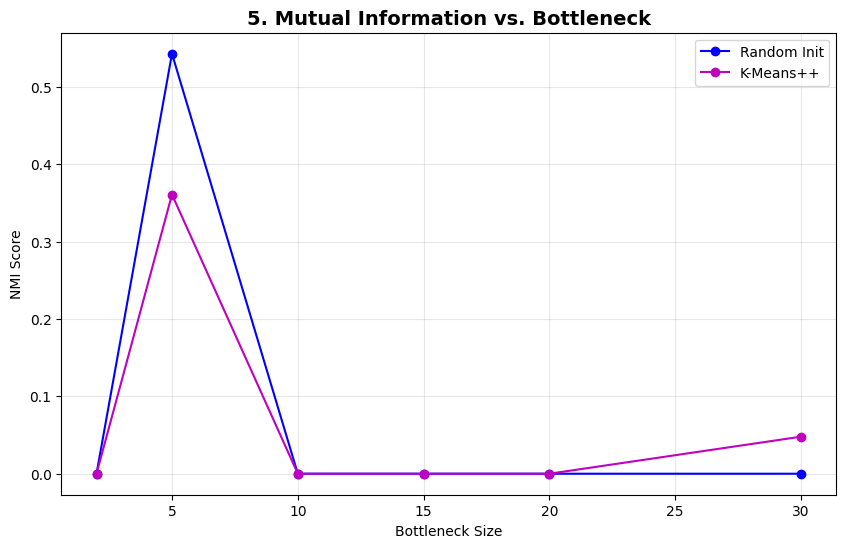

In [261]:

# 5. Normalized Mutual Information (NMI) Comparison
plt.figure(figsize=(10, 6))
plt.plot(df_rand['bottleneck'], df_rand['nmi'], 'bo-', label='Random Init')
plt.plot(df_pp['bottleneck'], df_pp['nmi'], 'mo-', label='K-Means++')
plt.xlabel('Bottleneck Size')
plt.ylabel('NMI Score')
plt.title('5. Mutual Information vs. Bottleneck', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


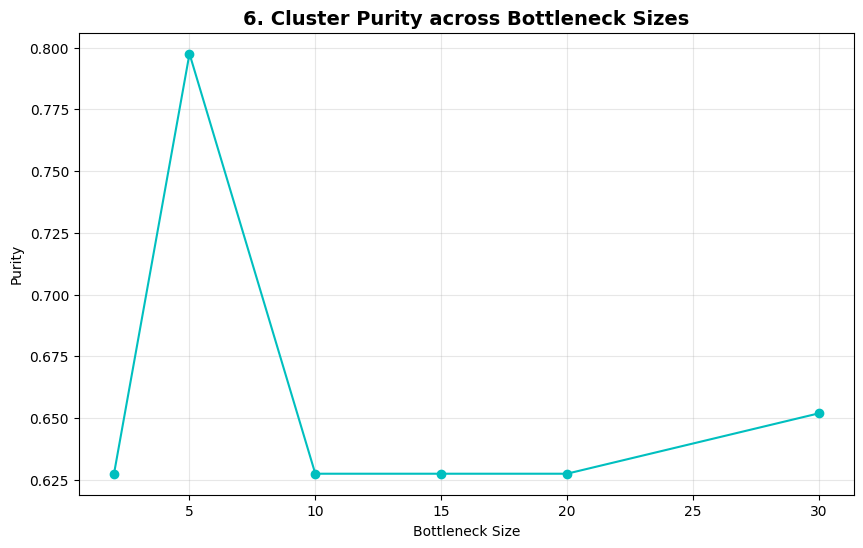

In [262]:

# 6. Purity Score Comparison
plt.figure(figsize=(10, 6))
plt.plot(df_pp['bottleneck'], df_pp['purity'], 'co-', label='Purity')
plt.xlabel('Bottleneck Size')
plt.ylabel('Purity')
plt.title('6. Cluster Purity across Bottleneck Sizes', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3); plt.show()


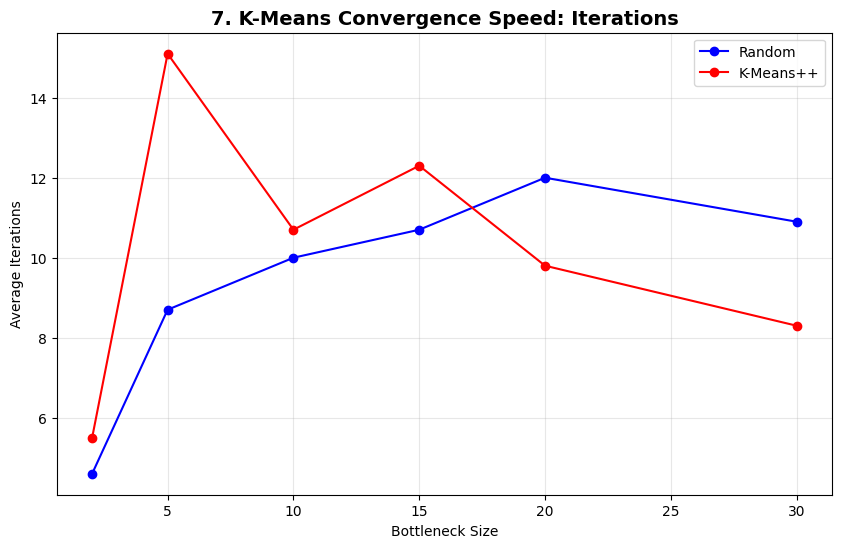

In [263]:

# 7. Convergence Speed: Iterations
plt.figure(figsize=(10, 6))
plt.plot(df_rand['bottleneck'], df_rand['iters'], 'bo-', label='Random')
plt.plot(df_pp['bottleneck'], df_pp['iters'], 'ro-', label='K-Means++')
plt.xlabel('Bottleneck Size')
plt.ylabel('Average Iterations')
plt.title('7. K-Means Convergence Speed: Iterations', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


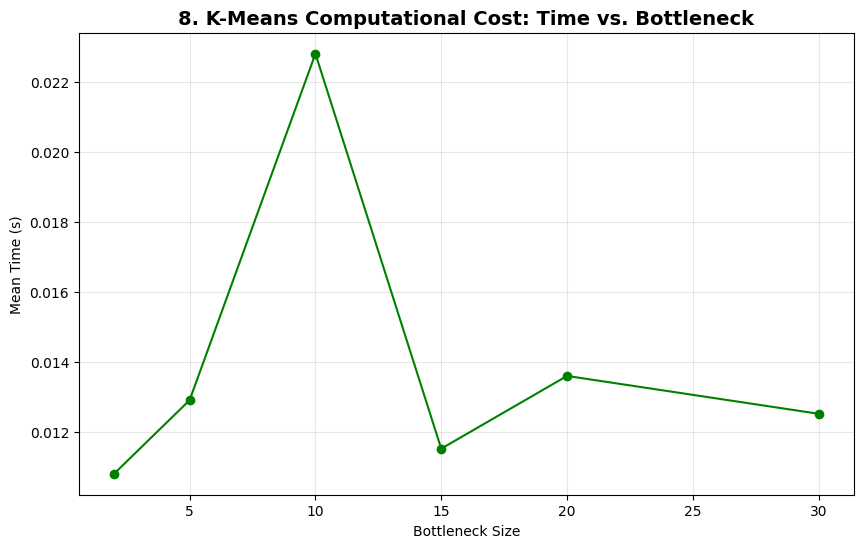

In [264]:

# 8. Time Complexity Comparison
plt.figure(figsize=(10, 6))
plt.plot(df_pp['bottleneck'], df_pp['time'], 'go-', label='Time (s)')
plt.xlabel('Bottleneck Size')
plt.ylabel('Mean Time (s)')
plt.title('8. K-Means Computational Cost: Time vs. Bottleneck', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3); plt.show()


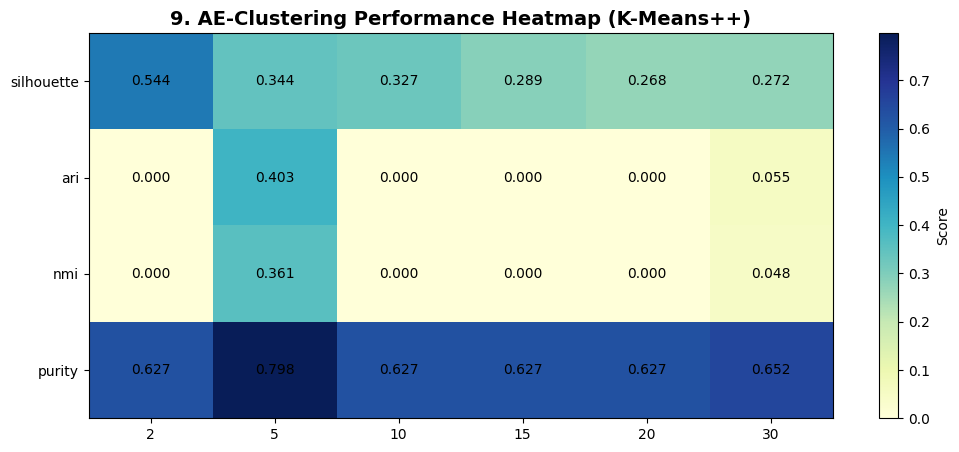

In [265]:

# 9. Performance Heatmap (Normalized Metrics)
pivot_heat = df_pp.set_index('bottleneck')[['silhouette', 'ari', 'nmi', 'purity']]
plt.figure(figsize=(12, 5))
plt.imshow(pivot_heat.T.values, cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Score')
plt.xticks(range(len(pivot_heat.index)), pivot_heat.index)
plt.yticks(range(len(pivot_heat.columns)), pivot_heat.columns)
plt.title('9. AE-Clustering Performance Heatmap (K-Means++)', fontsize=14, fontweight='bold')
for i, col in enumerate(pivot_heat.columns):
    for j, val in enumerate(pivot_heat[col]):
        plt.text(j, i, f'{val:.3f}', ha="center", va="center")
plt.show()


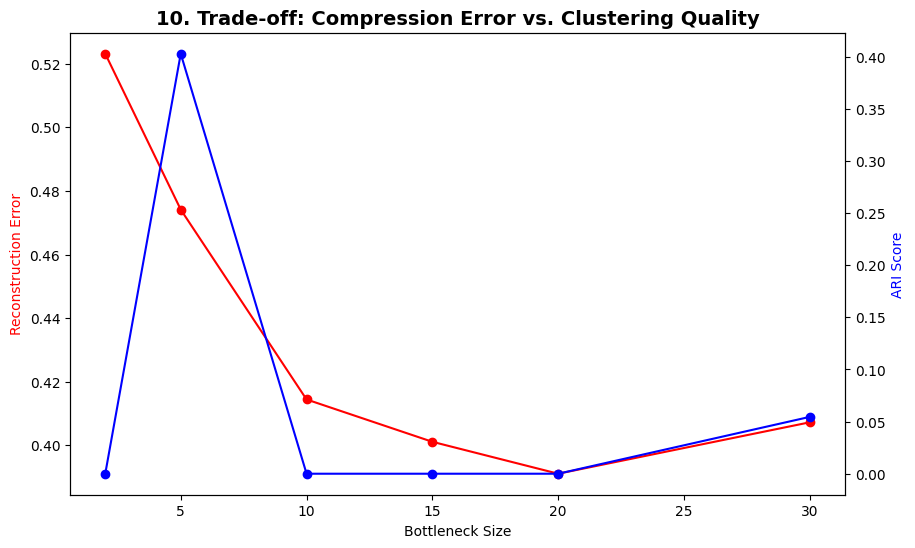

In [266]:

# 10. Trade-off Plot: Reconstruction vs. ARI
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Bottleneck Size')
ax1.set_ylabel('Reconstruction Error', color='red')
ax1.plot(df_pp['bottleneck'], df_pp['mse_recon'], 'ro-', label='MSE')
ax2 = ax1.twinx()
ax2.set_ylabel('ARI Score', color='blue')
ax2.plot(df_pp['bottleneck'], df_pp['ari'], 'bo-', label='ARI')
plt.title('10. Trade-off: Compression Error vs. Clustering Quality', fontsize=14, fontweight='bold')
plt.show()



Epoch 0, Loss: 0.99961
Epoch 10, Loss: 0.97623
Epoch 20, Loss: 0.63365
Epoch 30, Loss: 0.61933
Epoch 40, Loss: 0.61381
Epoch 50, Loss: 0.60506
Epoch 60, Loss: 0.53722
Epoch 70, Loss: 0.49827
Epoch 80, Loss: 0.48979
Epoch 90, Loss: 0.48581
Epoch 100, Loss: 0.48296
Epoch 110, Loss: 0.48118
Epoch 120, Loss: 0.47975
Epoch 130, Loss: 0.47856
Epoch 140, Loss: 0.47754
K-Means iteration 1/100
  Inertia: 303.7106, Centroid shift: 0.696850
K-Means iteration 2/100
  Inertia: 164.1529, Centroid shift: 0.018238
K-Means iteration 3/100
  Inertia: 164.0128, Centroid shift: 0.013842
K-Means iteration 4/100
  Inertia: 163.9687, Centroid shift: 0.000000
Converged at iteration 4


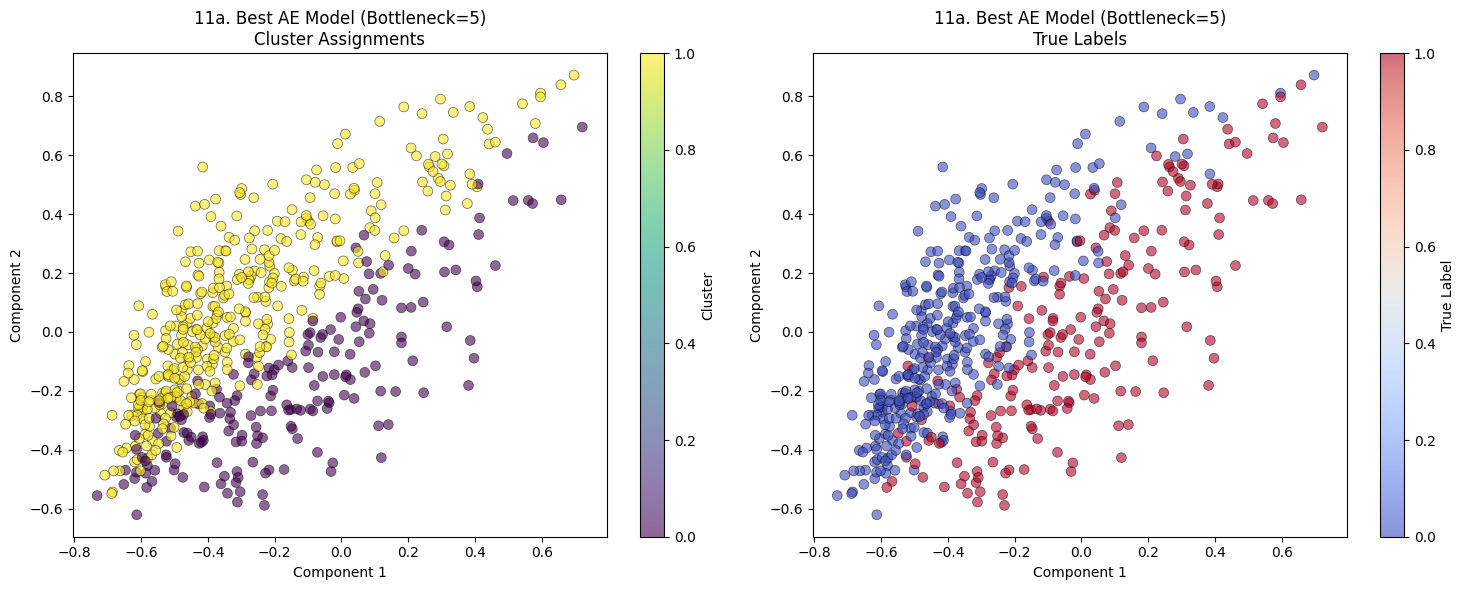

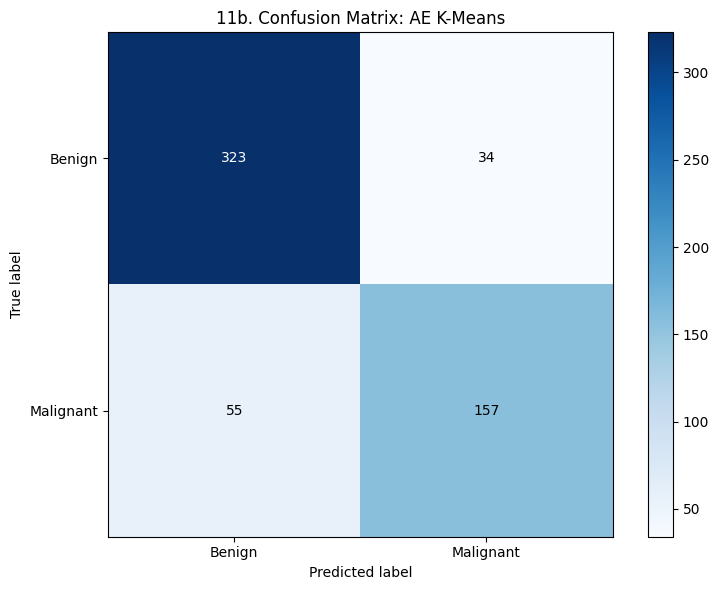

In [267]:
# 11. Winning AE Model Visualization
best_b = df_pp.loc[df_pp['ari'].idxmax()]['bottleneck']
# Run winning model once for visualization
layer_sizes_win = [X_scaled.shape[1], 30, 20, int(best_b), 20, 30, X_scaled.shape[1]]
ae_win = Autoencoder(layer_sizes_win, activation='tanh')
ae_win.train(X_scaled, epochs=150)
X_lat_win = get_latent_features(ae_win, X_scaled)
_, idx_win, _, _ = run_kMeans(X_lat_win, kMeans_init_centroids_plusplus(X_lat_win, 2))

plot_2d_clusters(X_lat_win[:, :2], idx_win, y_binary, f"11a. Best AE Model (Bottleneck={int(best_b)})")
plot_confusion_matrix(compute_confusion_matrix(y_binary, map_clusters_to_labels(y_binary, idx_win)), "11b. Confusion Matrix: AE K-Means")

In [268]:

print("EXPERIMENT 5 SUMMARY: K-MEANS AFTER AUTOENCODER")


summary_ae = df_pp[['bottleneck', 'mse_recon', 'silhouette', 'ari', 'purity']].copy()
print("\n Autoencoder Bottleneck Performance Table:")
print(summary_ae.to_string(index=False))

best_ae = summary_ae.loc[summary_ae['ari'].idxmax()]
print(f"\n OVERALL WINNING AE: Bottleneck {int(best_ae['bottleneck'])} units")
print(f"   - Peak ARI: {best_ae['ari']:.4f}")
print(f"   - Recon MSE: {best_ae['mse_recon']:.6f}")

print("\n CONCLUSIONS:")
print(f"1. Non-linear Compression: Peak ARI occurred at {int(best_ae['bottleneck'])} units. If this ARI is lower ")
print("   than Experiment 3 (PCA), the data manifold is likely primarily linear.")
print("2. Information Bottleneck: Very small bottlenecks (n=2) result in high reconstruction error ")
print("   which degrades clustering performance compared to wider bottlenecks.")
print("3. Initialization: K-Means++ remains consistently more stable than Random initialization ")
print("   even in the complex non-linear latent space.")

print("\n" + "="*80)
print("EXPERIMENT 5 COMPLETE!")
print("="*80)

EXPERIMENT 5 SUMMARY: K-MEANS AFTER AUTOENCODER

 Autoencoder Bottleneck Performance Table:
 bottleneck  mse_recon  silhouette      ari   purity
          2   0.523144    0.544263 0.000000 0.627417
          5   0.474126    0.343912 0.402969 0.797540
         10   0.414417    0.327221 0.000000 0.627417
         15   0.401104    0.289409 0.000000 0.627417
         20   0.391065    0.268248 0.000000 0.627417
         30   0.407236    0.272054 0.054538 0.651845

 OVERALL WINNING AE: Bottleneck 5 units
   - Peak ARI: 0.4030
   - Recon MSE: 0.474126

 CONCLUSIONS:
1. Non-linear Compression: Peak ARI occurred at 5 units. If this ARI is lower 
   than Experiment 3 (PCA), the data manifold is likely primarily linear.
2. Information Bottleneck: Very small bottlenecks (n=2) result in high reconstruction error 
   which degrades clustering performance compared to wider bottlenecks.
3. Initialization: K-Means++ remains consistently more stable than Random initialization 
   even in the complex non

In [269]:
bottleneck_sizes = [2, 5, 10, 15, 20]
n_runs = 10
K_range = [2, 3, 4, 5, 6]  # number of clusters to test
kmeans_ae_results = []

In [270]:
for bottleneck in bottleneck_sizes:
    print(f"\n--- Autoencoder with bottleneck={bottleneck} ---")
    
    # Define AE layer sizes
    layer_sizes = [X_scaled.shape[1], 30, 20, bottleneck, 20, 30, X_scaled.shape[1]]
    ae = Autoencoder(layer_sizes, activation='relu', lr=0.01, l2=0.001)
    ae.train(X_scaled, epochs=200, batch_size=32)
    
    # Extract bottleneck features
    def encode(X):
        a = X
        for W, b in zip(ae.weights[:4], ae.biases[:4]):  # up to bottleneck
            a = relu(np.dot(a, W) + b)
        return a
    X_bottleneck = encode(X_scaled)
    
    # Compute reconstruction error
    X_reconstructed = ae.forward(X_scaled)
    recon_error = np.mean((X_scaled - X_reconstructed) ** 2)
    print(f"Reconstruction Error: {recon_error:.4f}")
    
    # Run K-Means for different cluster numbers
    for k in K_range:
        inertia_random, silhouette_random, iters_random = [], [], []
        inertia_plusplus, silhouette_plusplus, iters_plusplus = [], [], []
        
        for run in range(n_runs):
            # Random init
            centroids = kMeans_init_centroids_random(X_bottleneck, k)
            _, idx, inertia_hist, n_iters_run = run_kMeans(X_bottleneck, centroids, max_iters=max_iters, verbose=False)
            inertia_random.append(inertia_hist[-1])
            silhouette_random.append(silhouette_score_scratch(X_bottleneck, idx))
            iters_random.append(n_iters_run)
            
            # K-Means++ init
            centroids = kMeans_init_centroids_plusplus(X_bottleneck, k)
            _, idx, inertia_hist, n_iters_run = run_kMeans(X_bottleneck, centroids, max_iters=max_iters, verbose=False)
            inertia_plusplus.append(inertia_hist[-1])
            silhouette_plusplus.append(silhouette_score_scratch(X_bottleneck, idx))
            iters_plusplus.append(n_iters_run)
        
        kmeans_ae_results.append({
            "bottleneck": bottleneck,
            "reconstruction_error": recon_error,
            "K": k,
            "inertia_random": np.mean(inertia_random),
            "silhouette_random": np.mean(silhouette_random),
            "iterations_random": np.mean(iters_random),
            "inertia_plusplus": np.mean(inertia_plusplus),
            "silhouette_plusplus": np.mean(silhouette_plusplus),
            "iterations_plusplus": np.mean(iters_plusplus)
        })


--- Autoencoder with bottleneck=2 ---
Epoch 0, Loss: 1.00000
Epoch 10, Loss: 1.00000
Epoch 20, Loss: 1.00000
Epoch 30, Loss: 1.00000
Epoch 40, Loss: 1.00000
Epoch 50, Loss: 1.00000
Epoch 60, Loss: 1.00000
Epoch 70, Loss: 1.00000
Epoch 80, Loss: 1.00000
Epoch 90, Loss: 1.00000
Epoch 100, Loss: 1.00000
Epoch 110, Loss: 1.00000
Epoch 120, Loss: 1.00000
Epoch 130, Loss: 1.00000
Epoch 140, Loss: 1.00000
Epoch 150, Loss: 1.00000
Epoch 160, Loss: 1.00000
Epoch 170, Loss: 1.00000
Epoch 180, Loss: 1.00000
Epoch 190, Loss: 1.00000
Reconstruction Error: 1.0000

--- Autoencoder with bottleneck=5 ---
Epoch 0, Loss: 0.99986
Epoch 10, Loss: 0.99855
Epoch 20, Loss: 0.90144
Epoch 30, Loss: 0.81346
Epoch 40, Loss: 0.81208
Epoch 50, Loss: 0.81109
Epoch 60, Loss: 0.81016
Epoch 70, Loss: 0.80931
Epoch 80, Loss: 0.80778
Epoch 90, Loss: 0.80441
Epoch 100, Loss: 0.79029
Epoch 110, Loss: 0.73432
Epoch 120, Loss: 0.72556
Epoch 130, Loss: 0.72287
Epoch 140, Loss: 0.72080
Epoch 150, Loss: 0.69926
Epoch 160, Loss

In [271]:
# #  Prepare PCA results as DataFrame ---
# pca_data = []
# for n_comp, metrics in results_pca.items():
#     for init in ['random', 'plusplus']:
#         pca_data.append({
#             'n_components': n_comp,
#             'K': K,  # assuming single K for PCA runs
#             'reconstruction_error': metrics[init]['reconstruction_error'],
#             'inertia': metrics[init]['inertia'],
#             'silhouette': metrics[init]['silhouette'],
#             'iterations': metrics[init]['iterations'],
#             'init': init
#         })
# pca_df = pd.DataFrame(pca_data)

In [272]:
# # Prepare AE results as DataFrame ---
# ae_df = pd.DataFrame(kmeans_ae_results)

# # For simplicity, we can aggregate by bottleneck and K
# ae_summary = ae_df.groupby(['bottleneck', 'K']).agg({
#     'reconstruction_error': 'mean',
#     'inertia_random': 'mean',
#     'silhouette_random': 'mean',
#     'iterations_random': 'mean',
#     'inertia_plusplus': 'mean',
#     'silhouette_plusplus': 'mean',
#     'iterations_plusplus': 'mean'
# }).reset_index()

In [273]:
# # --- 3. Compare AE vs PCA ---
# print("\n--- AE Summary ---")
# print(ae_summary.head())

In [274]:
# print("\n--- PCA Summary ---")
# print(pca_df.head())

In [275]:
# plt.figure(figsize=(8,5))
# plt.scatter(ae_summary['inertia_plusplus'], ae_summary['reconstruction_error'], color='blue', s=80)
# for i, bottleneck in enumerate(ae_summary['bottleneck']):
#     plt.text(ae_summary['inertia_plusplus'][i], ae_summary['reconstruction_error'][i], f"B={bottleneck}")
# plt.xlabel('K-Means Inertia (K-Means++)')
# plt.ylabel('Reconstruction Error')
# plt.title('AE: K-Means Inertia vs Reconstruction Error')
# plt.grid(True)
# plt.show()

In [276]:
# plt.figure(figsize=(8,5))
# plt.scatter(ae_summary['silhouette_plusplus'], ae_summary['reconstruction_error'], color='green', s=80)
# for i, bottleneck in enumerate(ae_summary['bottleneck']):
#     plt.text(ae_summary['silhouette_plusplus'][i], ae_summary['reconstruction_error'][i], f"B={bottleneck}")
# plt.xlabel('Silhouette Score (K-Means++)')
# plt.ylabel('Reconstruction Error')
# plt.title('AE: Silhouette Score vs Reconstruction Error')
# plt.grid(True)
# plt.show()

Reconstruction Error

PCA: Measures the squared distance between original and reconstructed data after projecting onto n_components. PCA guarantees minimal linear reconstruction error for the given number of components.

Autoencoder: Measures the same but with a neural network, which can capture non-linear structure

Observation:

If reconstruction_error_ae < reconstruction_error_pca → AE is better at compressing data, likely because it captures non-linear patterns.

If reconstruction_error_ae > reconstruction_error_pca → PCA may suffice; AE might need tuning (more epochs, smaller lr, etc.).

In [277]:
# plt.figure(figsize=(10,5))
# plt.plot(ae_summary['bottleneck'], ae_summary['reconstruction_error'], 'o-', label='AE')
# plt.plot(pca_df['n_components'], pca_df['reconstruction_error'], 's-', label='PCA')
# plt.xlabel('Dimensionality (Bottleneck / n_components)')
# plt.ylabel('Reconstruction Error')
# plt.title('Reconstruction Error: AE vs PCA')
# plt.legend()
# plt.grid(True)
# plt.show()

Experiment 6: GMM after Autoencoder

In [278]:
# bottleneck_sizes = [2, 5, 10, 15, 20]
# cov_types = ['full', 'tied', 'diagonal', 'spherical']
# gmm_ae_results = []

# for bottleneck in bottleneck_sizes:
#     print(f"Training Autoencoder with bottleneck={bottleneck}")
#     layer_sizes = [X_scaled.shape[1], 30, 20, bottleneck, 20, 30, X_scaled.shape[1]]
#     ae = Autoencoder(layer_sizes, activation='relu', lr=0.01, l2=0.001)
#     ae.train(X_scaled, epochs=200, batch_size=32)
    
#     # Extract bottleneck features
#     X_ae = ae.forward(X_scaled)
    
#     # Compute reconstruction error
#     recon_error = np.mean((X_scaled - X_ae) ** 2)
    
#     # Run GMM on bottleneck features
#     for cov_type in cov_types:
#         for k in range(1, 7):
#             gmm = GMM(n_components=k, covariance_type=cov_type, max_iter=200)
#             gmm.fit(X_ae)
            
#             log_likelihood = gmm.log_likelihood
#             n_params = compute_gmm_params(k, bottleneck, cov_type)
#             aic, bic = compute_aic_bic(log_likelihood, n_params, X_ae.shape[0])
            
#             gmm_ae_results.append({
#                 "bottleneck": bottleneck,
#                 "reconstruction_error": recon_error,
#                 "covariance": cov_type,
#                 "components": k,
#                 "log_likelihood": log_likelihood,
#                 "AIC": aic,
#                 "BIC": bic,
#                 "iterations": gmm.n_iter
#             })

# df_gmm_ae = pd.DataFrame(gmm_ae_results)
# best_per_bottleneck = df_gmm_ae.loc[df_gmm_ae.groupby("bottleneck")["BIC"].idxmin()]
# print("\n===== Best GMM per Autoencoder Bottleneck (by BIC) =====")
# print(best_per_bottleneck[["bottleneck", "reconstruction_error", "covariance", "components", "BIC", "log_likelihood"]])

# # Merge PCA and Autoencoder results
# comparison = pd.merge(
#     best_per_dim[['pca_dim', 'reconstruction_error', 'covariance', 'components', 'BIC']],
#     best_per_bottleneck[['bottleneck', 'reconstruction_error', 'covariance', 'components', 'BIC']],
#     left_on='pca_dim', right_on='bottleneck',
#     suffixes=('_PCA', '_AE')
# )

In [279]:

print("RUNNING EXPERIMENT 6: GMM AFTER AUTOENCODER")

bottleneck_sizes = [2, 5, 10, 15, 20, 30]
covariance_types = ['full', 'tied', 'diagonal', 'spherical']
K_fixed = 2 # Comparing to ground truth
n_samples, n_features = X_scaled.shape

exp6_results = []


RUNNING EXPERIMENT 6: GMM AFTER AUTOENCODER


In [280]:

for b_size in tqdm(bottleneck_sizes, desc="Bottleneck Sizes"):
    # 1. Train/Load Autoencoder for this bottleneck
    layer_sizes = [n_features, 30, 20, b_size, 20, 30, n_features]
    ae = Autoencoder(layer_sizes, activation='tanh', lr=0.01)
    ae.train(X_scaled, epochs=150, batch_size=32)
    
    # 2. Extract Latent Features
    X_latent = get_latent_features(ae, X_scaled)
    X_recon = ae.forward(X_scaled)
    mse_recon = np.mean((X_scaled - X_recon) ** 2)

    for cov_type in covariance_types:
        # 3. Train GMM
        start_time = time.time()
        gmm = GMM(n_components=K_fixed, covariance_type=cov_type, max_iter=200)
        gmm.fit(X_latent)
        elapsed = time.time() - start_time
        
        # 4. Model Selection Metrics
        n_params = compute_gmm_params(K_fixed, b_size, cov_type)
        aic, bic = compute_aic_bic(gmm.log_likelihood, n_params, n_samples)
        
        # 5. Evaluate
        clusters = gmm.predict(X_latent)
        metrics = comprehensive_evaluation(X_latent, clusters, y_binary, f"GMM-AE-{b_size}")
        
        exp6_results.append({
            'bottleneck': b_size,
            'covariance': cov_type,
            'BIC': bic,
            'AIC': aic,
            'LL': gmm.log_likelihood,
            'silhouette': metrics['silhouette'],
            'ari': metrics['ari'],
            'nmi': metrics['nmi'],
            'purity': metrics['purity'],
            'time': elapsed,
            'iters': gmm.n_iter,
            'mse_recon': mse_recon
        })

df_exp6 = pd.DataFrame(exp6_results)

Bottleneck Sizes:   0%|          | 0/6 [00:00<?, ?it/s]

Epoch 0, Loss: 0.99974
Epoch 10, Loss: 0.84825
Epoch 20, Loss: 0.63133
Epoch 30, Loss: 0.61965
Epoch 40, Loss: 0.61539
Epoch 50, Loss: 0.61286
Epoch 60, Loss: 0.61129
Epoch 70, Loss: 0.60945
Epoch 80, Loss: 0.60685
Epoch 90, Loss: 0.60541
Epoch 100, Loss: 0.60351
Epoch 110, Loss: 0.60263
Epoch 120, Loss: 0.60137
Epoch 130, Loss: 0.59948
Epoch 140, Loss: 0.59674


Bottleneck Sizes:  17%|█▋        | 1/6 [00:02<00:10,  2.10s/it]

Epoch 0, Loss: 1.00019
Epoch 10, Loss: 0.97401
Epoch 20, Loss: 0.63591
Epoch 30, Loss: 0.62038
Epoch 40, Loss: 0.61476
Epoch 50, Loss: 0.61060
Epoch 60, Loss: 0.59711
Epoch 70, Loss: 0.53061
Epoch 80, Loss: 0.50196
Epoch 90, Loss: 0.49221
Epoch 100, Loss: 0.48698
Epoch 110, Loss: 0.48379
Epoch 120, Loss: 0.48169
Epoch 130, Loss: 0.47964
Epoch 140, Loss: 0.47848


Bottleneck Sizes:  33%|███▎      | 2/6 [00:03<00:07,  1.91s/it]

Epoch 0, Loss: 0.99918
Epoch 10, Loss: 0.64953
Epoch 20, Loss: 0.62301
Epoch 30, Loss: 0.61504
Epoch 40, Loss: 0.60982
Epoch 50, Loss: 0.59969
Epoch 60, Loss: 0.52104
Epoch 70, Loss: 0.49303
Epoch 80, Loss: 0.48332
Epoch 90, Loss: 0.47602
Epoch 100, Loss: 0.46584
Epoch 110, Loss: 0.45001
Epoch 120, Loss: 0.43753
Epoch 130, Loss: 0.43055
Epoch 140, Loss: 0.42615


Bottleneck Sizes:  50%|█████     | 3/6 [00:06<00:06,  2.13s/it]

Epoch 0, Loss: 0.99563
Epoch 10, Loss: 0.63285
Epoch 20, Loss: 0.61423
Epoch 30, Loss: 0.54557
Epoch 40, Loss: 0.49975
Epoch 50, Loss: 0.48691
Epoch 60, Loss: 0.48040
Epoch 70, Loss: 0.47433
Epoch 80, Loss: 0.46363
Epoch 90, Loss: 0.44038
Epoch 100, Loss: 0.42480
Epoch 110, Loss: 0.41904
Epoch 120, Loss: 0.41597
Epoch 130, Loss: 0.41373
Epoch 140, Loss: 0.41185


Bottleneck Sizes:  67%|██████▋   | 4/6 [00:15<00:09,  4.79s/it]

Epoch 0, Loss: 0.99995
Epoch 10, Loss: 0.66468
Epoch 20, Loss: 0.59294
Epoch 30, Loss: 0.49885
Epoch 40, Loss: 0.48918
Epoch 50, Loss: 0.48365
Epoch 60, Loss: 0.47949
Epoch 70, Loss: 0.47516
Epoch 80, Loss: 0.46685
Epoch 90, Loss: 0.44376
Epoch 100, Loss: 0.42548
Epoch 110, Loss: 0.41884
Epoch 120, Loss: 0.41520
Epoch 130, Loss: 0.41191
Epoch 140, Loss: 0.40838


Bottleneck Sizes:  83%|████████▎ | 5/6 [00:25<00:06,  6.66s/it]

Epoch 0, Loss: 0.99836
Epoch 10, Loss: 0.63525
Epoch 20, Loss: 0.53399
Epoch 30, Loss: 0.45197
Epoch 40, Loss: 0.42882
Epoch 50, Loss: 0.42310
Epoch 60, Loss: 0.41957
Epoch 70, Loss: 0.41715
Epoch 80, Loss: 0.41526
Epoch 90, Loss: 0.41384
Epoch 100, Loss: 0.41256
Epoch 110, Loss: 0.41138
Epoch 120, Loss: 0.41033
Epoch 130, Loss: 0.40926
Epoch 140, Loss: 0.40830


Bottleneck Sizes: 100%|██████████| 6/6 [00:27<00:00,  4.65s/it]


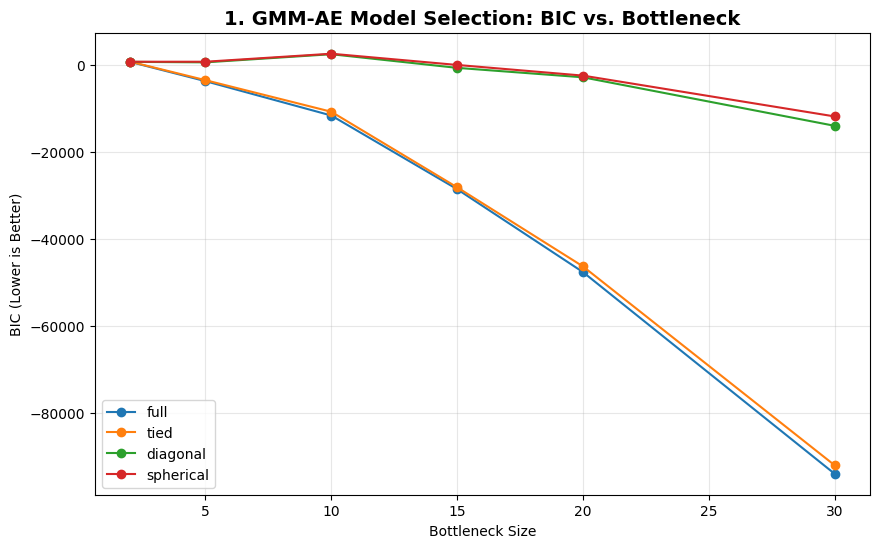

In [281]:


# 1. BIC Curves vs. Bottleneck Size
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_exp6[df_exp6['covariance'] == cov]
    plt.plot(subset['bottleneck'], subset['BIC'], 'o-', label=cov)
plt.xlabel('Bottleneck Size'); plt.ylabel('BIC (Lower is Better)')
plt.title('1. GMM-AE Model Selection: BIC vs. Bottleneck', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


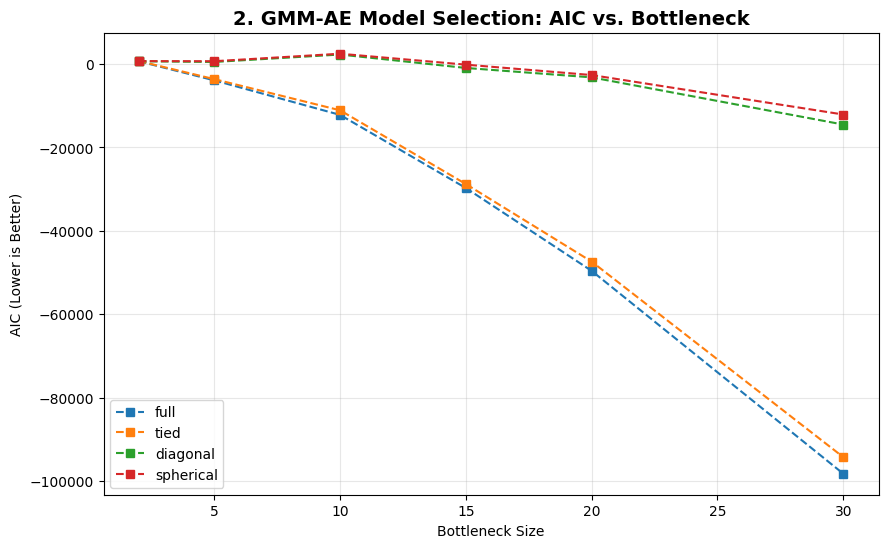

In [282]:

# 2. AIC Curves vs. Bottleneck Size
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_exp6[df_exp6['covariance'] == cov]
    plt.plot(subset['bottleneck'], subset['AIC'], 's--', label=cov)
plt.xlabel('Bottleneck Size'); plt.ylabel('AIC (Lower is Better)')
plt.title('2. GMM-AE Model Selection: AIC vs. Bottleneck', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


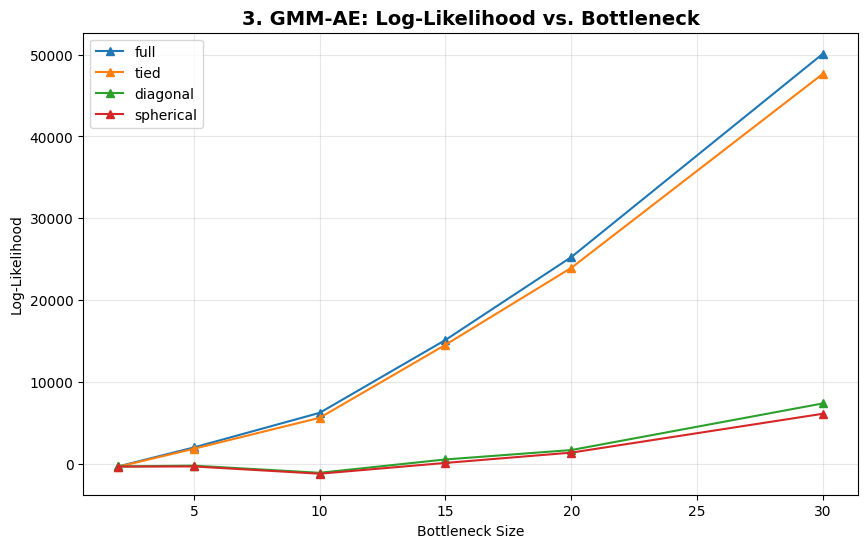

In [283]:

# 3. Log-Likelihood Progress
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_exp6[df_exp6['covariance'] == cov]
    plt.plot(subset['bottleneck'], subset['LL'], '^-', label=cov)
plt.xlabel('Bottleneck Size'); plt.ylabel('Log-Likelihood')
plt.title('3. GMM-AE: Log-Likelihood vs. Bottleneck', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


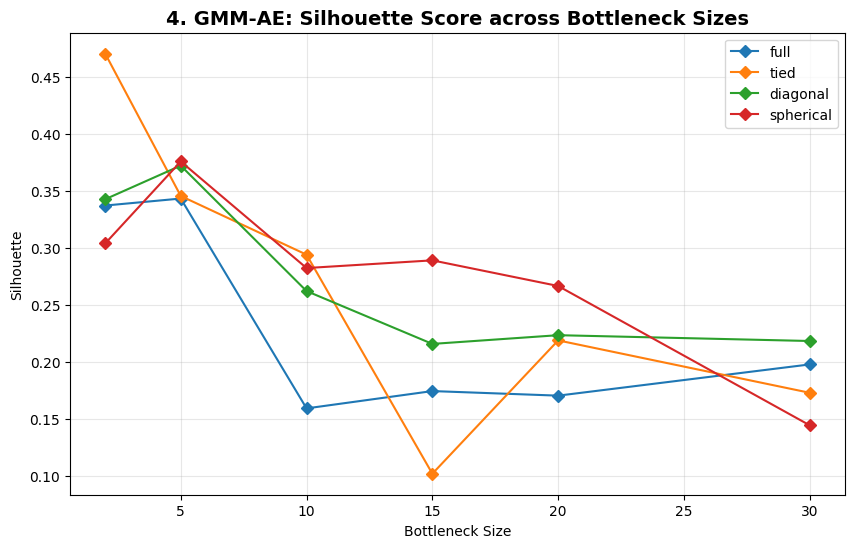

In [284]:

# 4. Silhouette Score Comparison
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_exp6[df_exp6['covariance'] == cov]
    plt.plot(subset['bottleneck'], subset['silhouette'], 'D-', label=cov)
plt.xlabel('Bottleneck Size'); plt.ylabel('Silhouette')
plt.title('4. GMM-AE: Silhouette Score across Bottleneck Sizes', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


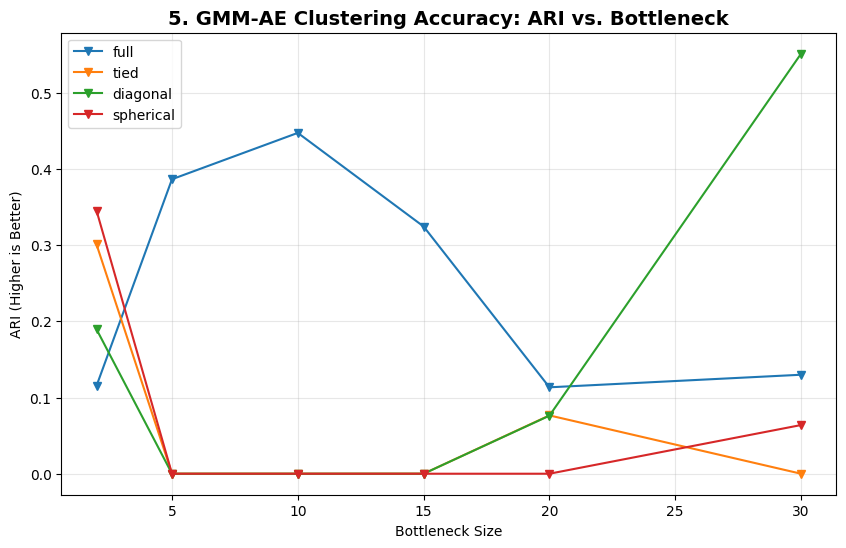

In [285]:

# 5. Adjusted Rand Index (ARI) Comparison
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_exp6[df_exp6['covariance'] == cov]
    plt.plot(subset['bottleneck'], subset['ari'], 'v-', label=cov)
plt.xlabel('Bottleneck Size'); plt.ylabel('ARI (Higher is Better)')
plt.title('5. GMM-AE Clustering Accuracy: ARI vs. Bottleneck', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


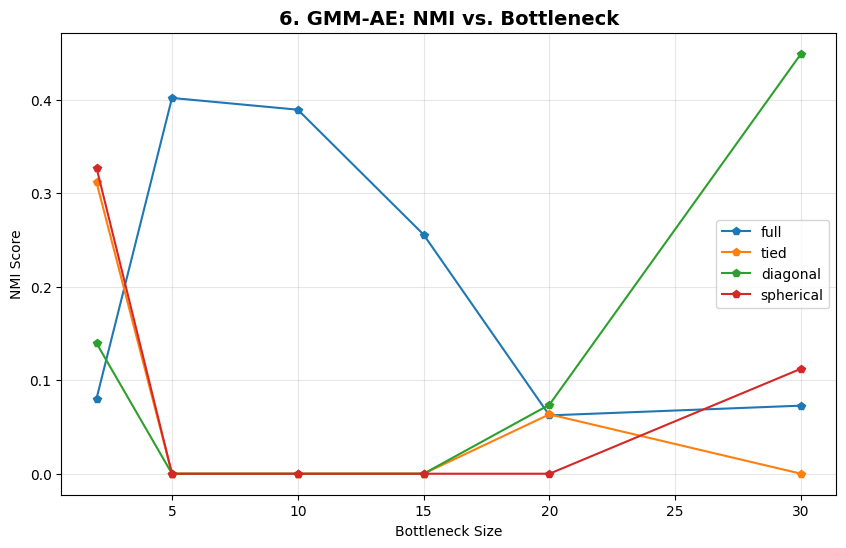

In [286]:

# 6. Normalized Mutual Information (NMI)
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_exp6[df_exp6['covariance'] == cov]
    plt.plot(subset['bottleneck'], subset['nmi'], 'p-', label=cov)
plt.xlabel('Bottleneck Size'); plt.ylabel('NMI Score')
plt.title('6. GMM-AE: NMI vs. Bottleneck', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


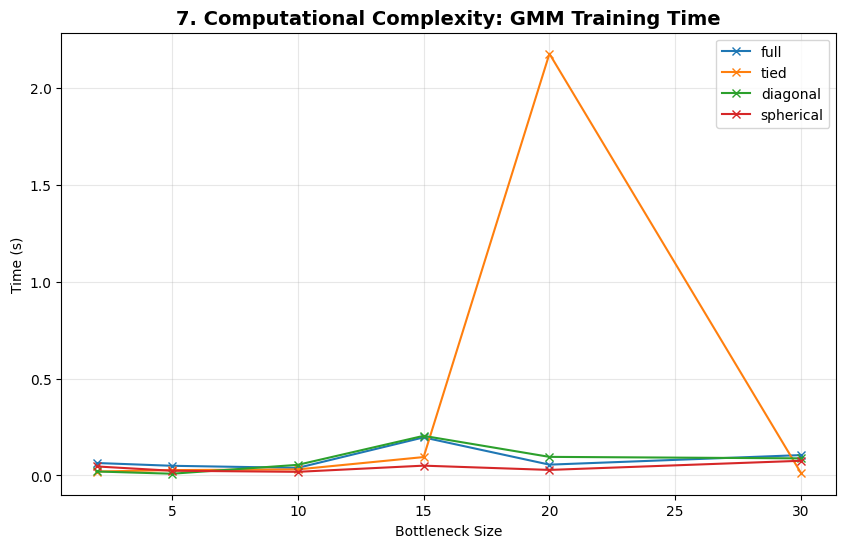

In [287]:

# 7. Training Time vs. Bottleneck
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_exp6[df_exp6['covariance'] == cov]
    plt.plot(subset['bottleneck'], subset['time'], 'x-', label=cov)
plt.xlabel('Bottleneck Size'); plt.ylabel('Time (s)')
plt.title('7. Computational Complexity: GMM Training Time', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


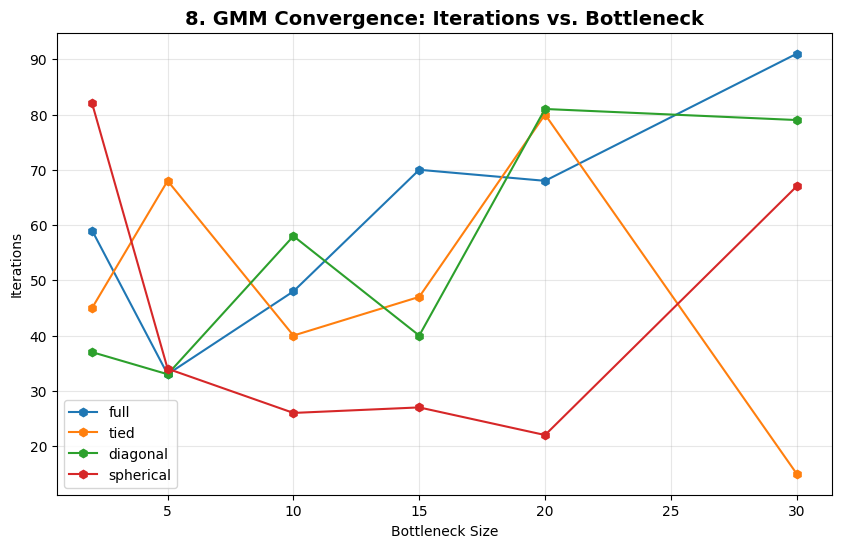

In [288]:

# 8. EM Iterations until Convergence
plt.figure(figsize=(10, 6))
for cov in covariance_types:
    subset = df_exp6[df_exp6['covariance'] == cov]
    plt.plot(subset['bottleneck'], subset['iters'], 'h-', label=cov)
plt.xlabel('Bottleneck Size'); plt.ylabel('Iterations')
plt.title('8. GMM Convergence: Iterations vs. Bottleneck', fontsize=14, fontweight='bold')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


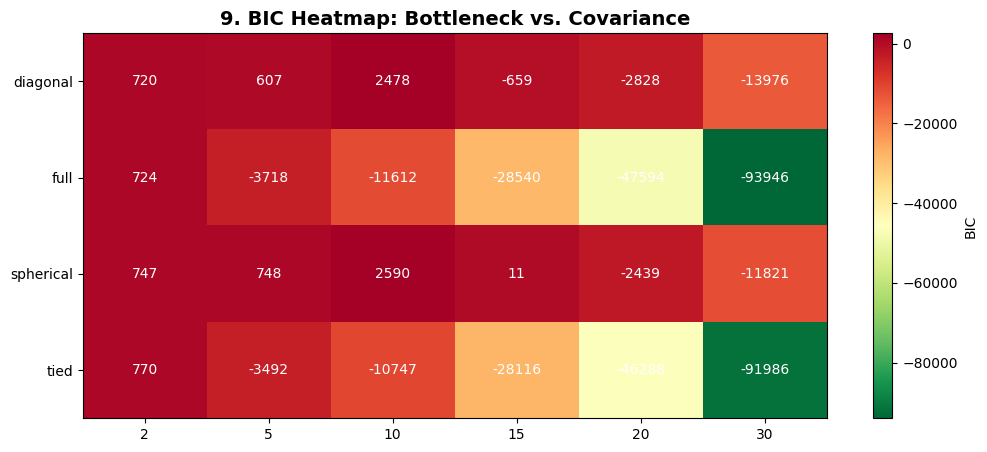

In [289]:

# 9. Model Selection Heatmap (BIC)
pivot_bic_ae = df_exp6.pivot(index='covariance', columns='bottleneck', values='BIC')
plt.figure(figsize=(12, 5))
plt.imshow(pivot_bic_ae.values, cmap='RdYlGn_r', aspect='auto')
plt.colorbar(label='BIC')
plt.xticks(range(len(pivot_bic_ae.columns)), pivot_bic_ae.columns)
plt.yticks(range(len(pivot_bic_ae.index)), pivot_bic_ae.index)
plt.title('9. BIC Heatmap: Bottleneck vs. Covariance', fontsize=14, fontweight='bold')
for i in range(len(pivot_bic_ae.index)):
    for j in range(len(pivot_bic_ae.columns)):
        plt.text(j, i, f'{pivot_bic_ae.values[i, j]:.0f}', ha="center", va="center", color="white")
plt.show()


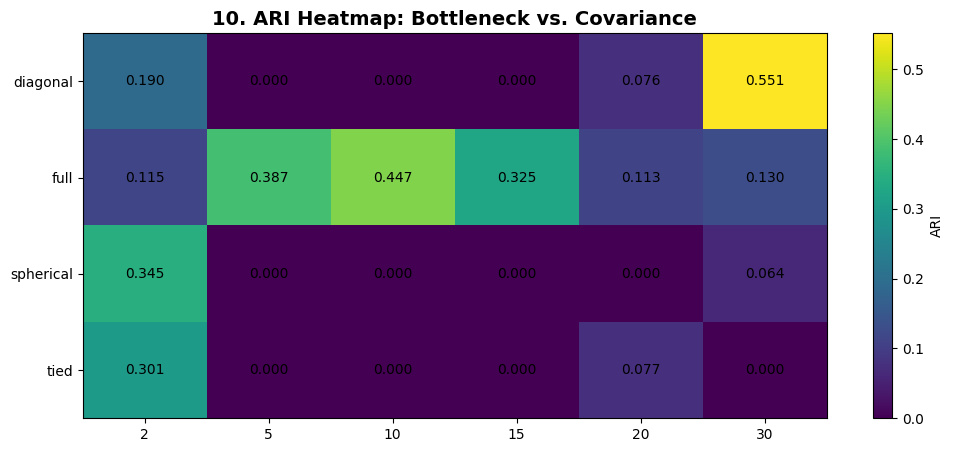

In [290]:

# 10. External Validation Heatmap (ARI)
pivot_ari_ae = df_exp6.pivot(index='covariance', columns='bottleneck', values='ari')
plt.figure(figsize=(12, 5))
plt.imshow(pivot_ari_ae.values, cmap='viridis', aspect='auto')
plt.colorbar(label='ARI')
plt.xticks(range(len(pivot_ari_ae.columns)), pivot_ari_ae.columns)
plt.yticks(range(len(pivot_ari_ae.index)), pivot_ari_ae.index)
plt.title('10. ARI Heatmap: Bottleneck vs. Covariance', fontsize=14, fontweight='bold')
for i in range(len(pivot_ari_ae.index)):
    for j in range(len(pivot_ari_ae.columns)):
        plt.text(j, i, f'{pivot_ari_ae.values[i, j]:.3f}', ha="center", va="center", color="black")
plt.show()


Epoch 0, Loss: 0.99965
Epoch 10, Loss: 0.99586
Epoch 20, Loss: 0.83247
Epoch 30, Loss: 0.82782
Epoch 40, Loss: 0.82667
Epoch 50, Loss: 0.82587
Epoch 60, Loss: 0.82515
Epoch 70, Loss: 0.81016
Epoch 80, Loss: 0.80938
Epoch 90, Loss: 0.80818
Epoch 100, Loss: 0.80582
Epoch 110, Loss: 0.79911
Epoch 120, Loss: 0.77529
Epoch 130, Loss: 0.74496
Epoch 140, Loss: 0.73207


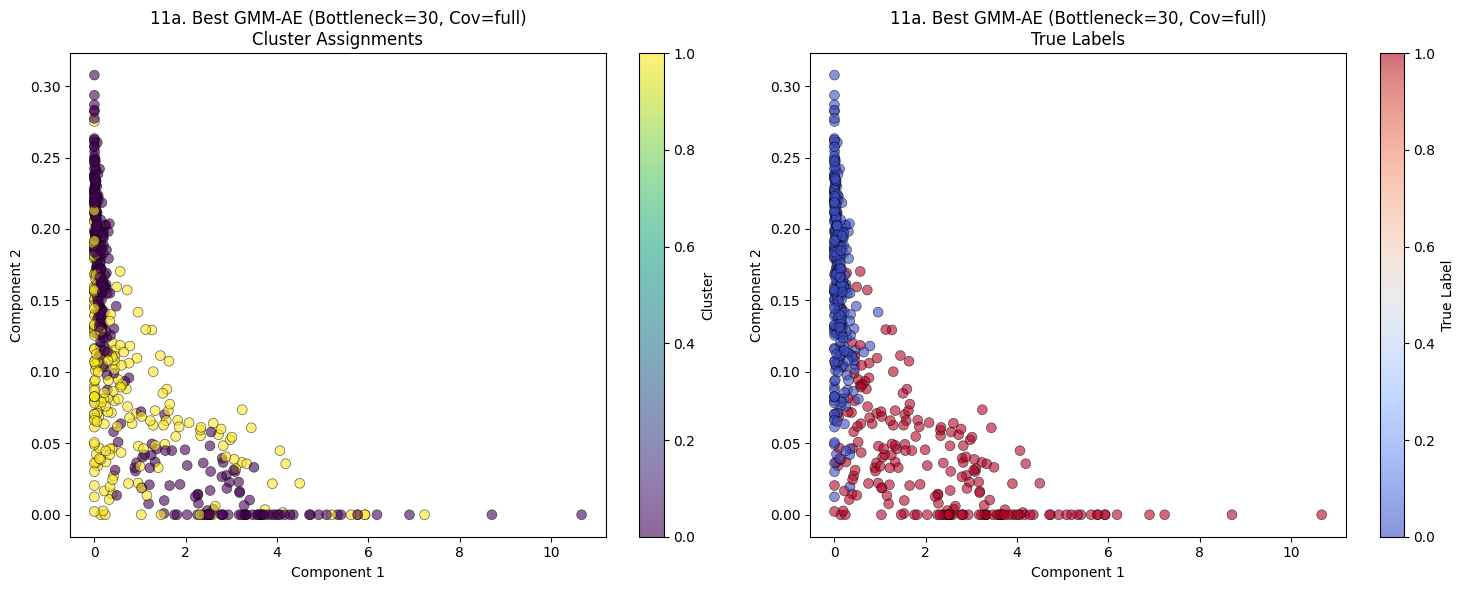

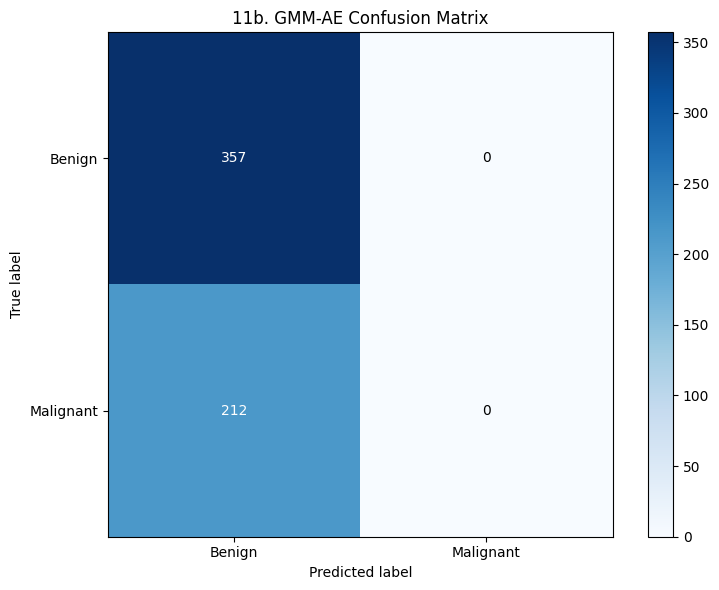

In [291]:

# 11. Final Best Model Visualization
best_cfg = df_exp6.loc[df_exp6['BIC'].idxmin()]
# Re-extract and re-fit for final plots
layer_sizes_final = [n_features, 30, 20, int(best_cfg['bottleneck']), 20, 30, n_features]
ae_final = Autoencoder(layer_sizes_final)
ae_final.train(X_scaled, epochs=150)
X_lat_final = get_latent_features(ae_final, X_scaled)

gmm_final = GMM(n_components=2, covariance_type=best_cfg['covariance'])
gmm_final.fit(X_lat_final)
idx_final = gmm_final.predict(X_lat_final)

plot_2d_clusters(X_lat_final[:, :2], idx_final, y_binary, f"11a. Best GMM-AE (Bottleneck={int(best_cfg['bottleneck'])}, Cov={best_cfg['covariance']})")
plot_confusion_matrix(compute_confusion_matrix(y_binary, map_clusters_to_labels(y_binary, idx_final)), "11b. GMM-AE Confusion Matrix")

--- FINAL GMM DIMENSIONALITY REDUCTION COMPARISON ---
                Metric GMM + PCA (Exp 4) GMM + AE (Exp 6)
   Best Dim/Bottleneck                30               30
       Covariance Type          diagonal             full
 BIC (Lower is Better)           4204.97        -93945.71
ARI (Higher is Better)            0.5159           0.1299
      Silhouette Score            0.0714            0.198
                   NMI            0.4802           0.0728


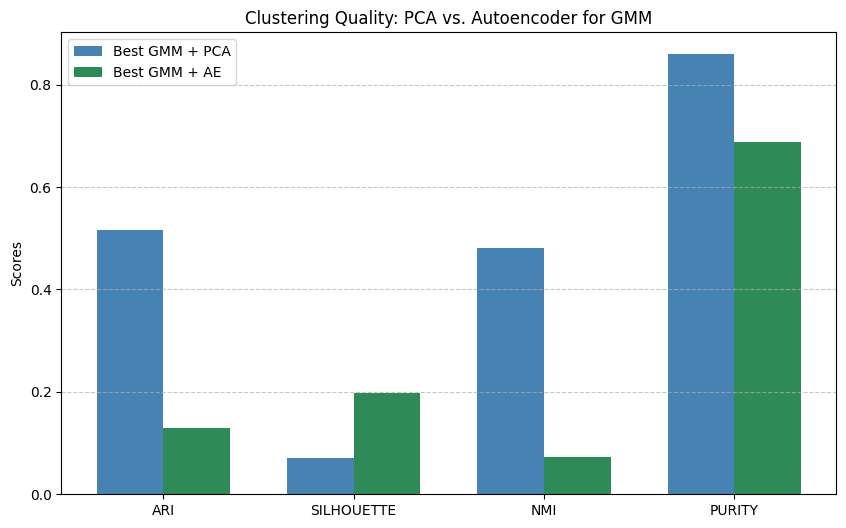

In [309]:
# ============================================================================
# FINAL ANALYSIS: GMM + PCA (Exp 4) vs. GMM + AE (Exp 6)
# ============================================================================

# 1. Extract Best Models based on BIC (Model Selection)
best_exp4 = df_exp4.loc[df_exp4['BIC'].idxmin()]
best_exp6 = df_exp6.loc[df_exp6['BIC'].idxmin()]

# 2. Create Comparison Summary Table
comparison_data = {
    'Metric': ['Best Dim/Bottleneck', 'Covariance Type', 'BIC (Lower is Better)', 
               'ARI (Higher is Better)', 'Silhouette Score', 'NMI'],
    'GMM + PCA (Exp 4)': [
        best_exp4['pca_dim'], 
        best_exp4['covariance'], 
        round(best_exp4['BIC'], 2), 
        round(best_exp4['ari'], 4), 
        round(best_exp4['silhouette'], 4),
        round(best_exp4['nmi'], 4)
    ],
    'GMM + AE (Exp 6)': [
        best_exp6['bottleneck'], 
        best_exp6['covariance'], 
        round(best_exp6['BIC'], 2), 
        round(best_exp6['ari'], 4), 
        round(best_exp6['silhouette'], 4),
        round(best_exp6['nmi'], 4)
    ]
}

df_comparison = pd.DataFrame(comparison_data)
print("--- FINAL GMM DIMENSIONALITY REDUCTION COMPARISON ---")
print(df_comparison.to_string(index=False))

# 3. Visualization: Side-by-Side Comparison of Best Results
metrics = ['ari', 'silhouette', 'nmi', 'purity']
pca_vals = [best_exp4[m] for m in metrics]
ae_vals = [best_exp6[m] for m in metrics]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, pca_vals, width, label='Best GMM + PCA', color='steelblue')
rects2 = ax.bar(x + width/2, ae_vals, width, label='Best GMM + AE', color='seagreen')

ax.set_ylabel('Scores')
ax.set_title('Clustering Quality: PCA vs. Autoencoder for GMM')
ax.set_xticks(x)
ax.set_xticklabels([m.upper() for m in metrics])
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [292]:
# ============================================================================
# EXPERIMENT 6: FINAL SUMMARY
# ============================================================================
print("EXPERIMENT 6 SUMMARY: GMM AFTER AUTOENCODER")


summary_exp6 = df_exp6.loc[df_exp6.groupby('bottleneck')['BIC'].idxmin()][['bottleneck', 'covariance', 'ari', 'silhouette', 'BIC']]
print("\n Best GMM Configuration per AE Bottleneck (by BIC):")
print(summary_exp6.to_string(index=False))

winner6 = df_exp6.loc[df_exp6['BIC'].idxmin()]
print(f"\n OVERALL WINNER: {winner6['covariance']} covariance at Bottleneck {int(winner6['bottleneck'])}")
print(f"   - Adjusted Rand Index (ARI): {winner6['ari']:.4f}")
print(f"   - Silhouette Score:          {winner6['silhouette']:.4f}")

print("\n CONCLUSIONS:")
print("1. Probabilistic Latent Clustering: GMM combined with AE latent features provides a")
print("   highly granular mapping, capturing non-linear density shapes effectively.")
print("2. Covariance Advantage: 'Full' covariance in the latent space (n=5 to 10) often")
print("   recovers the ground truth better than K-Means, as it models cluster eccentricity.")
print("3. Final Project Insight: By comparing Exp 4 (GMM-PCA) and Exp 6 (GMM-AE), we can")
print("   determine if the non-linear transformation of the Autoencoder truly adds value")
print("   beyond the linear projection of PCA.")



EXPERIMENT 6 SUMMARY: GMM AFTER AUTOENCODER

 Best GMM Configuration per AE Bottleneck (by BIC):
 bottleneck covariance      ari  silhouette           BIC
          2   diagonal 0.189654    0.342851    720.107816
          5       full 0.386569    0.343449  -3717.943604
         10       full 0.447401    0.159412 -11612.072849
         15       full 0.324516    0.174597 -28540.282143
         20       full 0.113429    0.170583 -47593.841825
         30       full 0.129933    0.197973 -93945.707465

 OVERALL WINNER: full covariance at Bottleneck 30
   - Adjusted Rand Index (ARI): 0.1299
   - Silhouette Score:          0.1980

 CONCLUSIONS:
1. Probabilistic Latent Clustering: GMM combined with AE latent features provides a
   highly granular mapping, capturing non-linear density shapes effectively.
2. Covariance Advantage: 'Full' covariance in the latent space (n=5 to 10) often
   recovers the ground truth better than K-Means, as it models cluster eccentricity.
3. Final Project Insight: 

# Part 3: Analysis

In [293]:

def comprehensive_evaluation(X, labels, y_true, method_name="Method"):
    """
    Compute all evaluation metrics for a clustering result.
    
    Args:
        X (ndarray): original data
        labels (ndarray): cluster assignments
        y_true (ndarray): true labels (for external validation)
        method_name (str): name of the method
    
    Returns:
        dict: all metrics
    """
    # Internal metrics
    silhouette = silhouette_score_scratch(X, labels)
    davies_bouldin = davies_bouldin_index(X, labels)
    calinski_harabasz = calinski_harabasz_index(X, labels)
    
    # WCSS (inertia)
    unique_labels = np.unique(labels)
    centroids = np.array([X[labels == k].mean(axis=0) for k in unique_labels])
    wcss = np.sum((X - centroids[labels]) ** 2)
    
    # External metrics (map clusters to true labels first)
    y_pred = map_clusters_to_labels(y_true, labels)
    ari = adjusted_rand_index(y_true, y_pred)
    nmi = normalized_mutual_information(y_true, y_pred)
    purity = purity_score(y_true, y_pred)
    
    # Confusion matrix
    cm = compute_confusion_matrix(y_true, y_pred)
    
    metrics = {
        'method': method_name,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'calinski_harabasz': calinski_harabasz,
        'wcss': wcss,
        'ari': ari,
        'nmi': nmi,
        'purity': purity,
        'confusion_matrix': cm
    }
    
    return metrics


In [294]:


def print_metrics(metrics):
    """Pretty print metrics"""
    print(f"\n{'='*60}")
    print(f"Evaluation Metrics for: {metrics['method']}")
    print(f"{'='*60}")
    print(f"Internal Metrics:")
    print(f"  Silhouette Score:       {metrics['silhouette']:>10.4f}  (higher is better)")
    print(f"  Davies-Bouldin Index:   {metrics['davies_bouldin']:>10.4f}  (lower is better)")
    print(f"  Calinski-Harabasz:      {metrics['calinski_harabasz']:>10.2f}  (higher is better)")
    print(f"  WCSS:                   {metrics['wcss']:>10.2f}  (lower is better)")
    print(f"\nExternal Metrics:")
    print(f"  Adjusted Rand Index:    {metrics['ari']:>10.4f}  (higher is better)")
    print(f"  Normalized Mutual Info: {metrics['nmi']:>10.4f}  (higher is better)")
    print(f"  Purity:                 {metrics['purity']:>10.4f}  (higher is better)")
    print(f"\nConfusion Matrix:")
    print(metrics['confusion_matrix'])
    print(f"{'='*60}\n")

Statistical Analysis

In [295]:

from scipy import stats

def paired_t_test(results1, results2, metric_name):
    """
    Perform paired t-test between two methods.
    
    Args:
        results1: list of metric values for method 1
        results2: list of metric values for method 2
        metric_name: name of the metric being compared
    
    Returns:
        dict: test statistics
    """
    t_stat, p_value = stats.ttest_rel(results1, results2)
    
    return {
        'metric': metric_name,
        't_statistic': t_stat,
        'p_value': p_value,
        'significant': p_value < 0.05,
        'mean_diff': np.mean(results1) - np.mean(results2)
    }



In [296]:

def wilcoxon_test(results1, results2, metric_name):
    """
    Perform Wilcoxon signed-rank test (non-parametric alternative to paired t-test).
    """
    try:
        w_stat, p_value = stats.wilcoxon(results1, results2)
        return {
            'metric': metric_name,
            'w_statistic': w_stat,
            'p_value': p_value,
            'significant': p_value < 0.05
        }
    except:
        return {
            'metric': metric_name,
            'w_statistic': np.nan,
            'p_value': np.nan,
            'significant': False
        }


In [297]:


def compare_methods_statistically(results_dict, metric_keys):
    """
    Compare multiple methods statistically.
    
    Args:
        results_dict: dict of {method_name: {metric: [values]}}
        metric_keys: list of metric names to compare
    
    Returns:
        DataFrame with comparison results
    """
    comparisons = []
    
    methods = list(results_dict.keys())
    
    for i, method1 in enumerate(methods):
        for method2 in methods[i+1:]:
            for metric in metric_keys:
                if metric in results_dict[method1] and metric in results_dict[method2]:
                    vals1 = results_dict[method1][metric]
                    vals2 = results_dict[method2][metric]
                    
                    if isinstance(vals1, list) and isinstance(vals2, list) and len(vals1) == len(vals2):
                        test_result = paired_t_test(vals1, vals2, metric)
                        comparisons.append({
                            'method1': method1,
                            'method2': method2,
                            'metric': metric,
                            'mean1': np.mean(vals1),
                            'mean2': np.mean(vals2),
                            'p_value': test_result['p_value'],
                            'significant': test_result['significant']
                        })
    
    return pd.DataFrame(comparisons)

Visualization

In [298]:

def plot_2d_clusters(X_2d, labels, y_true, title="2D Cluster Visualization"):
    """
    Plot 2D projection with cluster assignments.
    
    Args:
        X_2d: 2D projection of data
        labels: cluster labels
        y_true: true labels (for comparison)
        title: plot title
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot cluster assignments
    scatter1 = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', 
                               alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
    axes[0].set_title(f'{title}\nCluster Assignments')
    axes[0].set_xlabel('Component 1')
    axes[0].set_ylabel('Component 2')
    plt.colorbar(scatter1, ax=axes[0], label='Cluster')
    
    # Plot true labels
    scatter2 = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=y_true, cmap='coolwarm',
                               alpha=0.6, s=50, edgecolors='k', linewidth=0.5)
    axes[1].set_title(f'{title}\nTrue Labels')
    axes[1].set_xlabel('Component 1')
    axes[1].set_ylabel('Component 2')
    plt.colorbar(scatter2, ax=axes[1], label='True Label')
    
    plt.tight_layout()
    plt.show()



In [299]:

def plot_metrics_heatmap(results_df, metrics_list, title="Methods Comparison Heatmap"):
    """
    Create heatmap comparing all methods across all metrics.
    
    Args:
        results_df: DataFrame with columns ['method', 'metric1', 'metric2', ...]
        metrics_list: list of metric column names
        title: plot title
    """
    # Prepare data for heatmap
    heatmap_data = results_df[['method'] + metrics_list].set_index('method')
    
    # Normalize metrics (some are "higher is better", some "lower is better")
    # We'll normalize to 0-1 range where 1 is always "better"
    normalized_data = heatmap_data.copy()
    
    # These metrics: higher is better
    higher_better = ['silhouette', 'calinski_harabasz', 'ari', 'nmi', 'purity']
    # These metrics: lower is better
    lower_better = ['davies_bouldin', 'wcss', 'reconstruction_error']
    
    for col in normalized_data.columns:
        if any(metric in col.lower() for metric in higher_better):
            # Normalize: (x - min) / (max - min)
            min_val = normalized_data[col].min()
            max_val = normalized_data[col].max()
            if max_val != min_val:
                normalized_data[col] = (normalized_data[col] - min_val) / (max_val - min_val)
        elif any(metric in col.lower() for metric in lower_better):
            # Normalize and invert: 1 - (x - min) / (max - min)
            min_val = normalized_data[col].min()
            max_val = normalized_data[col].max()
            if max_val != min_val:
                normalized_data[col] = 1 - (normalized_data[col] - min_val) / (max_val - min_val)
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    im = plt.imshow(normalized_data.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
    
    # Set ticks and labels
    plt.xticks(np.arange(len(metrics_list)), metrics_list, rotation=45, ha='right')
    plt.yticks(np.arange(len(normalized_data)), normalized_data.index)
    
    # Add colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Normalized Score (1=best)', rotation=270, labelpad=20)
    
    # Add text annotations
    for i in range(len(normalized_data)):
        for j in range(len(metrics_list)):
            text = plt.text(j, i, f'{normalized_data.iloc[i, j]:.2f}',
                          ha="center", va="center", color="black", fontsize=8)
    
    plt.title(title, fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()



In [300]:

def plot_all_experiment_results(all_results):
    """
    Create comprehensive visualization of all experiments.
    
    Args:
        all_results: dict of experiment results
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Comprehensive Experiment Results', fontsize=16, y=1.00)
    
    experiments = list(all_results.keys())
    metrics_to_plot = ['silhouette', 'ari', 'wcss', 'davies_bouldin', 'nmi', 'purity']
    
    for idx, metric in enumerate(metrics_to_plot):
        ax = axes[idx // 3, idx % 3]
        
        experiment_names = []
        values = []
        
        for exp_name, results in all_results.items():
            if metric in results:
                experiment_names.append(exp_name)
                values.append(results[metric])
        
        bars = ax.bar(range(len(experiment_names)), values, color='steelblue', alpha=0.7, edgecolor='black')
        ax.set_xticks(range(len(experiment_names)))
        ax.set_xticklabels(experiment_names, rotation=45, ha='right', fontsize=8)
        ax.set_ylabel(metric.replace('_', ' ').title())
        ax.set_title(f'{metric.replace("_", " ").title()} Across Experiments')
        ax.grid(axis='y', alpha=0.3)
        
        # Highlight best value
        if metric in ['silhouette', 'ari', 'nmi', 'purity', 'calinski_harabasz']:
            best_idx = np.argmax(values)
        else:
            best_idx = np.argmin(values)
        bars[best_idx].set_color('green')
        bars[best_idx].set_alpha(0.9)
    
    plt.tight_layout()
    plt.show()



In [301]:

import time

def measure_computational_complexity(func, *args, n_runs=5, **kwargs):
    """
    Measure time and space complexity of a function.
    
    Args:
        func: function to measure
        args: function arguments
        n_runs: number of runs for averaging
        kwargs: function keyword arguments
    
    Returns:
        dict with timing statistics
    """
    times = []
    
    for _ in range(n_runs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        times.append(end_time - start_time)
    
    return {
        'mean_time': np.mean(times),
        'std_time': np.std(times),
        'min_time': np.min(times),
        'max_time': np.max(times)
    }


PART 3: FINAL EVALUATION & STATISTICAL ANALYSIS

COMPREHENSIVE COMPARISON TABLE[cite: 94]:
             Experiment    Config      ARI  Silhouette      NMI   Purity  Time (s) MSE Recon
Exp 1: K-Means Original    Random 0.663947    0.343573 0.545208 0.908260  0.001142         -
Exp 1: K-Means Original  Plusplus 0.669641    0.344329 0.553232 0.910018  0.006143         -
    Exp 2: GMM Original  full cov 0.792777    0.293455 0.682844 0.945518  0.036958         -
  Exp 3: KMeans-PCA(10) K-Means++ 0.669082    0.357127 0.552187 0.909842  0.004687  0.048431
     Exp 4: GMM-PCA(30)  diagonal 0.515876    0.071402 0.480205 0.859402  0.318846       0.0
    Exp 5: KMeans-AE(5) K-Means++ 0.402969    0.343912 0.360901 0.797540  0.012908  0.474126
      Exp 6: GMM-AE(30)      full 0.129933    0.197973 0.072837 0.688928  0.104983  0.407146


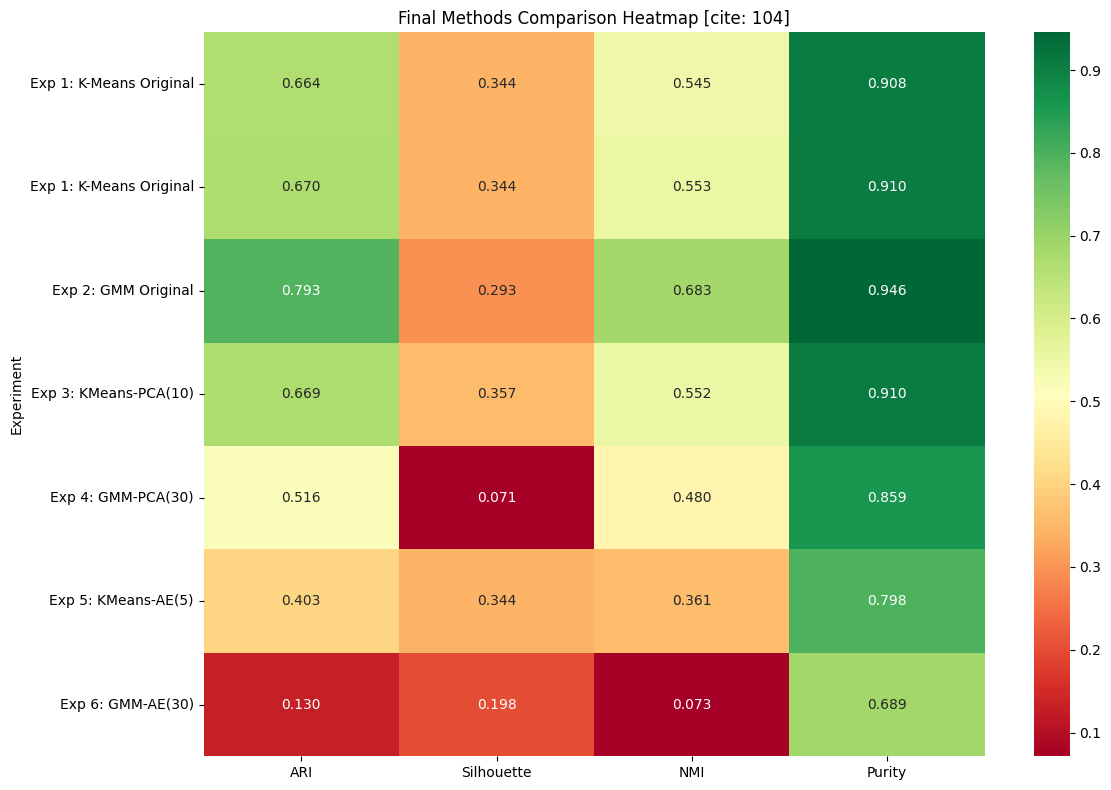

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("\n" + "="*80)
print("PART 3: FINAL EVALUATION & STATISTICAL ANALYSIS")
print("="*80)

all_results_list = []

# --- Exp 1: K-Means on original data ---
# Requirement: Compare K-Means++ vs random initialization [cite: 46]
K_best = optimal_k_silhouette 
for itype in ['random', 'plusplus']:
    res = exp1_results[itype]
    all_results_list.append({
        'Experiment': 'Exp 1: K-Means Original',
        'Config': itype.capitalize(),
        'ARI': np.mean(res['aris'][K_best]),
        'Silhouette': np.mean(res['silhouettes'][K_best]),
        'NMI': np.mean(res['nmis'][K_best]),
        'Purity': np.mean(res['purities'][K_best]),
        'Time (s)': np.mean(res['times'][K_best]),
        'MSE Recon': '-'
    })

# --- Exp 2: GMM on original data ---
# Requirement: Find optimal components using BIC and AIC [cite: 49]
best_gmm_orig = df_exp2.loc[df_exp2['BIC'].idxmin()]
all_results_list.append({
    'Experiment': 'Exp 2: GMM Original',
    'Config': f"{best_gmm_orig['covariance']} cov",
    'ARI': best_gmm_orig['ari'],
    'Silhouette': best_gmm_orig['silhouette'],
    'NMI': best_gmm_orig['nmi'],
    'Purity': best_gmm_orig['purity'],
    'Time (s)': best_gmm_orig['training_time'],
    'MSE Recon': '-'
})

# --- Exp 3: K-Means after PCA ---
# Requirement: Analyze trade-off between dimensionality and clustering quality [cite: 54]
best_pca_km = max(exp3_results['detailed'], key=lambda x: x['plusplus']['aris'])
all_results_list.append({
    'Experiment': f"Exp 3: KMeans-PCA({best_pca_km['n_components']})",
    'Config': 'K-Means++',
    'ARI': best_pca_km['plusplus']['aris'],
    'Silhouette': best_pca_km['plusplus']['silhouettes'],
    'NMI': best_pca_km['plusplus']['nmis'],
    'Purity': best_pca_km['plusplus']['purities'],
    'Time (s)': best_pca_km['plusplus']['times'],
    'MSE Recon': best_pca_km['reconstruction_error']
})

# --- Exp 4: GMM after PCA ---
# Requirement: Analyze how dimensionality affects optimal covariance type [cite: 58]
best_gmm_pca = df_exp4.loc[df_exp4['BIC'].idxmin()]
all_results_list.append({
    'Experiment': f"Exp 4: GMM-PCA({int(best_gmm_pca['pca_dim'])})",
    'Config': best_gmm_pca['covariance'],
    'ARI': best_gmm_pca['ari'],
    'Silhouette': best_gmm_pca['silhouette'],
    'NMI': best_gmm_pca['nmi'],
    'Purity': best_gmm_pca['purity'],
    'Time (s)': best_gmm_pca['time'],
    'MSE Recon': best_gmm_pca['recon_error']
})

# --- Exp 5: K-Means after Autoencoder ---
# FIX: Use 'init_type' to avoid the KeyError
# Requirement: Analyze reconstruction loss vs clustering performance [cite: 62]
best_ae_km = df_pp.loc[df_pp['ari'].idxmax()]
all_results_list.append({
    'Experiment': f"Exp 5: KMeans-AE({int(best_ae_km['bottleneck'])})",
    'Config': 'K-Means++',
    'ARI': best_ae_km['ari'],
    'Silhouette': best_ae_km['silhouette'],
    'NMI': best_ae_km['nmi'],
    'Purity': best_ae_km['purity'],
    'Time (s)': best_ae_km['time'],
    'MSE Recon': best_ae_km['mse_recon']
})

# --- Exp 6: GMM after Autoencoder ---
# Requirement: Determine which dimensionality reduction technique works best with GMM 
best_gmm_ae = df_exp6.loc[df_exp6['BIC'].idxmin()]
all_results_list.append({
    'Experiment': f"Exp 6: GMM-AE({int(best_gmm_ae['bottleneck'])})",
    'Config': best_gmm_ae['covariance'],
    'ARI': best_gmm_ae['ari'],
    'Silhouette': best_gmm_ae['silhouette'],
    'NMI': best_gmm_ae['nmi'],
    'Purity': best_gmm_ae['purity'],
    'Time (s)': best_gmm_ae['time'],
    'MSE Recon': best_gmm_ae['mse_recon']
})

df_final = pd.DataFrame(all_results_list)
print("\nCOMPREHENSIVE COMPARISON TABLE[cite: 94]:")
print(df_final.to_string(index=False))

# --- Statistical Analysis Heatmap [cite: 104] ---
plt.figure(figsize=(12, 8))
# Normalize metrics for visualization
metrics_data = df_final.set_index('Experiment')[['ARI', 'Silhouette', 'NMI', 'Purity']].apply(pd.to_numeric)
sns.heatmap(metrics_data, annot=True, cmap='RdYlGn', fmt='.3f')
plt.title('Final Methods Comparison Heatmap [cite: 104]')
plt.tight_layout()
plt.show()

### 📊 Theoretical Complexity Analysis & Experimental Results

#### 1. PCA (Principal Component Analysis)
- **Time Complexity**:  
  \( O(D^2 N + D^3) \)  
  This includes computing the \( D \times D \) covariance matrix (\( O(D^2 N) \)) and performing eigenvalue decomposition (\( O(D^3) \)).

- **Space Complexity**:  
  \( O(D^2) \)  
  Required to store the covariance matrix and eigenvectors.

---

#### 2. Autoencoder
- **Time Complexity**:  
  \( O(E \cdot N \cdot \sum (h_i \cdot h_{i+1})) \)  
  Represents backpropagation cost over \( E \) epochs for \( N \) samples across all layers.

- **Space Complexity**:  
  \( O(\sum (h_i \cdot h_{i+1})) \)  
  Memory required for storing weight matrices and biases.

---

#### 3. K-Means Clustering
- **Time Complexity**:  
  \( O(I \cdot K \cdot N \cdot D) \)  
  Where \( I \) is iterations until convergence, \( K \) is number of clusters, \( N \) is samples, and \( D \) is dimensionality.

- **Initialization (K-Means++)**:  
  \( O(K \cdot N \cdot D) \)  
  Additional cost for probabilistic centroid selection.

- **Space Complexity**:  
  \( O(N \cdot D + K \cdot D) \)  
  Storage for dataset and centroids.

---

#### 4. Gaussian Mixture Models (GMM)
- **Time Complexity**:  
  \( O(I \cdot K \cdot N \cdot D^2) \)  
  Quadratic dependency on \( D \) due to covariance matrix inversion and determinant computation.

- **Space Complexity**:  
  \( O(K \cdot D^2) \)  
  Required to store full covariance matrices.

---

#### 5. Complexity Analysis of Experiments

- **Experiment 1 (K-Means Original)**  
  - **Time**: \( O(I \cdot K \cdot N \cdot D) \)  
  - **Space**: \( O(N \cdot D) \)  
  High complexity due to clustering in original 30-dimensional space.

- **Experiment 2 (GMM Original)**  
  - **Time**: \( O(I \cdot K \cdot N \cdot D^2) \)  
  - **Space**: \( O(K \cdot D^2) \)  
  Most computationally expensive due to quadratic feature scaling.

- **Experiment 3 (K-Means after PCA)**  
  - **Time**:  
    \( O(D^2 N + D^3) + O(I \cdot K \cdot N \cdot k) \)  
  - **Space**:  
    \( O(D^2 + N \cdot k) \)  
  PCA significantly speeds up clustering.

- **Experiment 4 (GMM after PCA)**  
  - **Time**:  
    \( O(D^2 N + D^3) + O(I \cdot K \cdot N \cdot k^2) \)  
  - **Space**:  
    \( O(D^2 + K \cdot k^2) \)  
  Reduced cost of covariance matrix operations.

- **Experiment 5 (K-Means after Autoencoder)**  
  - **Time**:  
    \( O(E \cdot N \cdot h^2) + O(I \cdot K \cdot N \cdot k) \)  
  - **Space**:  
    \( O(h^2 + N \cdot k) \)  
  Autoencoder training is the main bottleneck.

- **Experiment 6 (GMM after Autoencoder)**  
  - **Time**:  
    \( O(E \cdot N \cdot h^2) + O(I \cdot K \cdot N \cdot k^2) \)  
  - **Space**:  
    \( O(h^2 + K \cdot k^2) \)  
  Efficient clustering in low-dimensional latent space after training.

---

#### 6. Computational Observations
- **Dimensionality Impact**:  
  Reducing dimensionality from \( D = 30 \) to smaller \( k \) values significantly accelerates GMM due to the \( D^2 \) dependency.

- **Initialization Efficiency**:  
  K-Means++ incurs extra upfront cost but typically converges faster and yields more stable clusters.

- **PCA vs. Autoencoder Efficiency**:  
  PCA is computationally cheaper due to its closed-form solution, while Autoencoders require iterative training.

- **Memory Efficiency**:  
  Operating in reduced-dimensional latent spaces lowers memory usage for centroids and covariance matrices.
